## **Data Analysis**

**Input for our analysis:**
- **Angel - Startup relations**
- **Startup list** including Name, #of angel investors, industry, region
- **Angel list** including #of investments, name, region, average shares, number of investments per industry

**Steps of our analysis:**

1. **Creating a network graph**

2. **Descriptive Statistics** on:
   - _Angels_
   - _Startups_
   - _Network_

3. **Simulating a network graph with Null distribution**

4. **Community detection** in actual and simulated communities

5. **Analysis of similarity of communities** in terms of:
   - _Reach and Power_
   - _Investment Style_
   - _Personal Characteristics_

## Importing libraries and data - 0

In [3733]:
#all libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime


In [3734]:
#all data sets
#open from csv the shareholder list as a dataframe

df_investment_rel_angel_startup = pd.read_csv("dataframes/shareholder_relations_2021_rows_updated.csv")
    #open from csv the shareholders as a dataframe
df_angels = pd.read_csv("dataframes/angels.csv")
    #open from csv the startups as a dataframe
df_startups = pd.read_csv("dataframes/startups_rows_updated.csv")


In [3735]:
# Check if 'shareholder_name' is unique in df_angels
if df_angels['shareholder_name'].is_unique:
    # If it is unique, you can set it as index and perform the map operation
    df_investment_rel_angel_startup['shareholder_type'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_angels.set_index('shareholder_name')['shareholder_type'])
else:
    # If it is not unique, you need to handle the duplicates first
    # This is an example where we drop duplicates, keeping the first occurrence
    df_angels_unique = df_angels.drop_duplicates(subset=['shareholder_name'], keep='first')
    df_investment_rel_angel_startup['shareholder_type'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_angels_unique.set_index('shareholder_name')['shareholder_type'])

In [3736]:
#return df startups with number_shareholders > 2
def filter_startups(df_startups):
    df_startups = df_startups[df_startups['number_shareholders'] >2]
    return df_startups
df_startups=filter_startups(df_startups)

In [3737]:
#filter df_investment_rel_angel_startup for startups with number_shareholders > 2
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]
df_investment_rel_angel_startup

relation_id                     created_at  \
0           29966  2024-03-08 08:40:55.082811+00   
1           29967  2024-03-08 08:40:55.135192+00   
4           29984  2024-03-08 08:40:56.103733+00   
10          25922  2024-03-01 09:25:36.431681+00   
11          25925  2024-03-01 09:25:36.516158+00   
...           ...                            ...   
27775       25171   2024-03-01 09:18:28.35779+00   
27776       25173  2024-03-01 09:18:28.442797+00   
27777       25172  2024-03-01 09:18:28.402269+00   
27778       25174   2024-03-01 09:18:28.49628+00   
27781       27564  2024-03-01 09:43:33.786003+00   

                              shareholder_name shareholder_location birthdate  \
0                  Pascal Pierre Zambou Zoleko                Fürth       NaN   
1                                  Sarsar Deli              Toronto       NaN   
4                                  Thomas Post            Lichtenau       NaN   
10     EnLight Visuals UG (haftungsbeschränkt)               Alfter       NaN   
11                     SIMBA-DICKIE-GROUP GmbH                Fürth       NaN   
...                                        ...                  ...       ...   
27775                        Philip Kalaydjiev              Leipzig       NaN   
27776                              Eric Böhner              Leipzig       NaN   
27777                 Fabian Haeckermann Godoy               Berlin       NaN   
27778                             Paul Ortlepp              Leipzig       NaN   
27781                 Heinrich Keiho Menk-haus               Berlin       NaN   

      register_id register_court percentage_of_total_shares shareholder_type  \
0             NaN            NaN                       26.0            angel   
1             NaN            NaN                       26.0            angel   
4             NaN            NaN                       25.0            angel   
10      HRB 17384           Bonn                      40.44            angel   
11      HRB 11688          Fürth                      11.52              NaN   
...           ...            ...                        ...              ...   
27775         NaN            NaN                       34.0            angel   
27776         NaN            NaN                       29.0            angel   
27777         NaN            NaN                       34.0            angel   
27778         NaN            NaN                        3.0            angel   
27781         NaN            NaN                      26.92            angel   

                                    startup_name  ... founding_date  \
0      Flexudy Education UG (haftungsbeschränkt)  ...           NaN   
1      Flexudy Education UG (haftungsbeschränkt)  ...           NaN   
4            Clevercreek UG (haftungsbeschränkt)  ...           NaN   
10                                    Spyra GmbH  ...           NaN   
11                                    Spyra GmbH  ...           NaN   
...                                          ...  ...           ...   
27775                  3D Digital Warehouse GmbH  ...           NaN   
27776                  3D Digital Warehouse GmbH  ...           NaN   
27777                  3D Digital Warehouse GmbH  ...           NaN   
27778                  3D Digital Warehouse GmbH  ...           NaN   
27781                             SUSUMU AI GmbH  ...           NaN   

                                                list_mds firstname  \
0      {"name":{"0":14192,"1":14192},"total_mds":{"0"...    pascal   
1      {"name":{"0":14192,"1":14192},"total_mds":{"0"...    sarsar   
4      {"name":{"0":14151},"total_mds":{"0":1},"gegen...    thomas   
10     {"name":{"0":11030},"total_mds":{"0":1},"gegen...       NaN   
11     {"name":{"0":11030},"total_mds":{"0":1},"gegen...       NaN   
...                                                  ...       ...   
27775  {"name":{"0":4762},"total_mds":{"0":1},"gegens...    philip   
27776  {"name":{"0":4762},"total_m

In [3738]:
#drop duplicates in df_angels
print(len(df_angels))
df_angels = df_angels.drop_duplicates(subset = "shareholder_name", keep = "first") 
print(len(df_angels))

19889
19888


In [3739]:
#return all rows in df_angels where firstname and lastname are duplicates
df_angels_duplicates = df_angels[df_angels.duplicated(subset=['firstname', 'lastname'])]
#give me only the first and last name of the duplicates as well as shareholder_name
df_angels_duplicates = df_angels_duplicates[['firstname', 'lastname', 'shareholder_name']]
#ignore all where firstname and lastname are NaN
df_angels_duplicates = df_angels_duplicates.dropna(subset=['firstname', 'lastname'])
#sort by first name
df_angels_duplicates = df_angels_duplicates.sort_values(by=['firstname'])

df_angels_duplicates


Empty DataFrame
Columns: [firstname, lastname, shareholder_name]
Index: []

In [3740]:
#get all from df angel where firstname is Wolgang and lastname is Rams
temp =df_angels[df_angels['firstname'] == 'Andreas'][df_angels['lastname'] == 'Koch']
#only giveme the first and last name and shareholder_name and birthdate
temp['shareholder_name']
df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'] == 'Andreas Koch']

relation_id                     created_at         shareholder_name  \
15815       17913  2024-02-29 21:03:00.752933+00             Andreas Koch   
19085        8910  2024-02-29 19:10:44.339912+00  Koch, Prof. Dr. Andreas   

        shareholder_location birthdate register_id register_court  \
15815  Vogtsburg/Oberrotweil       NaN         NaN            NaN   
19085          64807 Dieburg       NaN         NaN            NaN   

      percentage_of_total_shares shareholder_type              startup_name  \
15815                        1.5            angel           Compositas GmbH   
19085                        2.0            angel  Xelera Technologies GmbH   

       ... founding_date                                           list_mds  \
15815  ...           NaN  {"name":{"0":11384},"total_mds":{"0":1},"gegen...   
19085  ...           NaN  {"name":{"0":10827},"total_mds":{"0":1},"gegen...   

      firstname  lastname      startup_industry_mapped  startup_industry  \
15815   andreas      koch  technology_digital_services            gaming   
19085       NaN       NaN  technology_digital_services          software   

             startup_region count region_mapping    year  
15815  freiburg im breisgau   1.0          other  2018.0  
19085             darmstadt   1.0      frankfurt  2018.0  

[2 rows x 25 columns]

In [3741]:
# #read in shareholders csv
# df_shareholders = pd.read_csv("dataframes/shareholders.csv", sep=";")
# df_shareholders

# # #count how often each sh occurs in the df_investment_rel_angel_startup and add to column number_of_investments
# df_investment_rel_angel_startup['number_of_investments'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_investment_rel_angel_startup['shareholder_name'].value_counts())
# #get subset of df_investment_rel_angel_startup with only the shareholders that are also in df_shareholders
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_shareholders['shareholder_name'])]
# df_investment_rel_angel_startup
# # # #get ssubset where the number of investments is greater than 1
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['number_of_investments'] > 1]
# df_investment_rel_angel_startup


In [3742]:
#clean df_investment_rel_angel_startup
#drop rows where shareholder_type is 'md'
print(f"before dropping mds:{len(df_investment_rel_angel_startup)}")
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] != 'md']
print(f"after dropping mds:{len(df_investment_rel_angel_startup)}")

before dropping mds:20435
after dropping mds:20435


In [3743]:
#add column to df_startups called number_all_angels
df_startups['number_all_angels'] = 0
# calculate number of all angels for every startup based on occurences in df_investment_rel_angel_startup
for index, row in df_startups.iterrows():
    startup = row['startup_name']
    number_all_angels = df_investment_rel_angel_startup[(df_investment_rel_angel_startup['startup_name'] == startup)&(df_investment_rel_angel_startup['shareholder_type'] == 'angel')]['shareholder_name_mapped'].nunique()
    df_startups.at[index, 'number_all_angels'] = number_all_angels

#if df_startups number_shareholders > number all_angels then add institutional_investor to column funding_round_type
df_startups['funding_round_type'] = 'angel'
df_startups.loc[df_startups['number_shareholders'] > df_startups['number_all_angels'], 'funding_round_type'] = 'institutional_investor'  

In [3744]:
df_startups

#map funding round type into df_investment_rel_angel_startup
df_investment_rel_angel_startup['funding_round_type'] = ""
df_investment_rel_angel_startup['funding_round_type'] = df_investment_rel_angel_startup['startup_name'].map(df_startups.set_index('startup_name')['funding_round_type'])



In [3745]:
#clean df_investment_rel_angel_startup
#drop rows where shareholder_type is 'md'
print(f"before dropping mds:{len(df_investment_rel_angel_startup)}")
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] != 'institution']
print(f"after dropping mds:{len(df_investment_rel_angel_startup)}")

before dropping mds:20435
after dropping mds:20435


In [3746]:
#calculate the number of shareholders per startup, add it as column number_shareholders
#for each startupId count how often they occur in df_investment_rel_angel_startup and add it into column number_shareholders
df_investment_rel_angel_startup['number_shareholders'] = df_investment_rel_angel_startup['startup_id'].map(df_investment_rel_angel_startup['startup_id'].value_counts())
df_investment_rel_angel_startup

#map changed_shareholder_structure into df_investment_rel_angel_startup
df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['startup_id'].map(df_startups.set_index('startup_id')['changed_shareholder_structure'])  
#map funding_round_type into df_investment_rel_angel_startup
df_investment_rel_angel_startup['funding_round_type'] = df_investment_rel_angel_startup['startup_id'].map(df_startups.set_index('startup_id')['funding_round_type'])

# #drop all rows where number_shareholders is 1
# print(f"before dropping single shareholders:{len(df_investment_rel_angel_startup)}")
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['number_shareholders'] != 1]
# print(f"after dropping single shareholders:{len(df_investment_rel_angel_startup)}")

#return df_invetment_rel_angel_startup with number_shareholders =1



In [3747]:
print(f"before dropping duplicates:{len(df_investment_rel_angel_startup)}")

df_investment_rel_angel_startup = df_investment_rel_angel_startup.drop_duplicates(subset=['shareholder_name_mapped','startup_id'])
print(f"after dropping duplicates:{len(df_investment_rel_angel_startup)}")

before dropping duplicates:20435
after dropping duplicates:20247


In [3748]:
#get subset of df startups that is actually in the df_investment_rel_angel_startup
print(f"before dropping startups not in investment relations:{len(df_startups)}")
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
print(f"after dropping startups not in investment relations:{len(df_startups)}")


before dropping startups not in investment relations:3854
after dropping startups not in investment relations:3854


In [3749]:
#get subset of shareholders that are actually in the df_investment_rel_angel_startup
print(f"before dropping shareholders not in investment relations:{len(df_angels)}")
df_angels = df_angels[df_angels['shareholder_name'].isin(df_investment_rel_angel_startup['shareholder_name_mapped'])]
print(f"after dropping shareholders not in investment relations:{len(df_angels)}")

before dropping shareholders not in investment relations:19888
after dropping shareholders not in investment relations:14452


In [3750]:
#calculate the number of investments per angel, add it as column number_of_investments
#for each shareholder_name_mapped count how often they occur in df_investment_rel_angel_startup and add it into column number_of_investments
df_angels['number_of_investments'] = df_angels['shareholder_name'].map(df_investment_rel_angel_startup['shareholder_name_mapped'].value_counts())
#cast column number of investments to integer
df_angels['number_of_investments'] = pd.to_numeric(df_angels['number_of_investments'], errors='coerce').fillna(1).astype(int)
#assign angels the active status if the hace more than 1 investments
df_angels['status'] = df_angels['number_of_investments'].apply(lambda x: 'active' if x > 1 else 'inactive')
df_angels


#drop column unnamed from df_angels
df_angels = df_angels.drop(columns=['Unnamed: 0'])
df_angels

#get subset of active angels
df_angels_active = df_angels[df_angels['status'] == 'active']
df_angels_active
#drop duplicates in shareholder_name from df_angels_active
df_angels_active = df_angels_active.drop_duplicates(subset=['shareholder_name'])
df_angels_active




shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19805                                 ALLUTI GmbH         9421.0   
19816                                   Beam GmbH         3104.0   
19839                          MM Investment GmbH         6459.0   
19842  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19867                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19805  2024-03-10 17:37:24.528696+00                      2            angel   
19816  2024-03-10 17:37:21.332579+00                      4            angel   
19839  2024-03-10 17:37:22.963246+00                      2            angel   
19842  2024-03-10 17:37:25.834675+00                      2            angel   
19867  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B             9.035000   
51       HRB 157901                     B Berlin             1.520000   
70              NaN                          NaN            21.375000   
88        HRB 17860                      Krefeld            33.333300   
90      FN 411158 w          Firmenbuch von Wien             0.486050   
...             ...                          ...                  ...   
19805        210537                 M\u00fcnchen             2.636859   
19816  HRB 194610 B               Charlottenburg            19.595800   
19839    HRB 216984               Charlottenburg            30.000000   
19842  HRB 151510 B               Charlottenburg             1.226000   
19867   HRB 181720B               Charlottenburg             8.727200   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19805             136.0  {"shareholder_purpose": "Verwaltung eigenen Ve...   
19816             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19839             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19842             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19867             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... other international mannheim birthdate 2017 2018 2019 2020 2021  \
23     ...   0.0           0.0      0.0       NaN  0.0  2.0  0.0  0.0  0.0   
51     ...   0.0           0.0      0.0       NaN  0.0  0.0  1.0  1.0  0.0   
70     ...   1.0           0.0      0.0       NaN  0.0  0.0  1.0  0.0  1.0   
88     ...   0.0           0.0      0.0       NaN  1.0  0.0  0.0  0.0  1.0   
90     ...   0.0           0.0      0.0       N

In [3751]:
#get unique startup_ids
unique_startup_ids = df_investment_rel_angel_startup['startup_id'].unique()
len(unique_startup_ids)

3854

## Creating a Network Graph of all Angels - 1

In [3752]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels['shareholder_name'])]
#only angels where status is active



# # Create a new DataFrame where each row represents a co-investment
# co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# # Filter out rows where the investor is the same in both columns
# co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # # Create a table with the number of co-investments for each pair of investors
# co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

# #replace all spaces with _ in shareholder_name_mapped_x
# co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
# co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

# #co_investment_counts.to_csv('co_investment_counts.csv', index=False)

# #sort by number of co-investments
# co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
# co_investment_counts

In [3753]:
# # Create a graph from the co_investment_counts DataFrame
# #get subset where co-investments >1
# # co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
# G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# # Draw the graph
# pos = nx.spring_layout(G)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap
# #nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
# #save plot as png
# plt.savefig('output/graphs/co_investments_all_angels.png')
# plt.show()


In [3754]:
# # get largest connected component
# largest_cc = max(nx.connected_components(G), key=len)
# subgraph = G.subgraph(largest_cc)
# # Draw the graph
# pos = nx.spring_layout(subgraph)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap

# #save plot as png
# plt.savefig('output/graphs/co_investments_largest_connected_component.png')

In [3755]:
# #get number of nodes of G
# len(subgraph.nodes)

In [3756]:
# import pandas as pd
# from d3graph import d3graph, vec2adjmat
# source = co_investment_counts['shareholder_name_mapped_x']
# target = co_investment_counts['shareholder_name_mapped_y']
# weight = co_investment_counts['CoInvestments']


# adjmat = vec2adjmat(source, target, weight=weight)
# print(adjmat)
# # Initialize
# d3 = d3graph()

# d3.graph(adjmat)
# # save as graph.html in dataframes
# d3.show('dataframes/graph.html')
# # Additional customization for interactivity


# # Convert to html and open in the browser
# d3.show(filepath='output/graphs/graph_all_angels.html')


In [3757]:
df_investment_rel_angel_startup

relation_id                     created_at  \
0           29966  2024-03-08 08:40:55.082811+00   
1           29967  2024-03-08 08:40:55.135192+00   
4           29984  2024-03-08 08:40:56.103733+00   
10          25922  2024-03-01 09:25:36.431681+00   
12          29993   2024-03-08 08:40:57.06666+00   
...           ...                            ...   
27775       25171   2024-03-01 09:18:28.35779+00   
27776       25173  2024-03-01 09:18:28.442797+00   
27777       25172  2024-03-01 09:18:28.402269+00   
27778       25174   2024-03-01 09:18:28.49628+00   
27781       27564  2024-03-01 09:43:33.786003+00   

                              shareholder_name shareholder_location birthdate  \
0                  Pascal Pierre Zambou Zoleko                Fürth       NaN   
1                                  Sarsar Deli              Toronto       NaN   
4                                  Thomas Post            Lichtenau       NaN   
10     EnLight Visuals UG (haftungsbeschränkt)               Alfter       NaN   
12                                   Anna Folz            Stuttgart       NaN   
...                                        ...                  ...       ...   
27775                        Philip Kalaydjiev              Leipzig       NaN   
27776                              Eric Böhner              Leipzig       NaN   
27777                 Fabian Haeckermann Godoy               Berlin       NaN   
27778                             Paul Ortlepp              Leipzig       NaN   
27781                 Heinrich Keiho Menk-haus               Berlin       NaN   

      register_id register_court percentage_of_total_shares shareholder_type  \
0             NaN            NaN                       26.0            angel   
1             NaN            NaN                       26.0            angel   
4             NaN            NaN                       25.0            angel   
10      HRB 17384           Bonn                      40.44            angel   
12            NaN            NaN                       25.0            angel   
...           ...            ...                        ...              ...   
27775         NaN            NaN                       34.0            angel   
27776         NaN            NaN                       29.0            angel   
27777         NaN            NaN                       34.0            angel   
27778         NaN            NaN                        3.0            angel   
27781         NaN            NaN                      26.92            angel   

                                    startup_name  ...    lastname  \
0      Flexudy Education UG (haftungsbeschränkt)  ...      zoleko   
1      Flexudy Education UG (haftungsbeschränkt)  ...        deli   
4            Clevercreek UG (haftungsbeschränkt)  ...        post   
10                                    Spyra GmbH  ...         NaN   
12         Walk The Frog UG (haftungsbeschränkt)  ...         NaN   
...                                          ...  ...         ...   
27775                  3D Digital Warehouse GmbH  ...  kalaydjiev   
27776                  3D Digital Warehouse GmbH  ...      böhner   
27777                  3D Digital Warehouse GmbH  ...       godoy   
27778                  3D Digital Warehouse GmbH  ...     ortlepp   
27781                             SUSUMU AI GmbH  ...   menk-haus   

           startup_industry_mapped startup_industry  startup_region count  \
0              services_consulting        education           fürth   1.0   
1              services_consulting        education           fürth   1.0   
4                       healthcare           sports       lichtenau   1.0   
10     technology_digital_services        ecommerce         münchen   1.0   
12     technology_digital_services           gaming     ludwigsburg   1.0   
...                            ...              ...             ...   ...   
27775             production_trade         industry         leipzig   1.0   
27

## Creating a network graph of active angels


In [3758]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]
#only take rleations where shareholder type is insitution

print(len(df_investment_rel_angel_startup))
# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
co_investment_counts

2303


shareholder_name_mapped_x  \
6120                   whiletrue_GmbH   
4449                ROMM_Holding_GmbH   
4443                ROMM_Holding_GmbH   
4806     Roskopf_Ventures_GmbH_Berlin   
4785     Roskopf_Ventures_GmbH_Berlin   
...                               ...   
2200             Gerbig_Ventures_GmbH   
2199             Gerbig_Ventures_GmbH   
2198       Georg_Wilhelm_Dieter_Ammer   
2197          Gaia_Beteiligungen_GmbH   
6145  wrapall_UG_(haftungsbeschränkt)   

                              shareholder_name_mapped_y  CoInvestments  
6120                                  ROMM_Holding_GmbH              6  
4449                                     whiletrue_GmbH              6  
4443                       Roskopf_Ventures_GmbH_Berlin              6  
4806                                  ROMM_Holding_GmbH              6  
4785                                         Alvio_GmbH              5  
...                                                 ...            ...  
2200  DKCI_UG_(haftungsbeschränkt)_mit_Sitz_in_Berli...              1  
2199                              Convertics_Media_GmbH              1  
2198  PR-Beteiligungs-_und_Managementgesellschaft_mb...              1  
2197                                        Reidro_GmbH              1  
6145                                    about:seed_GmbH              1  

[6146 rows x 3 columns]

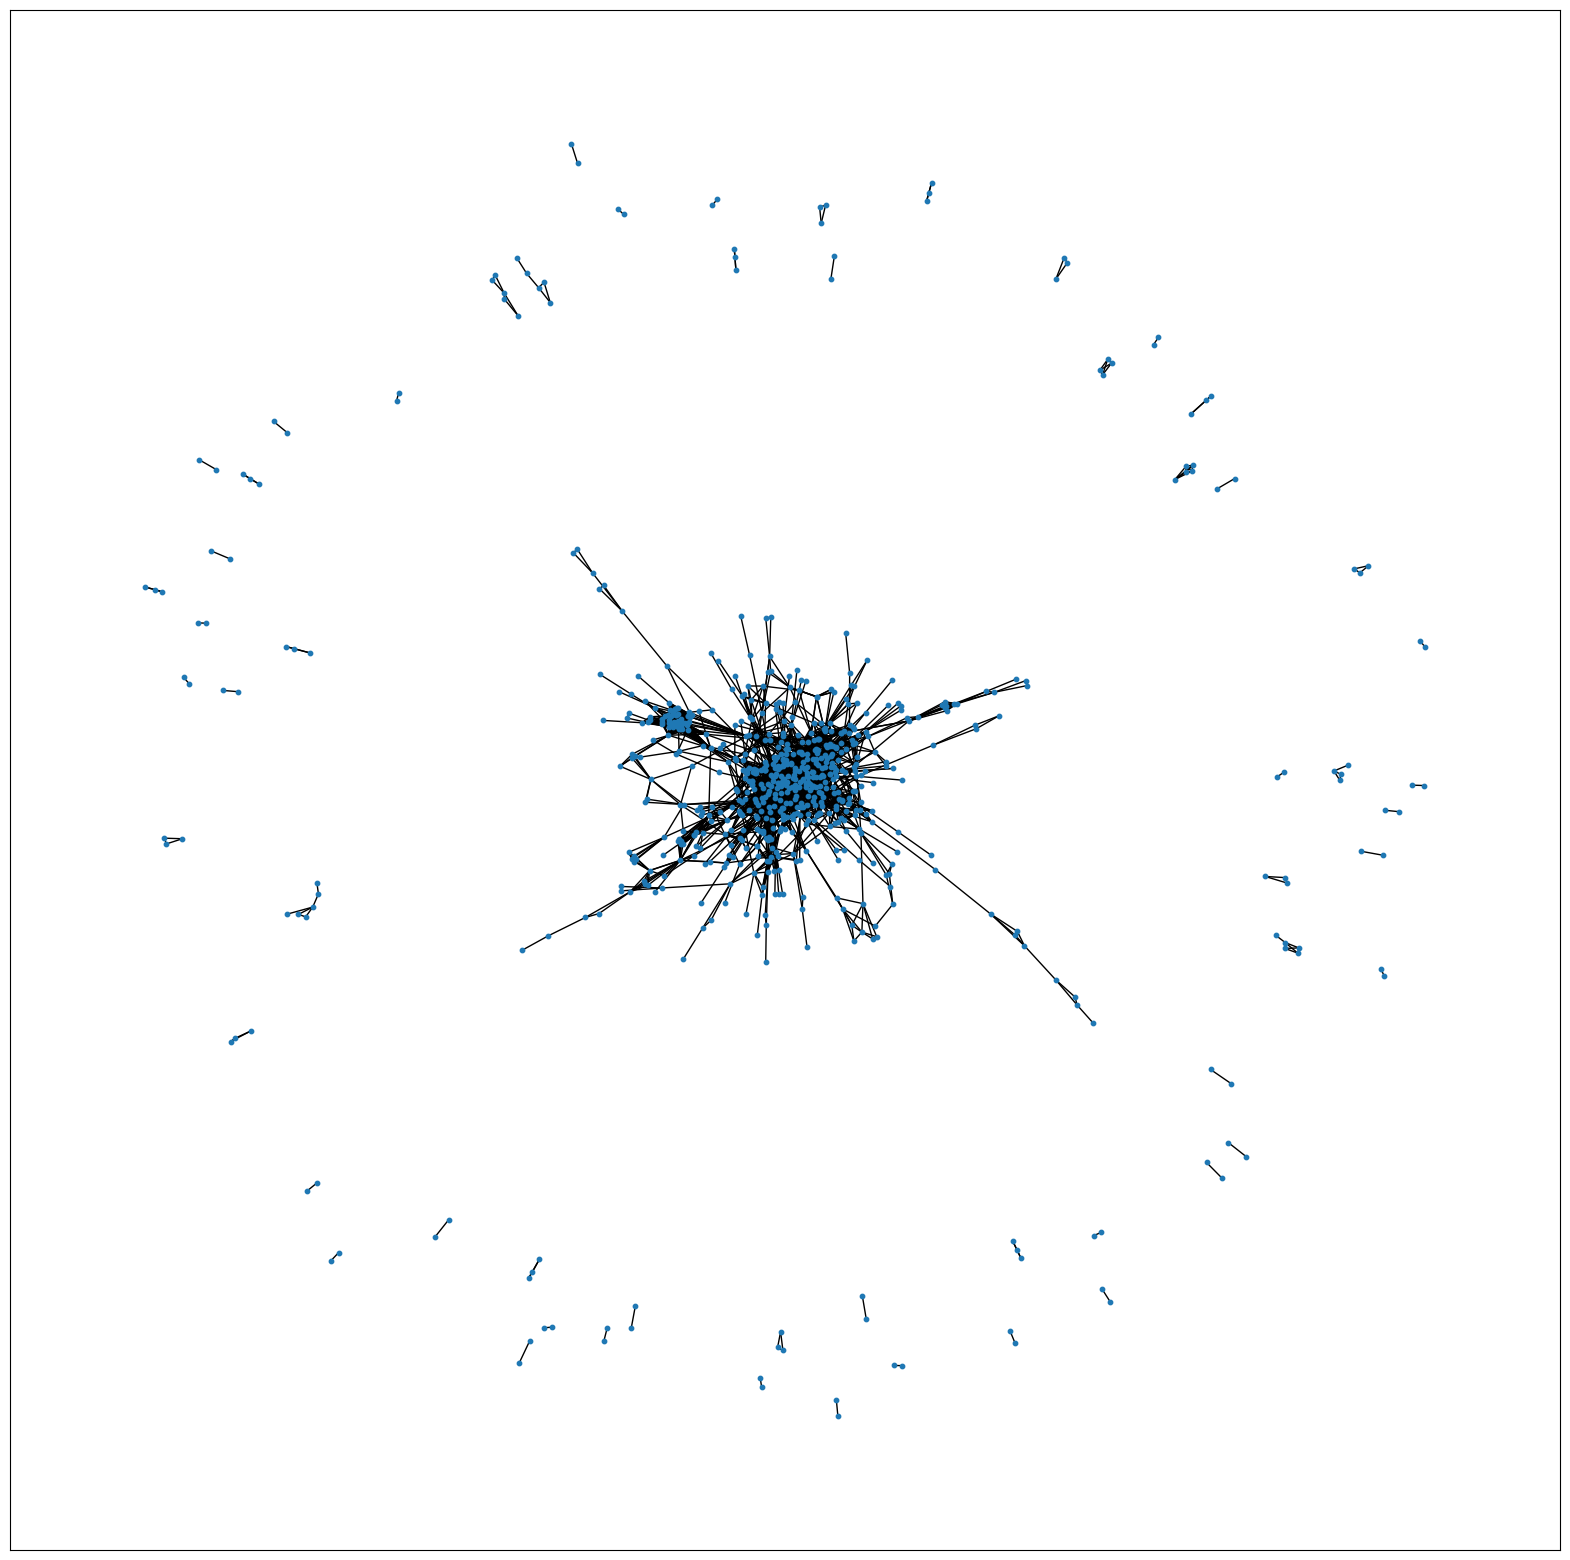

In [3759]:
# Create a graph from the co_investment_counts DataFrame
#get subset where co-investments >1
# co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
plt.savefig('graphs/co_investments_active_angels.png')
plt.show()
#save plot as png




In [3760]:
import pandas as pd
from d3graph import d3graph, vec2adjmat
source = co_investment_counts['shareholder_name_mapped_x']
target = co_investment_counts['shareholder_name_mapped_y']
weight = co_investment_counts['CoInvestments']


adjmat = vec2adjmat(source, target, weight=weight)

# Initialize
d3 = d3graph()

d3.graph(adjmat)
# save as graph.html in dataframes
d3.show('dataframes/graph.html')
# Additional customization for interactivity


# Convert to html and open in the browser
d3.show(filepath='output/graphs/graph_active_angels_mor_than_one_SH.html')


[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] WARNING> Colormap [Set2] can not create [76] unique colors! Available unique colors: [8].
[d3graph] INFO> Number of unique nodes: 757
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmp5wxvi39o/d3graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmp5wxvi39o/d3graph.html]
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graphs/graph_active_angels_mor_

## **Descriptive Statistics** - 2

In [3761]:
# #read in csv
# df_angels_active = pd.read_csv("/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/df_angels_active_to_correct - df_angels_active_to_correct.csv")

In [3762]:
df_investment_rel_angel_startup

relation_id                     created_at  \
55          26796  2024-03-01 09:34:30.714095+00   
56          26798  2024-03-01 09:34:30.740049+00   
69           8573  2024-02-29 19:06:55.372963+00   
85           8568  2024-02-29 19:06:52.103468+00   
86           8576  2024-02-29 19:06:55.502837+00   
...           ...                            ...   
27755       13252  2024-02-29 20:16:54.711297+00   
27756       13290  2024-02-29 20:17:07.298992+00   
27762       14319  2024-02-29 20:26:54.761092+00   
27765       14322  2024-02-29 20:26:54.841165+00   
27769       21763  2024-03-01 08:45:34.689682+00   

                                        shareholder_name  \
55             Wolfpack Ventures UG (haftungsbeschränkt)   
56                               Hanse Ventures BSJ GmbH   
69     SI Development & Service GmbH mit Sitz in Bad ...   
85                  MGH Beratungs- und Beteiligungs-GmbH   
86     Andreas und Thomas Schroeter Beteiligungsgesel...   
...                                                  ...   
27755                              Philipp Karsten Wolde   
27756                            Dr. Dr. Alexander Weiss   
27762                                    Benjamin Takats   
27765                                       Dennis Hauck   
27769                                        Ralph Lägel   

         shareholder_location birthdate register_id register_court  \
55                    Hamburg       NaN  HRB 164439        Hamburg   
56                    Hamburg       NaN  HRB 112633        Hamburg   
69     Bad Neuenahr-Ahrweiler       NaN   HRB 25590        Koblenz   
85                  Wiesbaden       NaN   HRB 23398      Wiesbaden   
86                Oberhaching       NaN  HRB 203572        München   
...                       ...       ...         ...            ...   
27755                 Hamburg       NaN         NaN            NaN   
27756                    Köln       NaN         NaN            NaN   
27762                 München       NaN         NaN            NaN   
27765                 München       NaN         NaN            NaN   
27769                  Berlin       NaN         NaN            NaN   

      percentage_of_total_shares shareholder_type                startup_name  \
55                         48.18            angel               one.five GmbH   
56                          33.2            angel  Animal Lovers Hamburg GmbH   
69                        0.9766            angel       TiRo CheckEnergy GmbH   
85                          0.99            angel  Mimotype Technologies GmbH   
86                        0.0028            angel       TiRo CheckEnergy GmbH   
...                          ...              ...                         ...   
27755                      25.89            angel                Pryntad GmbH   
27756                        NaN            angel      Hive Technologies GmbH   
27762                       23.0            angel         Affekt Digital GmbH   
27765                       20.0            angel         Affekt Digital GmbH   
27769                     1.1059            angel         Apricot Health GmbH   

       ... lastname            startup_industry_mapped  startup_industry  \
55     ...      NaN        technology_digital_services         ecommerce   
56     ...     maaß        technology_digital_services         ecommerce   
69     ...      NaN  energy_environment_infrastructure            energy   
85     ...      NaN                   production_trade          industry   
86     ...      NaN  energy_environment_infrastructure            energy   
...    ...      ...                                ...               ...   
27755  ...    wolde        technology_digital_services       advertising   
27756  ...    weiss                services_consulting         logistics   
27762  ...   takats        technology_digital_services             media   
27765  ...    hauck        technology_digital_services             media   
27769  ...

Descriptive Statistics on Angels

In [3763]:
df_angel_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of angels and add to df_angel_descriptive with variable name "total_number_of_angels"
total_number_of_angels = len(df_angels)
df_angel_descriptive.loc[0] = ["total_number_of_angels", total_number_of_angels]
#Calculate the amount of males among the angels
number_of_male_angels_total = len(df_angels[df_angels['gender'] == 'male'])
df_angel_descriptive.loc[1] = ["number_of_male_angels", number_of_male_angels_total]
#Calculate the amount of females among all angels
number_of_female_angels_total = len(df_angels[df_angels['gender'] == 'female'])
df_angel_descriptive.loc[2] = ["number_of_female_angels", number_of_female_angels_total]

# calculate share of female angels
share_of_female_angels = number_of_female_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[3] = ["share_of_female_angels_total", share_of_female_angels]

#calculate share of male angels
share_of_male_angels = number_of_male_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[4] = ["share_of_male_angels_total", share_of_male_angels]

#cast column number of age to integer
df_angels['age'] = pd.to_numeric(df_angels['age'], errors='coerce').fillna(1).astype(int)
#calculate mean of age for all angels where age is not 0
df_angels_mf = df_angels[df_angels['age'] != 1]
mean_age_of_all_angels = df_angels_mf['age'].mean()
df_angel_descriptive.loc[5] = ["mean_age_of_all_angels", mean_age_of_all_angels]

#Calculate mean age of female angels
df_female_angels = df_angels[df_angels['gender']=='female']
mean_age_of_female_angels = df_female_angels['age'].mean()
df_angel_descriptive.loc[6] = ["mean_age_of_all_female_angels", mean_age_of_female_angels]

#Calculate mean age of male angels
df_male_angels = df_angels[df_angels['gender']=='male']
mean_age_of_male_angels = df_male_angels['age'].mean()
df_angel_descriptive.loc[7] = ["mean_age_of_all_male_angels", mean_age_of_male_angels]



# df_gender_unknown = df_angels[df_angels['gender'] =='unknown']
# mean_age_unknown = df_gender_unknown['age'].mean()
# df_angel_descriptive.loc[8] = ["mean_age_of_all_unknown_angels", mean_age_unknown]

#Calulate total number of active angels and add to df_angel_descriptive with variable name "total_number_of_active_angels"
total_number_of_active_angels = len(df_angels[df_angels['status'] == 'active'])
df_angel_descriptive.loc[9] = ["total_number_of_active_angels", total_number_of_active_angels]

# Calculate number of angels investing through a holding and add to df_angel_descriptive with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels[df_angels['investment_type'] == 'holding'])
# add them to df
df_angel_descriptive.loc[10] = ["number_of_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]

#Calculate number of angels investing as a person and add to df_angel_descriptive with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels[df_angels['investment_type'] == 'person'])



# add them to df
df_angel_descriptive.loc[11] = ["number_of_angels_investing_as_a_person", number_of_angels_investing_as_a_person]

share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[12] = ["share_of_investments_through_holding", share_of_investments_through_holding]
# #share of investments through holding and add to df_angel_descriptive with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[13] = ["share_of_investments_as_person", share_of_investments_as_person]

#calculate number of angels where academic titke is not nan
number_of_angels_with_academic_title = len(df_angels[df_angels['title'].notnull()])

#calculate ratio of angels with academic title and add to df
ratio_of_angels_with_academic_title = number_of_angels_with_academic_title / number_of_angels_investing_as_a_person
df_angel_descriptive.loc[14] = ["ratio_of_angels_with_academic_title", ratio_of_angels_with_academic_title]

df_angel_descriptive

variable         value
0                         total_number_of_angels  14452.000000
1                          number_of_male_angels  11654.000000
2                        number_of_female_angels   1615.000000
3                   share_of_female_angels_total      0.121712
4                     share_of_male_angels_total      0.878288
5                         mean_age_of_all_angels     44.107529
6                  mean_age_of_all_female_angels     43.757895
7                    mean_age_of_all_male_angels     44.167067
9                  total_number_of_active_angels    903.000000
10  number_of_angels_investing_through_a_holding   4541.000000
11        number_of_angels_investing_as_a_person   9910.000000
12          share_of_investments_through_holding      0.314234
13                share_of_investments_as_person      0.685766
14           ratio_of_angels_with_academic_title      0.130979

In [3764]:
df_angels_descriptive_active = pd.DataFrame(columns=("variable","value"))
i=0
#only consider active angels
df_angels_active = df_angels[df_angels['status'] == 'active']

# Calculate number of angels investing through a holding and add to df_angels_descriptive_active with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels_active[df_angels_active['investment_type'] == 'holding'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]
i=i+1
#Calculate number of angels investing as a person and add to df_angels_descriptive_active with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels_active[df_angels_active['investment_type'] == 'person'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_as_a_person", number_of_angels_investing_as_a_person]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_through_holding", share_of_investments_through_holding]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_as_person", share_of_investments_as_person]
i=i+1
# calculate age based on birthdate and add to df_angel

#cast column number of age to integer
df_angels_active['age'] = pd.to_numeric(df_angels_active['age'], errors='coerce').fillna(1).astype(int)

#calculate mean age of angels and add to df_angels_descriptive_active with variable name "mean_age_of_angels"
mean_age_of_angels = df_angels_active['age'].mean()

# add them to df
df_angels_descriptive_active.loc[i] = ["mean_age_of_active_angels", mean_age_of_angels]
i=i+1
#Calculate the amount of males among the active angels
number_of_male_angels_active = len(df_angels_active[df_angels_active['gender'] == 'male'])
df_angels_descriptive_active.loc[i] = ["number_of_male_angels_active", number_of_male_angels_active]
i=i+1
#Calculate the amount of females among the active angels
number_of_female_angels_active = len(df_angels_active[df_angels_active['gender'] == 'female'])
df_angels_descriptive_active.loc[i] = ["number_of_female_angels_active", number_of_female_angels_active]
i=i+1

#calculate share of female angels
share_of_female_angels_active = number_of_female_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels female", share_of_female_angels_active]
i=i+1
#calculate share of male angels
share_of_male_angels_active = number_of_male_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels male", share_of_male_angels_active]
i=i+1
#Calculate average number of investment per active angel and add to df_angels_descriptive_active with variable name "average_number_of_investments_per_active_angel"
average_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].mean()
# add them to df
df_angels_descriptive_active.loc[i] = ["average_number_of_investments_per_active_angel", average_number_of_investments_per_active_angel]
i=i+1
#Calculate median number of investment per active angel and add to df_angels_descriptive_active with variable name "median_number_of_investments_per_active_angel"
median_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].median()
# add them to df
df_angels_descriptive_active.loc[i] = ["median_number_of_investments_per_active_angel", median_number_of_investments_per_active_angel]
i=i+1
#calculate number of angels where academic titke is not nan
number_of_angels_with_academic_title = len(df_angels_active[df_angels_active['title'].notnull()])

#calculate ratio of angels with academic title and add to df
ratio_of_angels_with_academic_title = number_of_angels_with_academic_title / number_of_angels_investing_as_a_person
df_angels_descriptive_active.loc[i] = ["ratio_of_angels_with_academic_title", ratio_of_angels_with_academic_title]

# #Calculate average inustry_HHI per active angel and add to df_angels_descriptive_active with variable name "average_inustry_HHI_per_active_angel"
# average_inustry_HHI = df_angels_active['industry_HHI'].mean()
# # add them to df
# df_angels_descriptive_active.loc[12] = ["average_industry_HHI", average_inustry_HHI]

# #Calculate average industry HHI across angels and add to df_angels_descriptive_active with variable name "average_industry_HHI_across_angels"
# average_industry_HHI_across_angels = df_angels_active['industry_HHI_angel'].mean()
# # add them to df
# df_angels_descriptive_active.loc[13] = ["average_industry_HHI_across_angels", average_industry_HHI_across_angels]

# #Calculate average eigenvector centrality across angels and add to df_angels_descriptive_active with variable name "average_eigenvector_centrality_across_angels"
# average_eigenvector_centrality_across_angels = df_angels_active['eigenvector_centrality'].mean()
# # add them to df
# df_angels_descriptive_active.loc[14] = ["average_eigenvector_centrality_across_angels", average_eigenvector_centrality_across_angels]

df_angels_descriptive_active

variable       value
0   number_of_active_angels_investing_through_a_ho...  603.000000
1       number_of_active_angels_investing_as_a_person  300.000000
2                share_of_investments_through_holding    0.667774
3                      share_of_investments_as_person    0.332226
4                           mean_age_of_active_angels   44.881506
5                        number_of_male_angels_active  781.000000
6                      number_of_female_angels_active   60.000000
7                       share of active angels female    0.071344
8                         share of active angels male    0.928656
9      average_number_of_investments_per_active_angel    2.550388
10      median_number_of_investments_per_active_angel    2.000000
11                ratio_of_angels_with_academic_title    0.176667

In [3765]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi

#calculate the industry_HHI for each angel based on the industry columns production_trade,technology_digital_services,energy_environment_infrastructure,healthcare,services_consulting
df_angels_active['industry_HHI'] = df_angels_active[['production_trade','technology_digital_services','energy_environment_infrastructure','healthcare','services_consulting']].apply(calculate_hhi, axis=1)

#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)

df_angels_active


shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19805                                 ALLUTI GmbH         9421.0   
19816                                   Beam GmbH         3104.0   
19839                          MM Investment GmbH         6459.0   
19842  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19867                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19805  2024-03-10 17:37:24.528696+00                      2            angel   
19816  2024-03-10 17:37:21.332579+00                      4            angel   
19839  2024-03-10 17:37:22.963246+00                      2            angel   
19842  2024-03-10 17:37:25.834675+00                      2            angel   
19867  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B             9.035000   
51       HRB 157901                     B Berlin             1.520000   
70              NaN                          NaN            21.375000   
88        HRB 17860                      Krefeld            33.333300   
90      FN 411158 w          Firmenbuch von Wien             0.486050   
...             ...                          ...                  ...   
19805        210537                 M\u00fcnchen             2.636859   
19816  HRB 194610 B               Charlottenburg            19.595800   
19839    HRB 216984               Charlottenburg            30.000000   
19842  HRB 151510 B               Charlottenburg             1.226000   
19867   HRB 181720B               Charlottenburg             8.727200   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19805             136.0  {"shareholder_purpose": "Verwaltung eigenen Ve...   
19816             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19839             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19842             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19867             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... mannheim birthdate 2017 2018 2019 2020 2021  status industry_HHI  \
23     ...      0.0       NaN  0.0  2.0  0.0  0.0  0.0  active     0.500000   
51     ...      0.0       NaN  0.0  0.0  1.0  1.0  0.0  active     0.500000   
70     ...      0.0       NaN  0.0  0.0  1.0  0.0  1.0  active     0.500000   
88     ...      0.0       NaN  1.0  0.0  0.0  0.0  1.0  active     1.000000   
90     ...      0.0       NaN  0.0  0.0  2

In [3766]:
#create df with columns variable and value
df_active_angels_descriptive_hhi = pd.DataFrame(columns=("variable","value"))
#calculate the average industry HHI for all active angels and put it into a df
average_industry_HHI = df_angels_active['industry_HHI'].mean()
average_industry_HHI
df_active_angels_descriptive_hhi.loc[0] = ["average_industry_HHI", average_industry_HHI]
#calculate the average region HHI for all active angels and put it into a df
average_region_HHI = df_angels_active['region_HHI'].mean()
average_region_HHI
df_active_angels_descriptive_hhi.loc[1] = ["average_region_HHI", average_region_HHI]

df_active_angels_descriptive_hhi    




variable     value
0  average_industry_HHI  0.603444
1    average_region_HHI  0.700547

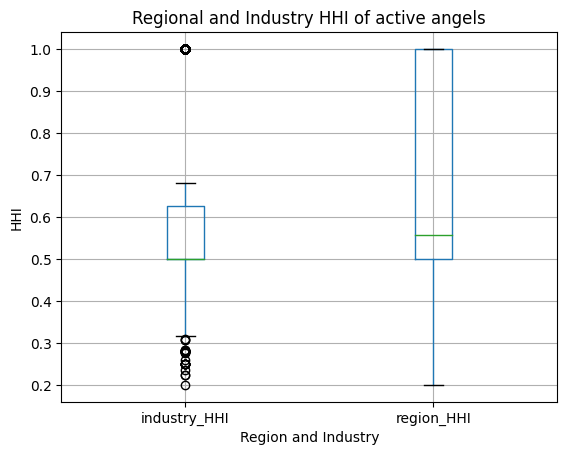

In [3767]:
#plot regional and industry HHI as boxplot in one graph

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
df_angels_active.boxplot(column=['industry_HHI', 'region_HHI'], ax=ax)

# Set the title and labels
ax.set_title('Regional and Industry HHI of active angels')
ax.set_ylabel('HHI')
ax.set_xlabel('Region and Industry')

# Save the plot
plt.savefig('output/graphs/boxplot_regional_industry_HHI.png')

# Show the plot
plt.show()

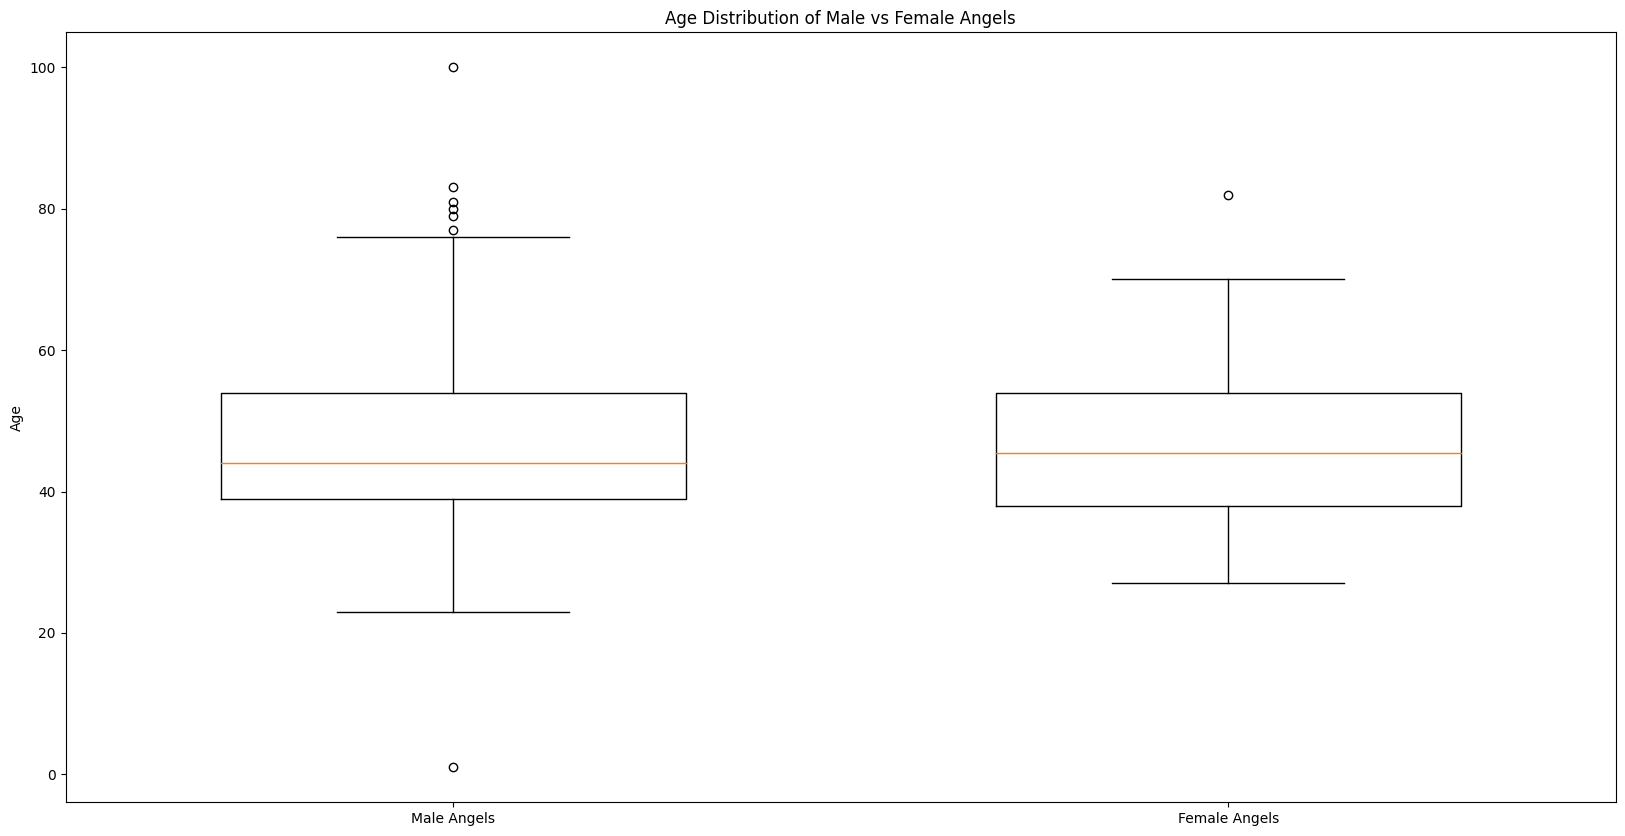

In [3768]:
import matplotlib.pyplot as plt

df_angels_male = df_angels_active[df_angels_active["gender"]=='male']

df_angels_female = df_angels_active[df_angels_active['gender']=='female']

# Assuming df_angels_male and df_angels_female are your dataframes and they both have an 'age' column

# Combine the data into a list where each element is a Series/DataFrame of ages
data_to_plot = [df_angels_male['age'], df_angels_female['age']]

plt.figure(figsize=(20,10))

# Create boxplot with the combined data
# The positions parameter is optional, it sets the positions of the boxes in the plot
plt.boxplot(data_to_plot, positions=[1, 2], widths=0.6)

# Set the x-tick labels to correspond to your two categories
plt.xticks([1, 2], ['Male Angels', 'Female Angels'])

plt.title('Age Distribution of Male vs Female Angels')
plt.ylabel('Age')

# Save the figure
plt.savefig('output/boxplot_age_gender_comparison.png')

plt.show()

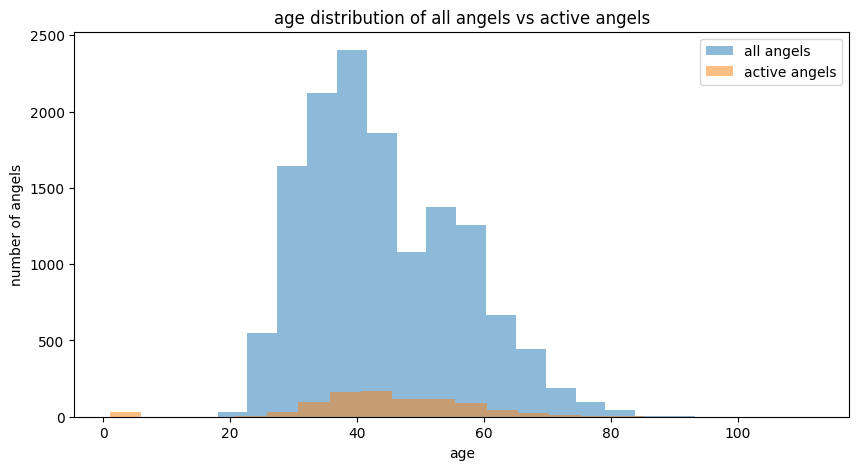

In [3769]:
#plot age distribution of all angels
plt.figure(figsize=(10,5))
#drop angels with age 0
df_angels_mf = df_angels[df_angels['age'] !=1]

plt.hist(df_angels_mf['age'], bins=20, alpha=0.5, label='all angels')
plt.hist(df_angels_active['age'], bins=20, alpha=0.5, label='active angels')
plt.xlabel('age')
plt.ylabel('number of angels')
plt.legend(loc='upper right')
plt.title('age distribution of all angels vs active angels')
plt.savefig('output/graphs/age_distribution_all_vs_active_angels.png')
plt.show()

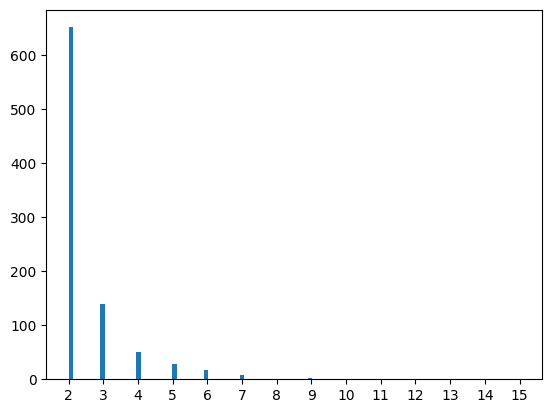

In [3770]:
#Plot distribution of number of investments per angel
plt.hist(df_angels_active['number_of_investments'], bins=100)
# only plot whole numbers on x-axis
plt.xticks(np.arange(min(df_angels_active['number_of_investments']), max(df_angels_active['number_of_investments'])+1, 1.0))
#export to png as "Number of investments.png"
plt.savefig('graphs/Distribution of number of investments.png')


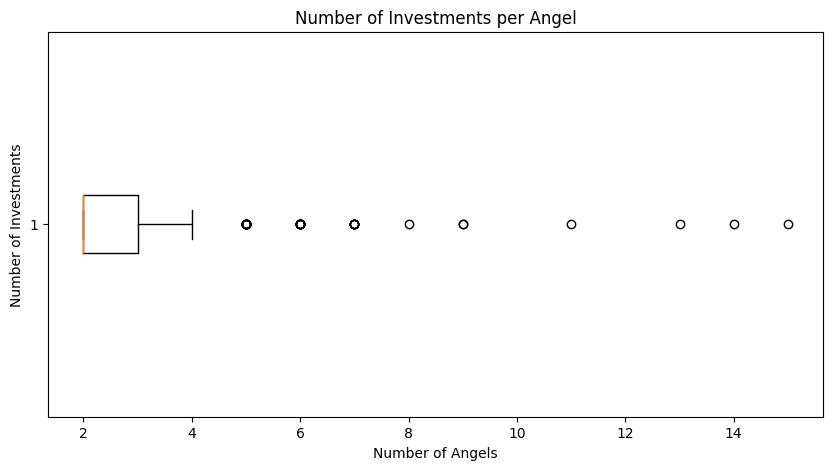

In [3771]:
plt.figure(figsize=(10, 5))
plt.boxplot(df_angels_active['number_of_investments'], vert=False)  # Set vert=False to swap the axes
plt.ylabel('Number of Investments')  # This is now the y-axis label
plt.xlabel('Number of Angels')       # This is now the x-axis label
plt.title('Number of Investments per Angel')

# To rotate x-axis labels (if needed):
# plt.xticks(rotation=90)

# To rotate y-axis labels (if needed):
# plt.yticks(rotation=90)

plt.savefig('graphs/boxplot_number_of_investments_per_angel.png')
plt.show()


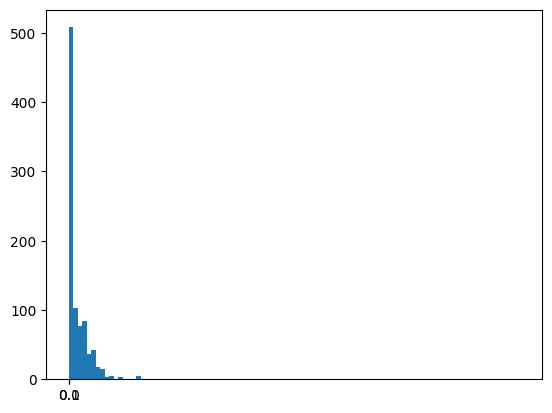

In [3772]:
#plot distribution of average shares in their investments including decimals
plt.hist(df_angels_active['total_participation'], bins=100)
# plot also decimals on X-axis from 0 to 0.2
plt.xticks(np.arange(0, 0.2, 0.1))
#export to png as "Distribution of average shares of angels.png"
plt.savefig('graphs/Distribution of average shares of angels.png')


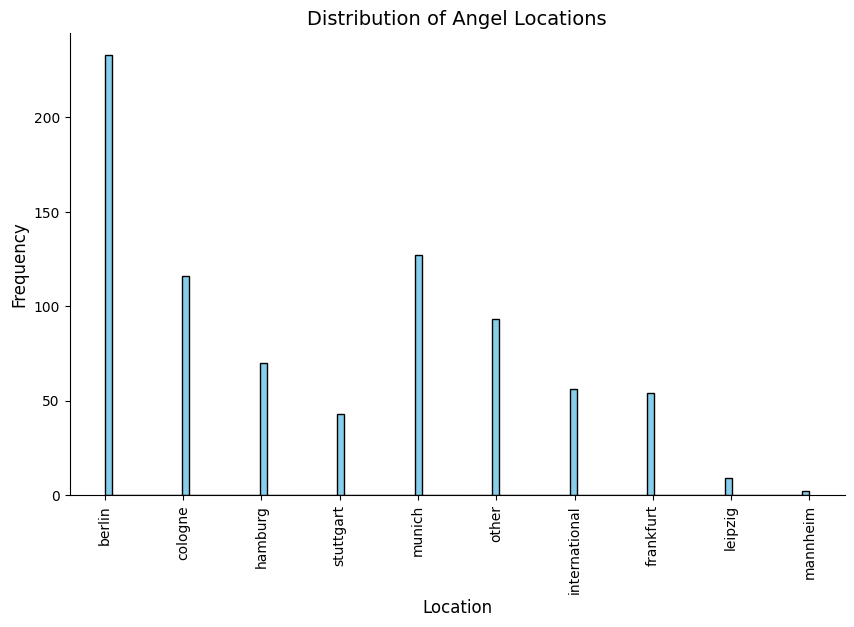

In [3773]:
import matplotlib.pyplot as plt

# Drop NaN values
data = df_angels_active['region_mapping'].dropna()

# Set the figure size
plt.figure(figsize=(10,6))

# Plot the histogram with a color
plt.hist(data, bins=100, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Distribution of Angel Locations', fontsize=14)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Remove top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#export graph as image called "Number of angels per region.png"
plt.savefig('graphs/Number of angels per region.png')

# Show the plot
plt.show()



## Descriptive Statistics on Startups

In [3774]:
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))
#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_companies", total_number_of_startups]
i=i+1
df_startup_descriptive

#get subset of startups with more than 2 shareholders
df_startups = df_startups[df_startups['number_shareholders'] > 2]
#get subset of startups that is also in df_investment_rel_angel_startup
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
number_startups_in_dataset=len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups_in_dataset", number_startups_in_dataset]
df_startup_descriptive

variable  value
0            total_number_of_companies   3854
1  total_number_of_startups_in_dataset   1083

In [3775]:
#save df_Startups to csv with name "startups_filtered.csv" and seperator ";"
df_startups.to_csv('dataframes/startups_filtered.csv', sep=";")

In [3776]:
df_investment_rel_angel_startup

relation_id                     created_at  \
55          26796  2024-03-01 09:34:30.714095+00   
56          26798  2024-03-01 09:34:30.740049+00   
69           8573  2024-02-29 19:06:55.372963+00   
85           8568  2024-02-29 19:06:52.103468+00   
86           8576  2024-02-29 19:06:55.502837+00   
...           ...                            ...   
27755       13252  2024-02-29 20:16:54.711297+00   
27756       13290  2024-02-29 20:17:07.298992+00   
27762       14319  2024-02-29 20:26:54.761092+00   
27765       14322  2024-02-29 20:26:54.841165+00   
27769       21763  2024-03-01 08:45:34.689682+00   

                                        shareholder_name  \
55             Wolfpack Ventures UG (haftungsbeschränkt)   
56                               Hanse Ventures BSJ GmbH   
69     SI Development & Service GmbH mit Sitz in Bad ...   
85                  MGH Beratungs- und Beteiligungs-GmbH   
86     Andreas und Thomas Schroeter Beteiligungsgesel...   
...                                                  ...   
27755                              Philipp Karsten Wolde   
27756                            Dr. Dr. Alexander Weiss   
27762                                    Benjamin Takats   
27765                                       Dennis Hauck   
27769                                        Ralph Lägel   

         shareholder_location birthdate register_id register_court  \
55                    Hamburg       NaN  HRB 164439        Hamburg   
56                    Hamburg       NaN  HRB 112633        Hamburg   
69     Bad Neuenahr-Ahrweiler       NaN   HRB 25590        Koblenz   
85                  Wiesbaden       NaN   HRB 23398      Wiesbaden   
86                Oberhaching       NaN  HRB 203572        München   
...                       ...       ...         ...            ...   
27755                 Hamburg       NaN         NaN            NaN   
27756                    Köln       NaN         NaN            NaN   
27762                 München       NaN         NaN            NaN   
27765                 München       NaN         NaN            NaN   
27769                  Berlin       NaN         NaN            NaN   

      percentage_of_total_shares shareholder_type                startup_name  \
55                         48.18            angel               one.five GmbH   
56                          33.2            angel  Animal Lovers Hamburg GmbH   
69                        0.9766            angel       TiRo CheckEnergy GmbH   
85                          0.99            angel  Mimotype Technologies GmbH   
86                        0.0028            angel       TiRo CheckEnergy GmbH   
...                          ...              ...                         ...   
27755                      25.89            angel                Pryntad GmbH   
27756                        NaN            angel      Hive Technologies GmbH   
27762                       23.0            angel         Affekt Digital GmbH   
27765                       20.0            angel         Affekt Digital GmbH   
27769                     1.1059            angel         Apricot Health GmbH   

       ... lastname            startup_industry_mapped  startup_industry  \
55     ...      NaN        technology_digital_services         ecommerce   
56     ...     maaß        technology_digital_services         ecommerce   
69     ...      NaN  energy_environment_infrastructure            energy   
85     ...      NaN                   production_trade          industry   
86     ...      NaN  energy_environment_infrastructure            energy   
...    ...      ...                                ...               ...   
27755  ...    wolde        technology_digital_services       advertising   
27756  ...    weiss                services_consulting         logistics   
27762  ...   takats        technology_digital_services             media   
27765  ...    hauck        technology_digital_services             media   
27769  ...

In [3777]:
#get startups_id that are in df_investment_relations_angel_startup but not in df_startps
startups_not_in_df_startups = df_investment_rel_angel_startup[~df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]


In [3778]:
#get startups with startup_name Bluu GmbH
df_startups_bluu = df_startups[df_startups['startup_name'] == 'Bluu GmbH']
df_startups_bluu

Empty DataFrame
Columns: [startup_id, created_at, startup_name, shareholder_json, list_mds, number_angels, startup_industry, startup_purpose, link_shareholder_file_2021, link_si_file_current, date_incorporated, register_identification_number, register, register_mapping, startup_location, startup_website, startup_linkedin, startup_industry_mapped, azure_json, error, link_structured_content_file_current, azure_json_2021, shareholder_json_2021, startup_region, changed_shareholder_structure, number_shareholders, region_mapping, number_of_shareholders, year_of_incorporation, number_all_angels, funding_round_type]
Index: []

[0 rows x 31 columns]

In [3779]:
#calculate for each startup number_angels per startup as variable number_angels from how often shareholder_type in df_investment_rel_angel_startup is "angel"
#for each row in df_startups, count how often the startup_name occurs in df_investment_rel_angel_startup where shareholder_type is "angel"
print(len(df_investment_rel_angel_startup))
df_startups['number_angels'] = df_startups['startup_name'].map(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'].value_counts())
#get df_investment_rel_angel_startup where shareholder_type is "angel"


#get sum of all number of angels
sum_number_angels = df_startups['number_angels'].sum()
sum_number_angels


2303


2303

In [3780]:
# Calculate descriptive statistics for strtups from df_startups, add to df_startup_descriptive
# we want to calculate the following variables:
# total_number_of_startups
#average number of angel investors
#median number of angel investors
#average number of active angels
#median number of active angels
#get subset of df_startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))

# total_number_of_startups = len(df_startups)
# df_startup_descriptive.loc[i] = ["total_number_of_companies", total_number_of_startups]
i=i+1

# # get subset of startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'])]

# # get subset where angel is active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']['startup_name'])]

#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups", total_number_of_startups]
i=i+1
#Calulate average number of angel investors and add to df_startup_descriptive with variable name "average_number_of_angel_investors"
average_number_of_angel_investors = df_startups['number_shareholders'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_shareholders", average_number_of_angel_investors]
i=i+1
#Calulate median number of angel investors and add to df_startup_descriptive with variable name "median_number_of_angel_investors"
median_number_of_angel_investors = df_startups['number_shareholders'].median()
df_startup_descriptive.loc[i] = ["median_number_of_shareholders", median_number_of_angel_investors]
i=i+1
#Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
average_number_of_angels = df_startups['number_angels'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_angels", average_number_of_angels]
i=i+1
#Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
median_number_of_angels = df_startups['number_angels'].median()
df_startup_descriptive.loc[i] = ["median_number_of_angels", median_number_of_angels]
i=i+1
# #Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
# average_number_of_active_angels = df_startups['number_of_active_angels'].mean()
# df_startup_descriptive.loc[5] = ["average_number_of_active_angels", average_number_of_active_angels]

# #Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
# median_number_of_active_angels = df_startups['number_of_active_angels'].median()
# df_startup_descriptive.loc[6] = ["median_number_of_active_angels", median_number_of_active_angels]


df_startup_descriptive



variable        value
1        total_number_of_startups  1083.000000
2  average_number_of_shareholders     8.073869
3   median_number_of_shareholders     6.000000
4        average_number_of_angels     2.126500
5         median_number_of_angels     1.000000

In [3781]:
#count how often values for number_angels occur
df_startups['number_angels'].value_counts()


1     608
2     219
3     111
4      52
5      25
6      21
7      13
8      10
12      5
9       4
10      3
14      3
15      3
13      2
11      2
16      1
17      1
Name: number_angels, dtype: int64

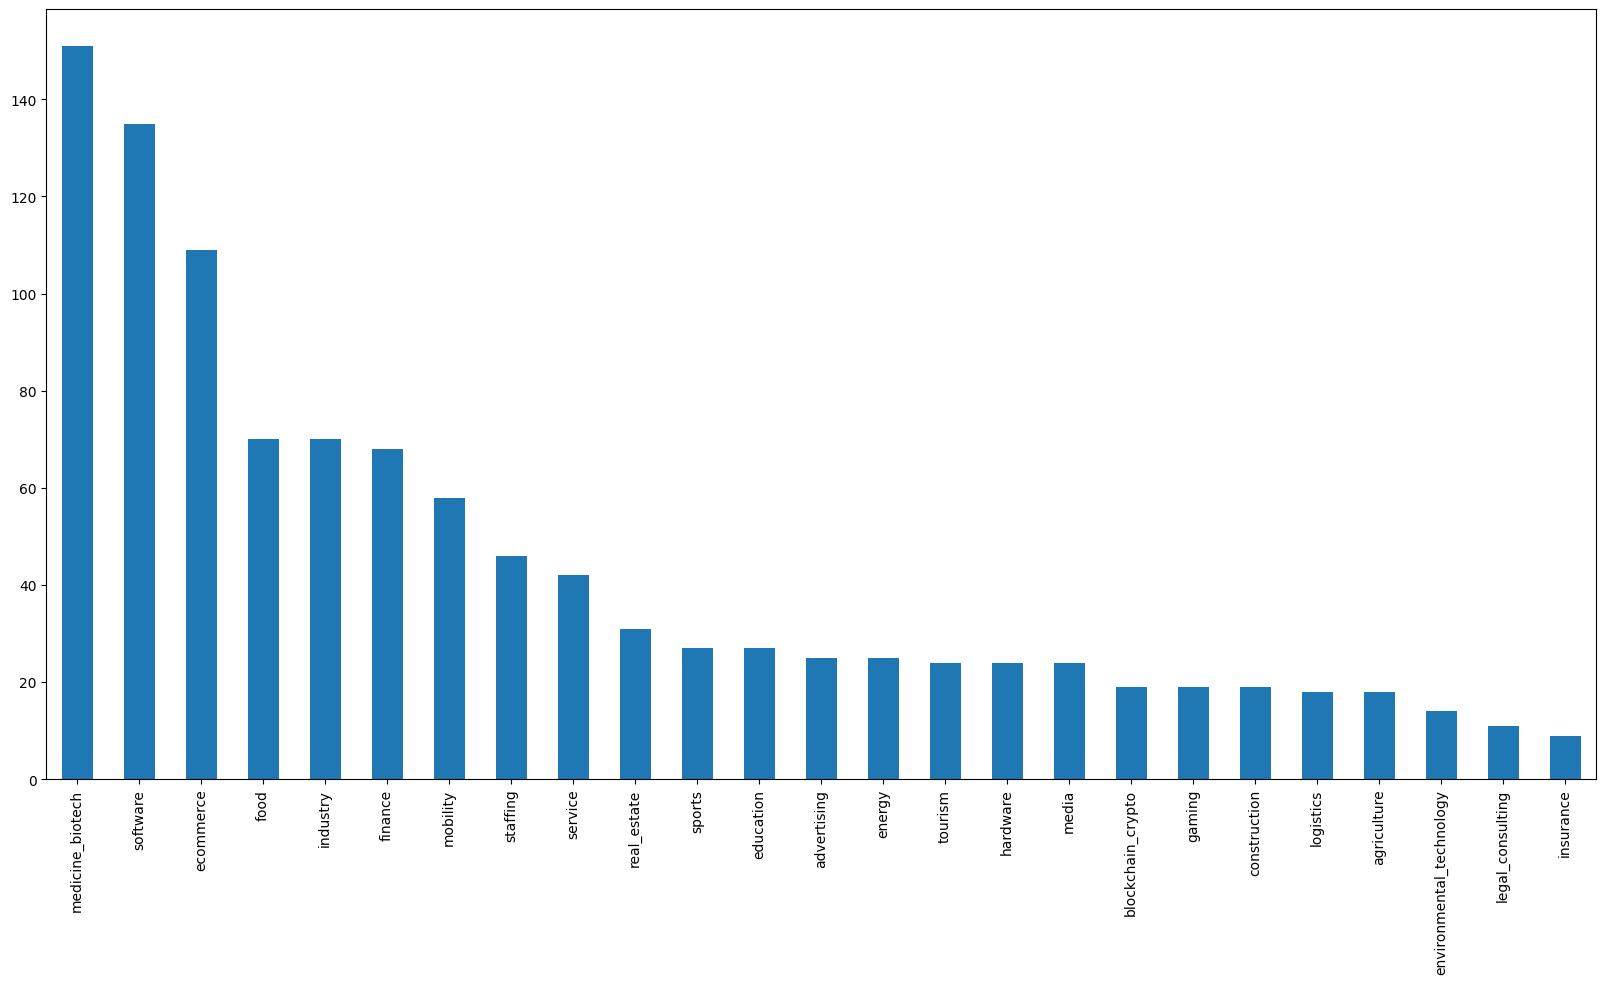

In [3782]:
#Plot startups per startup_industry_mapped
plt.figure(figsize=(20,10))
#plot the number of startups per industry
df_startups['startup_industry'].value_counts().plot(kind='bar')
#plot all industries
plt.xticks(rotation=90)

#export graph as image called "Number of Startups per Industry.png"
plt.savefig('graphs/Number of Startups per Industry.png')

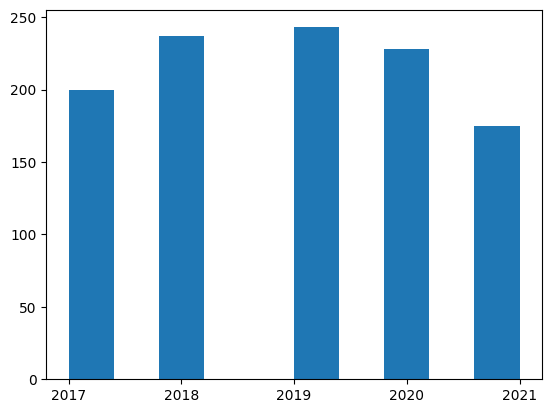

In [3783]:
#add startup year_of_incorporation to df_startups based on date_incorporated
df_startups['year_of_incorporation'] = pd.to_datetime(df_startups['date_incorporated']).dt.year
#Plot startups per year of incorporation
plt.hist(df_startups['year_of_incorporation'], bins=10)
#plot all years, make 1 year jumps, no decimals, make the bars thicker
plt.xticks(np.arange(min(df_startups['year_of_incorporation']), max(df_startups['year_of_incorporation'])+1, 1.0))

#export graph as image called "Number of Startups per Year of Incorporation.png"
plt.savefig('graphs/Number of Startups per Year of Incorporation.png')

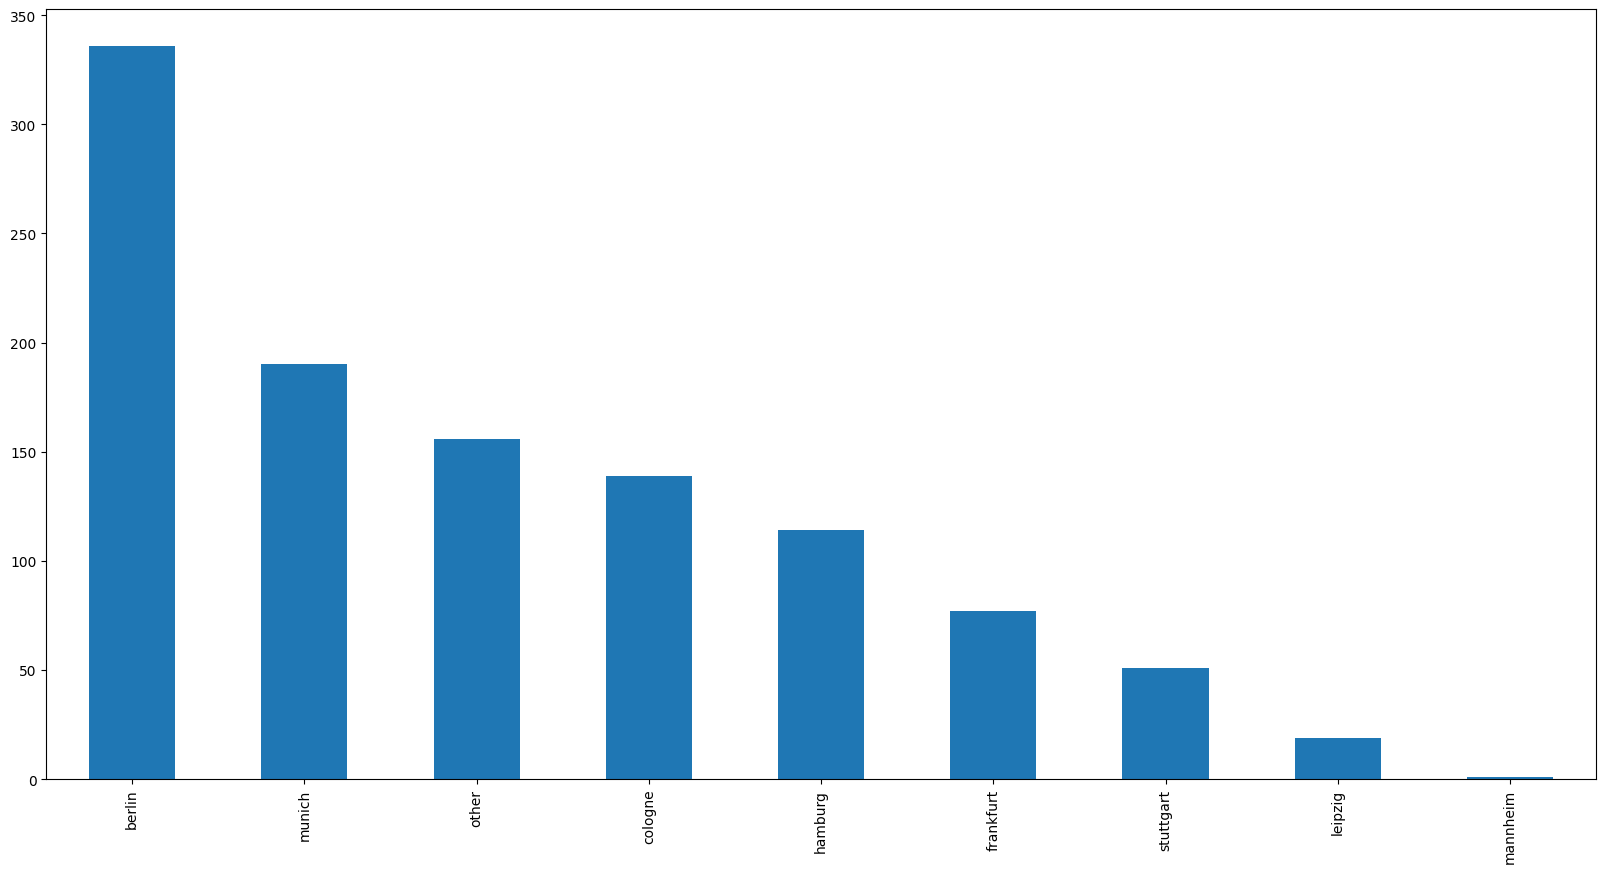

In [3784]:
#plot startups per egion
plt.figure(figsize=(20,10))
#plot the number of startups per region
df_startups['region_mapping'].value_counts().plot(kind='bar')
#plot all regions
plt.xticks(rotation=90)
#export graph as image called "Number of Startups per Region.png"
plt.savefig('graphs/Number of Startups per Region.png')
plt.show()

## Network metrics



In [3785]:
#Cosntruct a network graph of only the active angels
# get a list of co-investments

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#get subset of only active angels
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]

# #get subset of df_investment_rel_angel_startup where startup_name is part of df_startups
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]


# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts)


            shareholder_name_mapped_x  \
6120                   whiletrue_GmbH   
4449                ROMM_Holding_GmbH   
4443                ROMM_Holding_GmbH   
4806     Roskopf_Ventures_GmbH_Berlin   
4785     Roskopf_Ventures_GmbH_Berlin   
...                               ...   
2200             Gerbig_Ventures_GmbH   
2199             Gerbig_Ventures_GmbH   
2198       Georg_Wilhelm_Dieter_Ammer   
2197          Gaia_Beteiligungen_GmbH   
6145  wrapall_UG_(haftungsbeschränkt)   

                              shareholder_name_mapped_y  CoInvestments  
6120                                  ROMM_Holding_GmbH              6  
4449                                     whiletrue_GmbH              6  
4443                       Roskopf_Ventures_GmbH_Berlin              6  
4806                                  ROMM_Holding_GmbH              6  
4785                                         Alvio_GmbH              5  
...                                                 ...            ..

In [3786]:
#sum up CoInvestments
sum_co_investments = co_investment_counts['CoInvestments'].sum()
sum_co_investments

7402

In [3787]:
#save df_investment_rel_angel_startup as csv
df_investment_rel_angel_startup.to_csv('dataframes/df_investment_rel_angel_startup.csv', index=False)


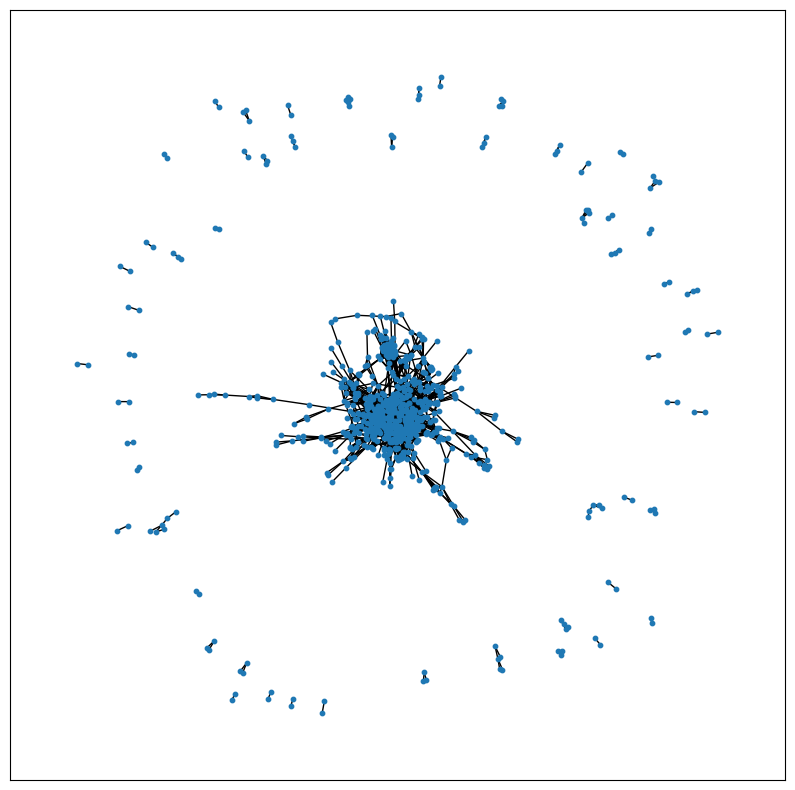

In [3788]:
# Create a graph from the co_investment_counts DataFrame

G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


In [3789]:
#get unique shareholder_ids in df_investment_rel_angel_startup
unique_shareholder_ids = df_investment_rel_angel_startup['shareholder_name_mapped'].unique()
len(unique_shareholder_ids)

903

In [3790]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(G.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(G.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]

#Calculate eigenvector centrality per angel
eigenvector_centrality = nx.eigenvector_centrality(G)
#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(eigenvector_centrality)


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

# #Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
# average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(G).items()])
# df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

# #Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
# median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(G).items()])
# df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

# #Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
# average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(G).items()])
# df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

# #Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
# median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(G).items()])
# df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

# #Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
# average_pagerank = np.mean([v for k,v in nx.pagerank(G).items()])
# df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

# #Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
# median_pagerank = np.median([v for k,v in nx.pagerank(G).items()])
# df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]


#sum up co-investments where shareholder_name_mapped_x = shareholder_name in df_angels_active
df_angels_active['number_of_co_investments'] = df_angels_active['shareholder_name'].map(co_investment_counts.groupby('shareholder_name_mapped_x')['CoInvestments'].sum())
#calculate mean
average_number_of_co_investments = df_angels_active['number_of_co_investments'].mean()
#add to df
df_network_descriptive.loc[16] = ["average_number_of_co_investors", average_number_of_co_investments]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = df_angels_active['number_of_co_investments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments_with_one_other_shareholder", maximum_number_of_co_investments]


df_network_descriptive

variable        value
0                               total_number_of_nodes   757.000000
1                               total_number_of_edges  3073.000000
2                                      average_degree     8.118890
3                                       median_degree     5.000000
4                      average_clustering_coefficient     0.562753
5                       median_clustering_coefficient     0.562753
8                      average_eigenvector_centrality     0.009027
9                       median_eigenvector_centrality     0.000039
16                     average_number_of_co_investors          NaN
17          median_number_of_co_investments_per_angel          NaN
18  maximum_number_of_co_investments_with_one_othe...     6.000000

In [3791]:
co_investment_counts.groupby('shareholder_name_mapped_x')['CoInvestments'].sum()

shareholder_name_mapped_x
5W_Tech_Ventures_UG_(haftungsbeschränkt)     4
7gen_Holdings_GmbH                          10
8eyes_GmbH                                  15
A06_Ventures_UG_(haftungsbeschränkt)        11
ADVINOS_GmbH                                 4
                                            ..
tbd.investments_GmbH                        17
transloid_GmbH                               3
ueGei_Capital_UG_(haftungsbeschränkt)        2
whiletrue_GmbH                              61
wrapall_UG_(haftungsbeschränkt)             19
Name: CoInvestments, Length: 757, dtype: int64

Average shortest path length: 4.3935138968442295
Average clustering coefficient: 0.5896659732121947
Is the original graph a small-world graph? True


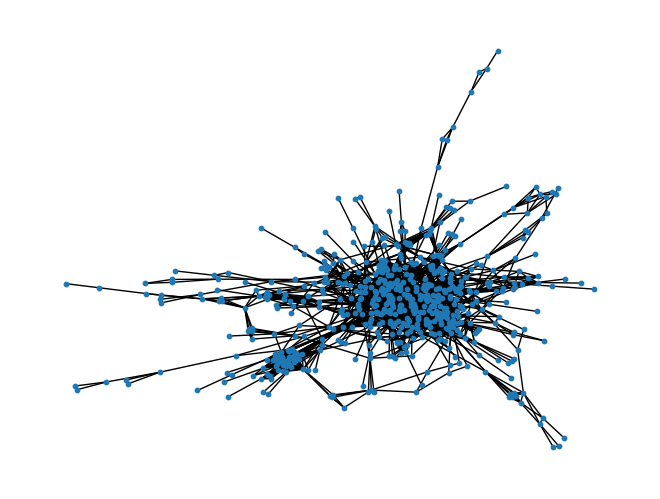

In [3792]:
#check network for largest connected component
largest_cc = max(nx.connected_components(G), key=len)
import networkx as nx
#show largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)
#plot largest connected component
nx.draw(largest_cc_subgraph, with_labels=False, node_size=10, edge_color='black')


# # Calculate average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(largest_cc_subgraph)
print(f"Average shortest path length: {avg_shortest_path_length}")

# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(largest_cc_subgraph)
print(f"Average clustering coefficient: {avg_clustering_coeff}")

import numpy as np
# Create a random graph with the same number of nodes and similar number of edges, force connectedness
random_graph = nx.connected_watts_strogatz_graph(n=total_number_of_nodes, k=4, p=0.5)

# Calculate metrics for the random graph
random_avg_shortest_path_length = nx.average_shortest_path_length(random_graph)
random_avg_clustering_coeff = nx.average_clustering(random_graph)

# Compare metrics
print(f"Is the original graph a small-world graph? {np.all([(avg_clustering_coeff > random_avg_clustering_coeff), (avg_shortest_path_length <= random_avg_shortest_path_length)])}")

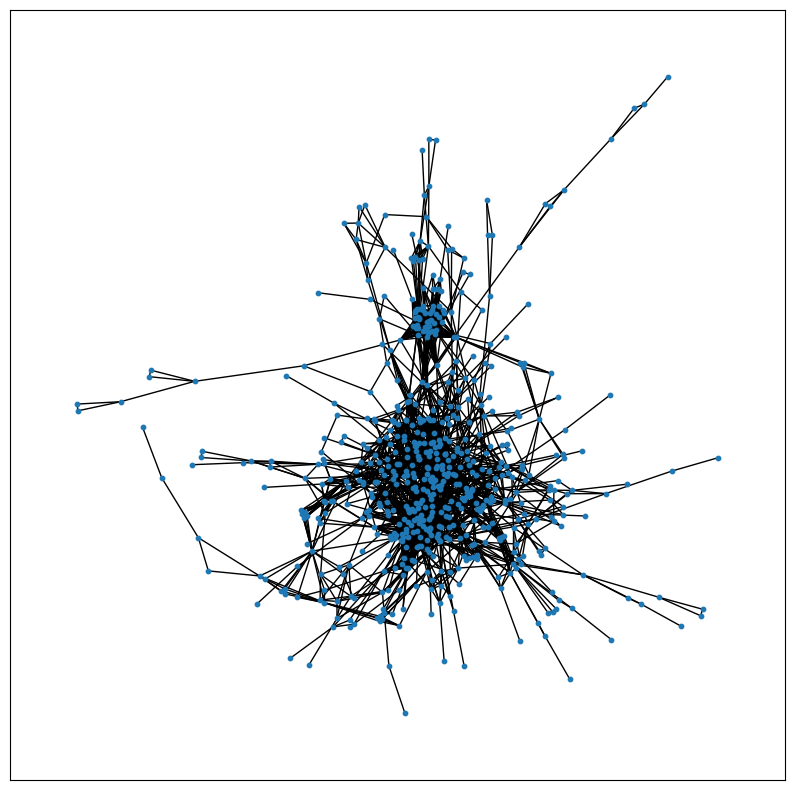

In [3793]:
#plot largest subgraph
# Create a subgraph of the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
#save as png
plt.savefig('graphs/largest_connected_component.png')
plt.show()


In [3794]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(subgraph.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(subgraph.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

#Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

#Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

#Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

#Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

#Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
average_pagerank = np.mean([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

#Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
median_pagerank = np.median([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]

#Calculate average number of co-investments per angel and add to df_network_descriptive with variable name "average_number_of_co_investments_per_angel"
average_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].mean()
df_network_descriptive.loc[16] = ["average_number_of_co_investments_per_angel", average_number_of_co_investments_per_angel]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments", maximum_number_of_co_investments]


df_network_descriptive

variable        value
0                        total_number_of_nodes   606.000000
1                        total_number_of_edges  2948.000000
2                               average_degree     9.729373
3                                median_degree     7.000000
4               average_clustering_coefficient     0.589666
5                median_clustering_coefficient     0.589666
8               average_eigenvector_centrality     0.011275
9                median_eigenvector_centrality     0.000116
10              average_betweenness_centrality     0.005618
11               median_betweenness_centrality     0.001802
12                average_closeness_centrality     0.236538
13                 median_closeness_centrality     0.241758
14                            average_pagerank     0.001650
15                             median_pagerank     0.001564
16  average_number_of_co_investments_per_angel     1.204361
17   median_number_of_co_investments_per_angel     1.000000
18            maximum_number_of_co_investments     6.000000

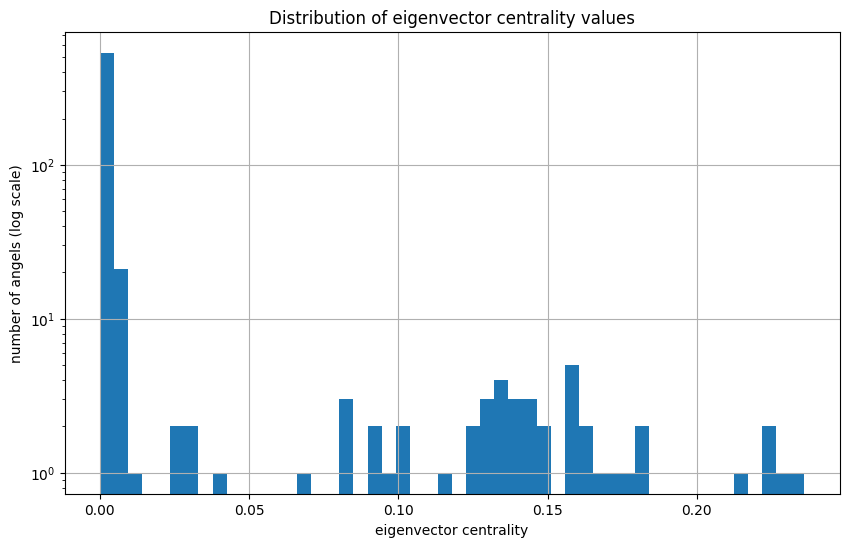

In [3795]:
#plot distribution of eigenvector centrality values, start plot with 0.1 and end with 0.2
eigenvector_cebtrality_values= [v for k,v in nx.eigenvector_centrality(subgraph).items()]



#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(subgraph))
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_cebtrality_values, bins=50, log=True, range=(0, max(eigenvector_cebtrality_values)))
plt.title('Distribution of eigenvector centrality values')
plt.xlabel('eigenvector centrality')
plt.ylabel('number of angels (log scale)')
plt.grid(True)

# plt.xticks(np.arange(0.2, 0.1))
# #Swap x and y axis

# #add title
# plt.title('Distribution of eigenvector centrality values')
# #add x label
# plt.xlabel('eigenvector centrality')
# #add y label
# plt.ylabel('number of angels')
# #add labels on x axis
# plt.xticks(rotation=90)
# #remove top and right spines
# plt.gca().spines['top'].set_visible(False)

# #export graph as image called "Distribution of eigenvector centrality values.png"
plt.savefig('graphs/Distribution of eigenvector centrality values.png')
plt.show()

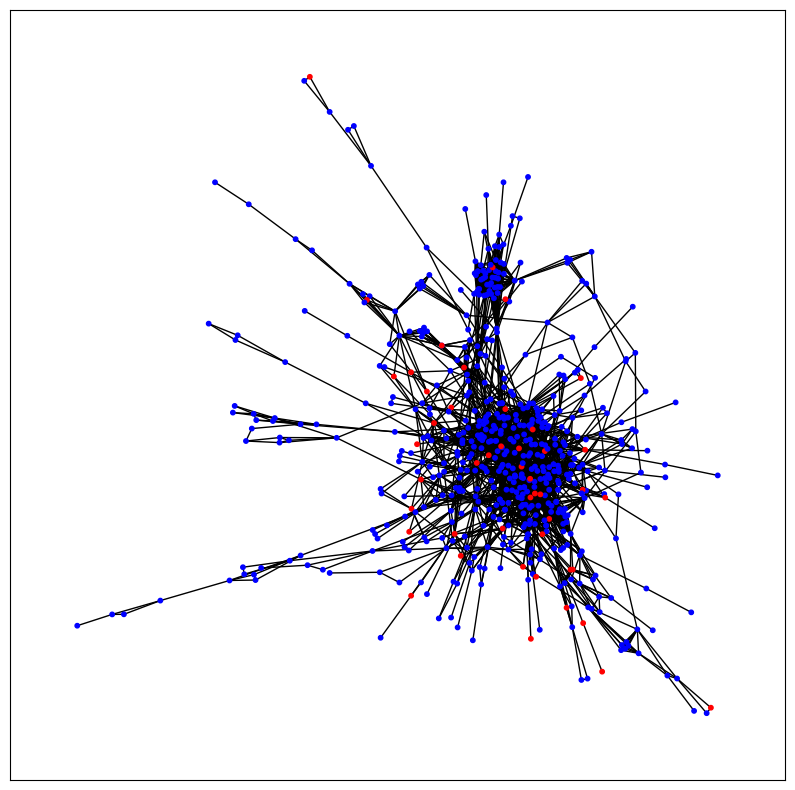

In [3796]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

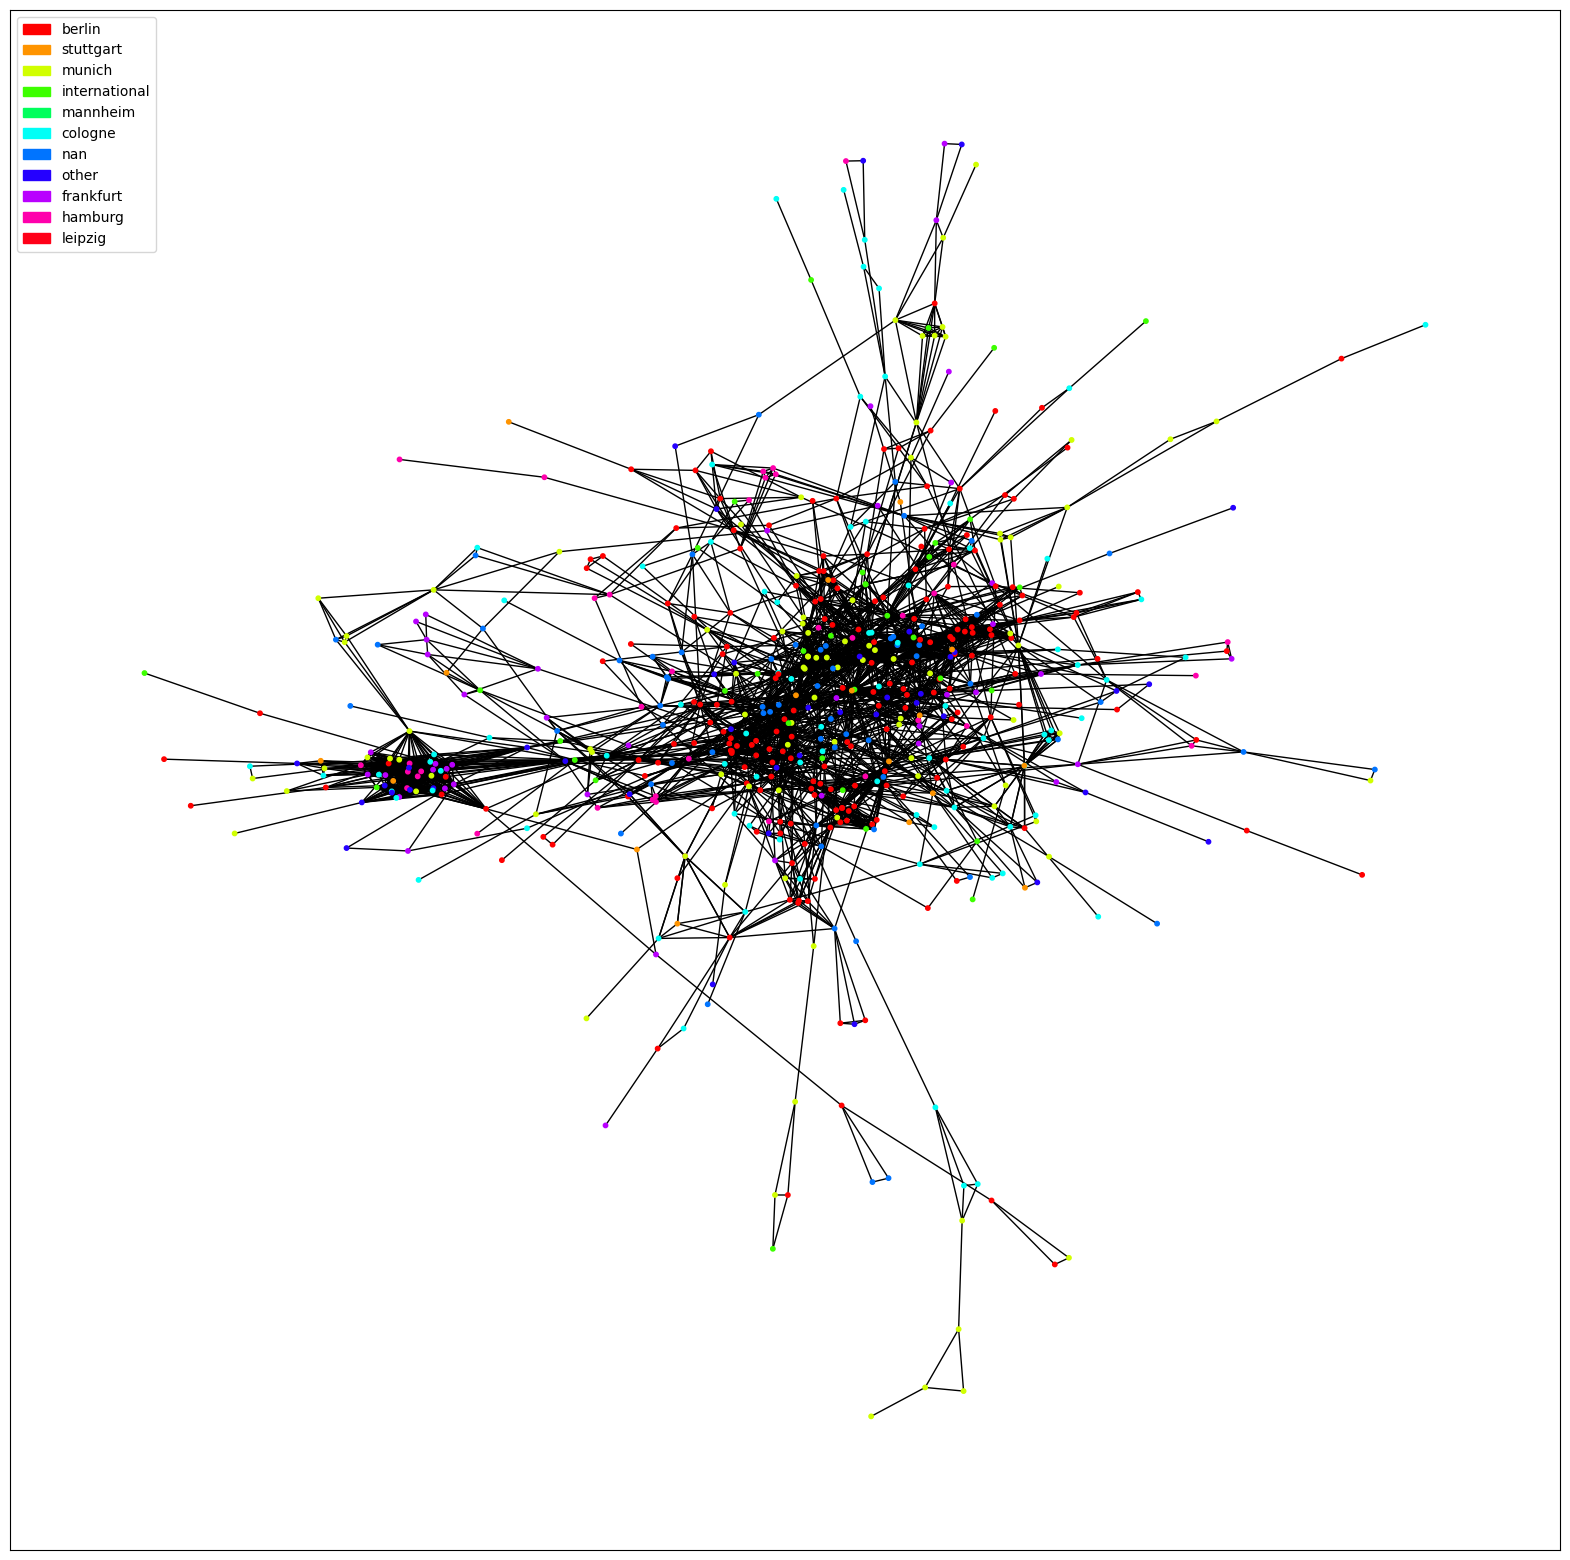

In [3797]:
from matplotlib import patches


df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


In [3798]:
# get subset of startups where link_si_file_current is ""
df_startups_no_link_si_file = df_startups[df_startups['link_si_file_current'].isnull()]
df_startups_no_link_si_file
#save as CSV
df_startups_no_link_si_file.to_csv('dataframes/startups_no_link_si_file.csv', sep=';')

In [3799]:
#sum of number_angels of all startups
sum_number_angels = df_startups['number_angels'].sum()
sum_number_angels

2303

In [3800]:
#get shareholders who are nodes in largest connected component
shareholders_in_largest_cc = set(subgraph.nodes)
#filter df_angels_active for shareholders in largest connected component
df_angels_active_largest_cc = df_angels_active[df_angels_active['shareholder_name'].isin(shareholders_in_largest_cc)]

#get subset of startup_name in df_investment_relations_angel_startup where minimum 2 angels in largest subgraph are shareholders
startups_in_largest_cc = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active_largest_cc['shareholder_name'])]

#get subset of startups in df_startups that are in startups_in_largest_cc
df_startups_largest_cc = df_startups[df_startups['startup_name'].isin(startups_in_largest_cc['startup_name'])]
df_startups_largest_cc

Empty DataFrame
Columns: [startup_id, created_at, startup_name, shareholder_json, list_mds, number_angels, startup_industry, startup_purpose, link_shareholder_file_2021, link_si_file_current, date_incorporated, register_identification_number, register, register_mapping, startup_location, startup_website, startup_linkedin, startup_industry_mapped, azure_json, error, link_structured_content_file_current, azure_json_2021, shareholder_json_2021, startup_region, changed_shareholder_structure, number_shareholders, region_mapping, number_of_shareholders, year_of_incorporation, number_all_angels, funding_round_type]
Index: []

[0 rows x 31 columns]

In [3801]:
df_angels_active

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19805                                 ALLUTI GmbH         9421.0   
19816                                   Beam GmbH         3104.0   
19839                          MM Investment GmbH         6459.0   
19842  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19867                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19805  2024-03-10 17:37:24.528696+00                      2            angel   
19816  2024-03-10 17:37:21.332579+00                      4            angel   
19839  2024-03-10 17:37:22.963246+00                      2            angel   
19842  2024-03-10 17:37:25.834675+00                      2            angel   
19867  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B             9.035000   
51       HRB 157901                     B Berlin             1.520000   
70              NaN                          NaN            21.375000   
88        HRB 17860                      Krefeld            33.333300   
90      FN 411158 w          Firmenbuch von Wien             0.486050   
...             ...                          ...                  ...   
19805        210537                 M\u00fcnchen             2.636859   
19816  HRB 194610 B               Charlottenburg            19.595800   
19839    HRB 216984               Charlottenburg            30.000000   
19842  HRB 151510 B               Charlottenburg             1.226000   
19867   HRB 181720B               Charlottenburg             8.727200   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19805             136.0  {"shareholder_purpose": "Verwaltung eigenen Ve...   
19816             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19839             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19842             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19867             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... 2017 2018 2019 2020 2021  status industry_HHI region_HHI  \
23     ...  0.0  2.0  0.0  0.0  0.0  active     0.500000   0.500000   
51     ...  0.0  0.0  1.0  1.0  0.0  active     0.500000   0.500000   
70     ...  0.0  0.0  1.0  0.0  1.0  active     0.500000   0.500000   
88     ...  1.0  0.0  0.0  0.0  1.0  active     1.000000   1.000000   
90     ...  0.0  0.0  2.0  0.0  0.0  active     0.500000   1.000000   
...    ... 

## Simulating a network - 3



In [4367]:
# Initialize an empty DataFrame to record the simulated investment relations
df_investment_rel_angel_startup_simulated = pd.DataFrame()

# Initialize a dictionary to keep track of the angels that have invested in each startup
angel_startup_map = {}
df_angels_active['number_of_simulated_investments'] = 0
# Loop through each startup
for _, startup in df_startups.iterrows():
    x = 0
    
    # Initialize an empty list for each startup to keep track of its angels
    angel_startup_map[startup['startup_name']] = []
    while x < startup['number_angels']:
        #cast to int
        #make string from year_of_incorporation
        startup['year_of_incorporation'] = str(startup['year_of_incorporation'])
        
        df_angels_active[startup['region_mapping']] = pd.to_numeric(df_angels_active[startup['region_mapping']], errors='coerce').fillna(1).astype(int)
        # Filter angels based on the criteria: active status, minimum 1 investment in the startup's startup_industry, and same location as the startup
        
        eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    (df_angels_active[startup['startup_industry']].astype(int) >= 1) &
                                    (df_angels_active[startup['region_mapping']] >= 1)&
                                    #check if angel has invested in the year
                                    
                                    
                                    (df_angels_active[startup['year_of_incorporation']] >= 1) &

                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))
                                    #check if number of investments is less than number of simulated investments for the respective shareholder_name
                                    & (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]
                                                        
        
        # If there are eligible angels
        if not eligible_angels.empty:
            # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
            # Calculate the probability of drawing each angel but have a randomness factor in it
            #increase investment probability for angels in df_angels_active
            


            eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
            #increase probability to be selected of angels who have a simulated investment already
            eligible_angels.loc[eligible_angels['number_of_simulated_investments'] > 0, 'investment_probability'] += 0.2
            

            # Sample an angel based on the probability
            sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                
            
            # Create a record of the investment relationship
            investment_record = pd.DataFrame({
                'startup_name': [startup['startup_name']],
                'angel': [sampled_angel.iloc[0]['shareholder_name']],  # Assuming df_angels_active has a 'shareholder_name' column
                'startup_industry': [startup['startup_industry']],  # Assuming df_startups has an 'startup_industry' column
                'region': [sampled_angel.iloc[0]['region_mapping']],  # Assuming df_angels_active has a 'location' column
                'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],  # Assuming df_angels_active has a 'total_participation' column
                'birthdate': [sampled_angel.iloc[0]['birthdate']]  # Assuming df_angels_active has a 'birthdate' column
            })
            
            # Append the record to the df_investment_rel_angel_startup DataFrame
            df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
            #increase number of simulated investments where angel matches shareholder_name in df_angels_active
            df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
            

            
            # Add the angel to the list of drawn angels for the startup
            angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
            x += 1
        else:
            # If no eligible angel is left, relax the location criterion and take an angel that fulfills all criteria except location
            eligible_angels = df_angels_active[
                    (df_angels_active['status'] == "active") & 
                    (df_angels_active[startup['region_mapping']].astype(int) >= 1) &  # Checks if angel has invested in at least one startup industry
                    # (
                    #     (df_angels_active[startup['startup_industry']].astype(int) >= 1) |  # Checks if angel has invested in at least one startup industry
                    #     (df_angels_active[startup['region_mapping']] >= 1)                         # OR angel has invested in at least one startup region
                    # ) &
                    (df_angels_active[startup['year_of_incorporation']] >= 1) &
                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']])) &
                    (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])
                ]
            if not eligible_angels.empty:
                # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
                # Calculate the probability of drawing each angel
                eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                
                # Sample an angel based on the probability
                sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                    
        
                # Create a record of the investment relationship
                investment_record = pd.DataFrame({
                    'startup_name': [startup['startup_name']],
                    'angel': [sampled_angel.iloc[0]['shareholder_name']],
                    'startup_industry': [startup['startup_industry']],
                    'region': [sampled_angel.iloc[0]['region_mapping']],
                    'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                    'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                    'birthdate': [sampled_angel.iloc[0]['birthdate']]
                })
            
                # Append the record to the df_investment_rel_angel_startup DataFrame
                df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                # Add the angel to the list of drawn angels for the startup
                angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                x += 1
            else:
                # If no eligible angel is still left, take any active and eligible angel regardless of startup_industry
                eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))&
                                     #get all angels where number of simulated investments is less than number of investments
                                    (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]                                    
                                     
                if not eligible_angels.empty:
                    # Sample a random angel from the eligible angels
                    eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                    
                    sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                    # Create a record of the investment relationship
                    investment_record = pd.DataFrame({
                        'startup_name': [startup['startup_name']],
                        'angel': [sampled_angel.iloc[0]['shareholder_name']],
                        'startup_industry': [startup['startup_industry']],
                        'region': [sampled_angel.iloc[0]['region_mapping']],
                        'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                        'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                        'birthdate': [sampled_angel.iloc[0]['birthdate']]
                    })
            
                    # Append the record to the df_investment_rel_angel_startup DataFrame
                    df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                    df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                    # Add the angel to the list of drawn angels for the startup
                    angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                    x += 1
                else:
                    print("No eligible angel left")

In [4368]:
#calculate total sum of angel investors
total_number_of_angel_investors_simulated = len(df_investment_rel_angel_startup_simulated)
total_number_of_angel_investors= len(df_investment_rel_angel_startup)
#print data verification
print(f"Total number of angel investors in original data: {total_number_of_angel_investors}")
print(f"Total number of angel investors in simulated data: {total_number_of_angel_investors_simulated}")
if total_number_of_angel_investors_simulated == total_number_of_angel_investors:
    print("Network successfully simulated")

Total number of angel investors in original data: 2303
Total number of angel investors in simulated data: 2303
Network successfully simulated


In [4369]:
#create a network graph from the simulated data
# Create a new DataFrame where each row represents a co-investment
co_investments_simulated = df_investment_rel_angel_startup_simulated.merge(df_investment_rel_angel_startup_simulated, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_simulated = co_investments_simulated[co_investments_simulated['angel_x'] != co_investments_simulated['angel_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_simulated = co_investments_simulated.groupby(['angel_x', 'angel_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts_simulated['angel_x'] = co_investment_counts_simulated['angel_x'].str.replace(' ', '_')
co_investment_counts_simulated['angel_y'] = co_investment_counts_simulated['angel_y'].str.replace(' ', '_')

co_investment_counts_simulated.to_csv('co_investment_counts_simulated.csv', index=False)

#sort by number of co-investments
co_investment_counts_simulated = co_investment_counts_simulated.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_simulated)




                                                angel_x  \
975                        CG_Ventures_GmbH_Baiersbronn   
1253                      Charles_Maxim_Rolfe_Songhurst   
3607                                        LeMoMe_GmbH   
1260                      Charles_Maxim_Rolfe_Songhurst   
999                        CG_Ventures_GmbH_Baiersbronn   
...                                                 ...   
2407  Florian_Berendt_Beteiligungs_UG_(haftungsbesch...   
2405  Florian_Berendt_Beteiligungs_UG_(haftungsbesch...   
2404  Florian_Berendt_Beteiligungs_UG_(haftungsbesch...   
2402  Florian_Berendt_Beteiligungs_UG_(haftungsbesch...   
7079                    wrapall_UG_(haftungsbeschränkt)   

                                                angel_y  CoInvestments  
975                       Charles_Maxim_Rolfe_Songhurst              3  
1253                       CG_Ventures_GmbH_Baiersbronn              3  
3607                      Charles_Maxim_Rolfe_Songhurst              3  

In [4370]:
# # #save as csv
# df_investment_rel_angel_startup_simulated.to_csv('dataframes/df_investment_rel_angel_startup_simulated.csv', index=False)

In [4371]:
#plot network graph of simulated data
# Create a graph from the co_investment_counts DataFrame

G_simulated = nx.from_pandas_edgelist(co_investment_counts_simulated, 'angel_x', 'angel_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_simulated)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G_simulated, pos, with_labels=False, node_size=5, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
#save graph as png
plt.savefig('graphs/Simulated Network Graph.png')
plt.show()



In [4372]:
from matplotlib import patches

#get largest subgraph_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)

df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph_simulated.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping_simulated.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


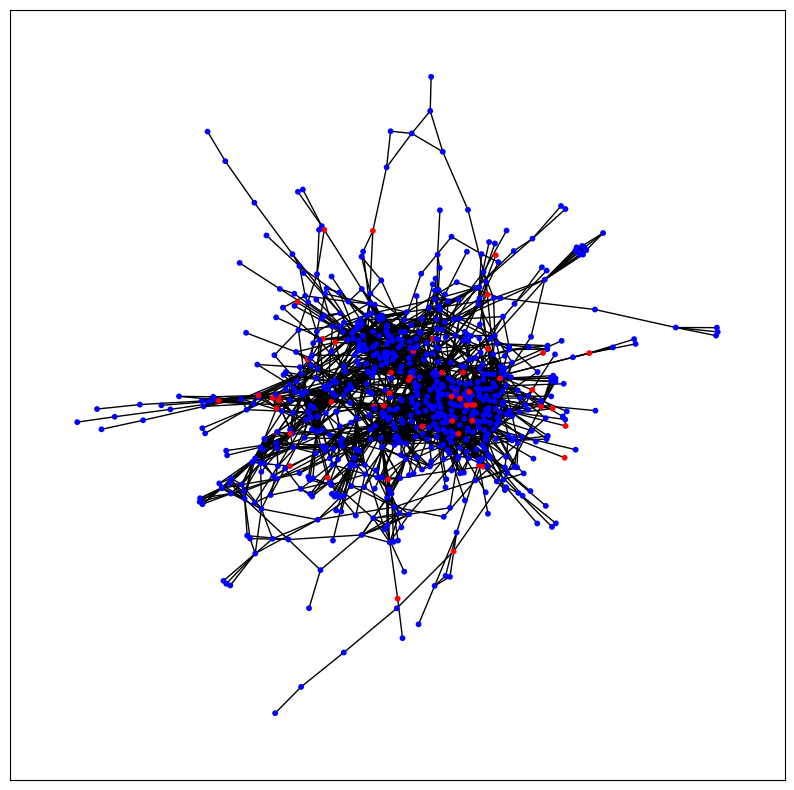

In [4373]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph_simulated.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph_simulated.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

In [4374]:
#Draw a network graph of active angels only
# Create a new DataFrame where each row represents a co-investment

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#df_investment_rel_angel_startup = df_investment_rel_angel_startup.merge(df_angels[['name','status']], left_on='name', right_on='name', how='left')
#only consider active angels
# df_investment_rel_angel_startup_active = df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']

co_investments_active = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_active = co_investments_active[co_investments_active['shareholder_name_mapped_x'] != co_investments_active['shareholder_name_mapped_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_active = co_investments_active.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts_active['shareholder_name_mapped_x'] = co_investment_counts_active['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts_active['shareholder_name_mapped_y'] = co_investment_counts_active['shareholder_name_mapped_y'].str.replace(' ', '_')

co_investment_counts_active.to_csv('co_investment_counts_active.csv', index=False)

#sort by number of co-investments
co_investment_counts_active = co_investment_counts_active.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_active)

            shareholder_name_mapped_x  \
4449                ROMM_Holding_GmbH   
6120                   whiletrue_GmbH   
4443                ROMM_Holding_GmbH   
4806     Roskopf_Ventures_GmbH_Berlin   
4785     Roskopf_Ventures_GmbH_Berlin   
...                               ...   
2200             Gerbig_Ventures_GmbH   
2199             Gerbig_Ventures_GmbH   
2198       Georg_Wilhelm_Dieter_Ammer   
2197          Gaia_Beteiligungen_GmbH   
6145  wrapall_UG_(haftungsbeschränkt)   

                              shareholder_name_mapped_y  CoInvestments  
4449                                     whiletrue_GmbH              6  
6120                                  ROMM_Holding_GmbH              6  
4443                       Roskopf_Ventures_GmbH_Berlin              6  
4806                                  ROMM_Holding_GmbH              6  
4785                                         Alvio_GmbH              5  
...                                                 ...            ..

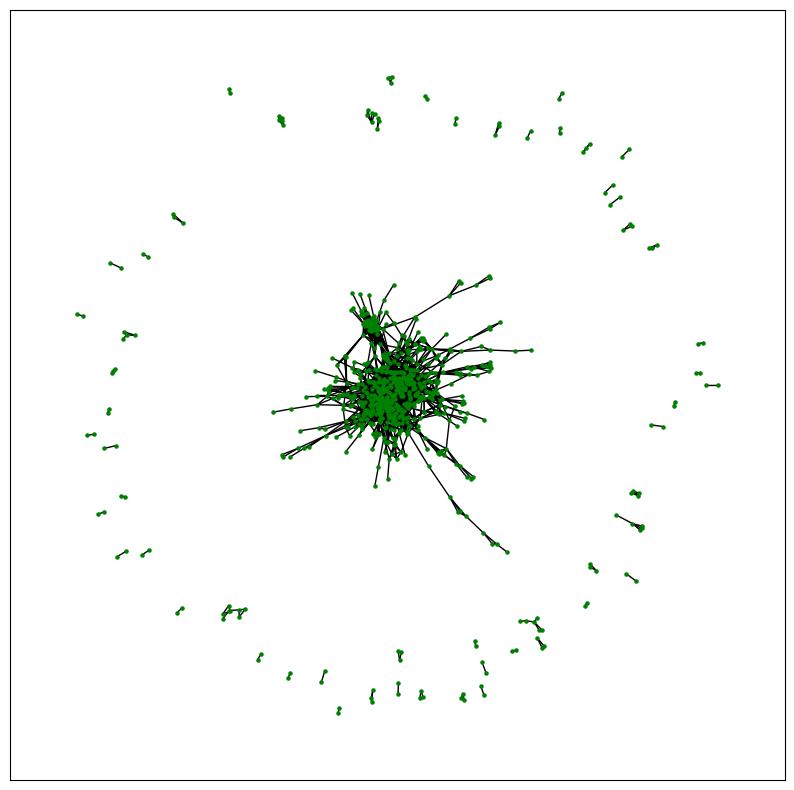

In [4375]:
#plot network graph of active angels only
# Create a graph from the co_investment_counts DataFrame

G_active = nx.from_pandas_edgelist(co_investment_counts_active, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_active)
#make the graph bigger
plt.figure(figsize=(10,10))
# make nodes bigger in the graph
nx.draw_networkx(G_active, pos, with_labels=False, node_size=5, edge_color='black', node_color='green')

#Save graph as png
plt.savefig('graphs/Active Angels Network Graph.png')

## Detecting communities - 4



In [4376]:
from cdlib import algorithms
import networkx as nx
import igraph as ig

In [4377]:
# Was nutzen wir (angelehnt an bubna, aber deren walk trap ausgetaischt mit apparently more robus leiden algorithmus) considered
# - Leiden (von louvain zu Leiden)
# - minimum 5 community members
# - diameter of the community not larger than 1/4 of the diameter of the largest connected subgraph

#Community detection, where we remove all communitiues that are only composed of less than 5 nodes or which have a diameter larger than 1/4 of the network diameter
from cdlib import algorithms
# Create a networkx graph (replace this with your graph)
def detectCommunities(G, method):
    # Apply the Walktrap algorithm to the graph
    if method == 'walktrap':
        coms = algorithms.walktrap(G)
    if method == 'louvain':
        coms = algorithms.louvain(G)
    if method == 'leiden':
        coms = algorithms.leiden(G)
    if method == 'infomap':
        coms = algorithms.infomap(G)
    print(f"We are using the {method} algorithm to detect communities\n")

    print("The network has "+ str(G.number_of_nodes())+" nodes\n")
    print("We detected "+str(len(coms.communities))+' communities\n')

    print("The communities have those sizes respectively: \n")
    print([len(community) for community in coms.communities]) # print sizes of all remaining communities
    #remove all smaller than 5
    largest_cc = max(nx.connected_components(G), key=len)

    # Generate the subgraph of G consisting only of this component
    subgraph = G.subgraph(largest_cc)

    # Calculate and print the diameter of this subgraph
    network_diameter = nx.diameter(subgraph)
    # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
    coms.communities = [community for community in coms.communities if nx.diameter(G.subgraph(community)) <= network_diameter /4]
    
    coms.communities = [community for community in coms.communities if len(community) >4]
    # #remove communities larger than 25
    # coms.communities = [community for community in coms.communities if len(community) < 25]
    print("After removing all with less than 5 community members we have "+str(len(coms.communities))+" communities left. \n")
    print(coms.communities)
    return coms.communities


def comparison(G):
    communities_walktrap = detectCommunities(G,'walktrap')
    communities_louvain = detectCommunities(G,'louvain')
    communities_leiden = detectCommunities(G,'leiden')
    communities_infomap = detectCommunities(G,'infomap')

    # Create df that compares the number of communities across the different methods
    df_community_comparison = pd.DataFrame(columns=("method","number_of_communities"))
    df_community_comparison.loc[0] = ["walktrap", len(communities_walktrap)]
    df_community_comparison.loc[1] = ["louvain", len(communities_louvain)]
    df_community_comparison.loc[2] = ["leiden", len(communities_leiden)]
    df_community_comparison.loc[3] = ["infomap", len(communities_infomap)]
    return df_community_comparison

# comparison_g_active = comparison(G_active)
# comparison_g_simulated = comparison(G_simulated)

# #Same thing for simulated data

# # Create a networkx graph (replace this with your graph)
# print(comparison_g_active)
# print(comparison_g_simulated)


Community 1: Size 4
Lukasz_Marek_Radomski
BHB_Beteiligungsgesellschaft_mbH
Sirko_Frank_Pelzl
Agata_Chudzinska

Community 2: Size 4
FRENKEN_Enterprises_GMbH
SG_Beteiligungs_UG_(haftungsbeschränkt)
Fermat_Beteiligungs_Unternehmergesellschaft_(haftungsbeschränkt)
AL_Holding_GmbH

Community 3: Size 8
Aelius_Ventures_GmbH
Marcel_Kubli
FFM_Ventures_UG_(haftungsbeschränkt)
Richmond_&_Barnes_GmbH_mit_Sitz_in_München
JAB_Ventures_GmbH
Meles_Ventures_UG_(haftungsbeschränkt)
EP_Ventures_GmbH
Tengri_Ventures_UG_(haftungsbeschränkt)

Community 4: Size 18
Schönburg,_Benjamin
Magic_Asset_Management_UG_(haftungsbeschränkt)
Knorke_Ventures_UG_(haftungsbeschränkt)
Force_Ventures_AG
BRWY_Capital_GmbH
Kelly_Neal_Ford
Max_Bauermeister
Koehler_Investment_Holding_GmbH
PhiSi_Invest_UG_(haftungsbeschränkt)
Jacobo_Invest_GmbH
Henkensiefken,_David
Jan_Saputra_UG_(haftungsbeschränkt)
ice_capital_UG_(haftungsbeschränkt)
Guntram_Friede
Nextinvest_UG_(haftungsbeschränkt)
Bora_Kirkali
liventura_GmbH
Rabinowitsch,_Ben

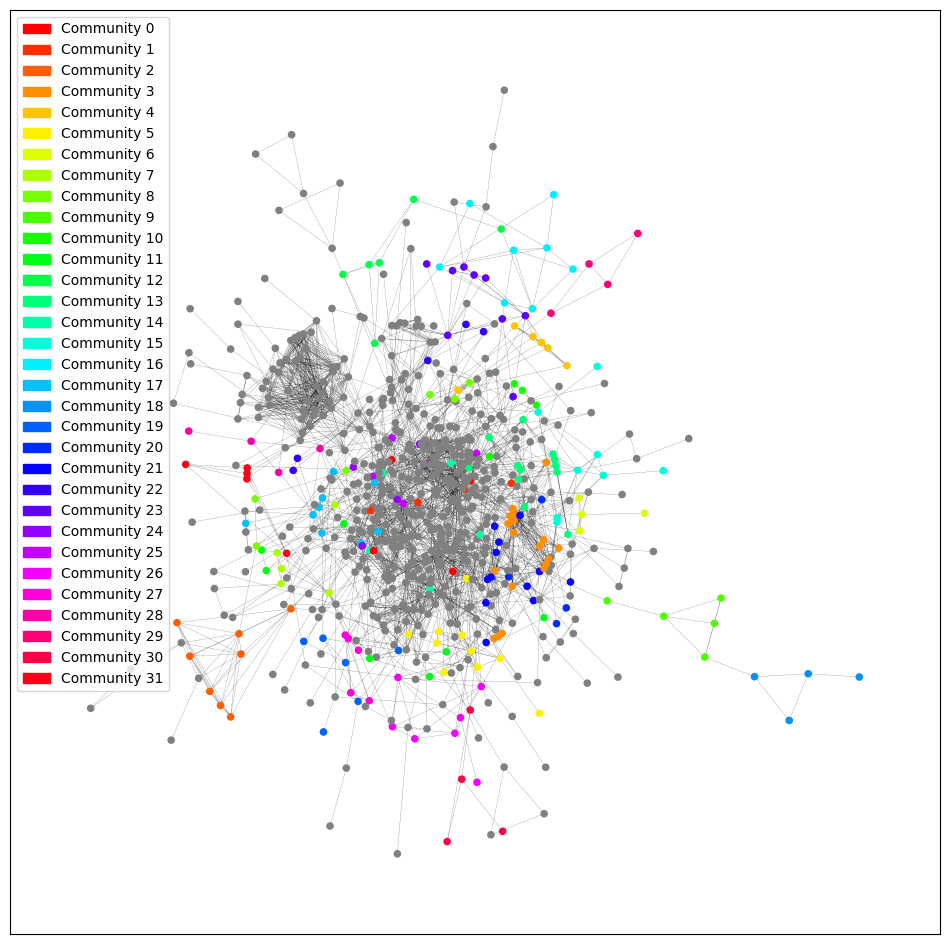

In [4461]:
df=co_investment_counts_active
# Create a list of vertices with unique names
vertices = list(set(df['shareholder_name_mapped_x']).union(set(df['shareholder_name_mapped_y'])))

# Create a graph with those vertices
G = ig.Graph()
G.add_vertices(vertices)

# Add edges based on the DataFrame, lookup the index for each vertex name
for idx, row in df.iterrows():
    G.add_edge(row['shareholder_name_mapped_x'], row['shareholder_name_mapped_y'], weight=row['CoInvestments'])

# Perform the Walktrap community detection algorithm
dendrogram = G.community_walktrap(weights="weight")
clusters = dendrogram.as_clustering()

# Now, we need to filter out communities with fewer than 5 members and with a large diameter
# Get the largest connected component
largest_cc = G.subgraph(max(G.clusters(), key=len))
network_diameter = largest_cc.diameter(directed=False, weights="weight")

# Filter communities
filtered_communities = [community for community in clusters if len(community) >= 4 and G.subgraph(community).diameter(directed=False, weights="weight") <= network_diameter / 4]

# Print the filtered communities
for i, community in enumerate(filtered_communities):
    print(f"Community {i+1}: Size {len(community)}")
    for vertex_id in community:
        print(G.vs[vertex_id]['name'])
    print()  # Add a newline for readability

len(filtered_communities)
networkx_graph = convert_igraph_to_networkx(G)

drawCommunities(networkx_graph, filtered_communities)

In [4459]:
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as patches
import numpy as np

def draw_communities_igraph(G, communities):
    # Create a palette of unique colors, similar to the one used in matplotlib
    palette = ig.RainbowPalette(n=len(communities))
    
    # Assign a unique color to each community
    community_colors = {node: palette.get(i) for i, community in enumerate(communities) for node in community}
    
    # Assign colors to vertices in G
    vertex_colors = [community_colors.get(node.index, 'grey') for node in G.vs]
    
    # Plot the graph
    visual_style = {}
    visual_style["vertex_size"] = 20
    visual_style["vertex_color"] = vertex_colors
    visual_style["edge_width"] = 0.1
    visual_style["edge_color"] = "grey"
    visual_style["layout"] = G.layout_kamada_kawai()
    visual_style["bbox"] = (600, 600)
    visual_style["margin"] = 20
    
    # Plot the graph with the vertex colors based on their community
    ig.plot(G, **visual_style)

    # Create a legend
    plt.figure(figsize=(8, 2))
    patches_list = [patches.Patch(color=ig.color_to_html(palette.get(i)), label=f'Community {i}') for i, _ in enumerate(communities)]
    plt.legend(handles=patches_list, loc='center', ncol=len(communities))
    plt.axis('off')
    plt.show()

import networkx as nx
from igraph import Graph as IGraph

def convert_igraph_to_networkx(igraph_graph):
    # Create a new NetworkX graph from the igraph graph
    networkx_graph = nx.Graph()
    
    # Add nodes and attributes to the NetworkX graph
    for vertex in igraph_graph.vs:
        networkx_graph.add_node(vertex.index, **vertex.attributes())
    
    # Add edges and attributes to the NetworkX graph
    for edge in igraph_graph.es:
        networkx_graph.add_edge(edge.source, edge.target, **edge.attributes())
    
    return networkx_graph

# Assuming 'igraph_graph' is your igraph Graph object



We are using the infomap algorithm to detect communities

The network has 606 nodes

We detected 59 communities

The communities have those sizes respectively: 

[53, 30, 22, 19, 19, 18, 17, 15, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 8, 8, 7, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2]


After removing all with less than 5 community members we have 27 communities left. 

[['ROMM_Holding_GmbH', 'whiletrue_GmbH', 'Roskopf_Ventures_GmbH_Berlin', 'Alvio_GmbH', 'PK_Projects_GmbH', 'Oyfri_GmbH', 'Michael_Schrezenmaier', 'Mercutio_GmbH_Berlin', 'NP_Projects_GmbH', 'S.W._Projects_GmbH', 'huesmann_Punkt_GmbH', 'OMA_Ventures_GmbH', 'Rieke_Ventures_GmbH', 'J._B._Projects_GmbH', 'Markus_Winter', 'Pasame_XingFu_UG_(haftungsbeschränkt)_Berlin', 'jvh-ventures_GmbH', 'Blackbird_Internet_UG_(haftungsbeschränkt)', 'Dirk_Radzinski', 'Micha_Hernandez_van_Leuffen', 'Janoodle_GmbH', 'asteros_ventures_GmbH', 'Minec_Holding_UG_(haftungsbeschränkt)', 'Cadence_Wealth_Capital_GmbH', 'Pink_Capital_GmbH', 'EBCW_GmbH', 'Osorno_Capital_GmbH', 'Behantivo_UG_(haftungsbeschränkt)', 'HR_Pioneers_Beteiligungs_GmbH', 'Sundowner_Ventures_GmbH'], ['Renner_Ventures_&_Philanthropies_GmbH', 'Benjamin_Günther_Invest_GmbH', 'MJM_Investments', 'Sebastian_Schuon_Investments_GmbH', 'Renner_Ventures_UG_(haftungsbesc

{'Marcel_Kubli': 0, 'Meles_Ventures_UG_(haftungsbeschränkt)': 0, 'MMM_Investment_GmbH': 0, 'Aelius_Ventures_GmbH': 0, 'McHaemmerle_Holding_UG_(haftungsbeschränkt)': 0, 'Christian_Peters': 0, 'JAB_Ventures_GmbH': 0, 'FFM_Ventures_UG_(haftungsbeschränkt)': 0, 'Benjamin_Thomsen': 0, 'Agata_Chudzinska': 0, 'Maik_Gerwig': 0, 'Palacin_Holding_GmbH': 0, 'Lake_Ammer_Ventures_GmbH': 0, 'Kaiser,_Thomas': 0, 'Hope_Holding_GmbH': 0, 'DnA_Ventures_GmbH': 0, 'Yixin_Zhang_Ventures_UG_(haftungsbeschränkt)': 0, 'Tengri_Ventures_UG_(haftungsbeschränkt)': 0, 'Decisive_Monkey_Ventures_GmbH': 0, 'Florian_Stephan_Kraus': 0, 'Merk_Ventures_UG_(haftungbeschränkt)': 0, 'VISPIRON_GmbH': 0, 'Kapsalis_Ventures_UG_(haftungsbeschränkt)': 0, 'J_Collect_GmbH': 0, 'Bolz_Capital_UG_(haftungsbeschränkt)': 1, 'MAYD_Group_Trust_UG_(haftungsbeschränkt)_AG_Charlottenburg': 1, 'MTec_Holding_GmbH': 1, 'METROPOL_Invest_GmbH': 1, 'Leander_Christofides': 1, 'NEON_Labs_UG_(haftungsbeschränkt)': 1, 'Thomas_Kiderlen': 1, 'Witoliman

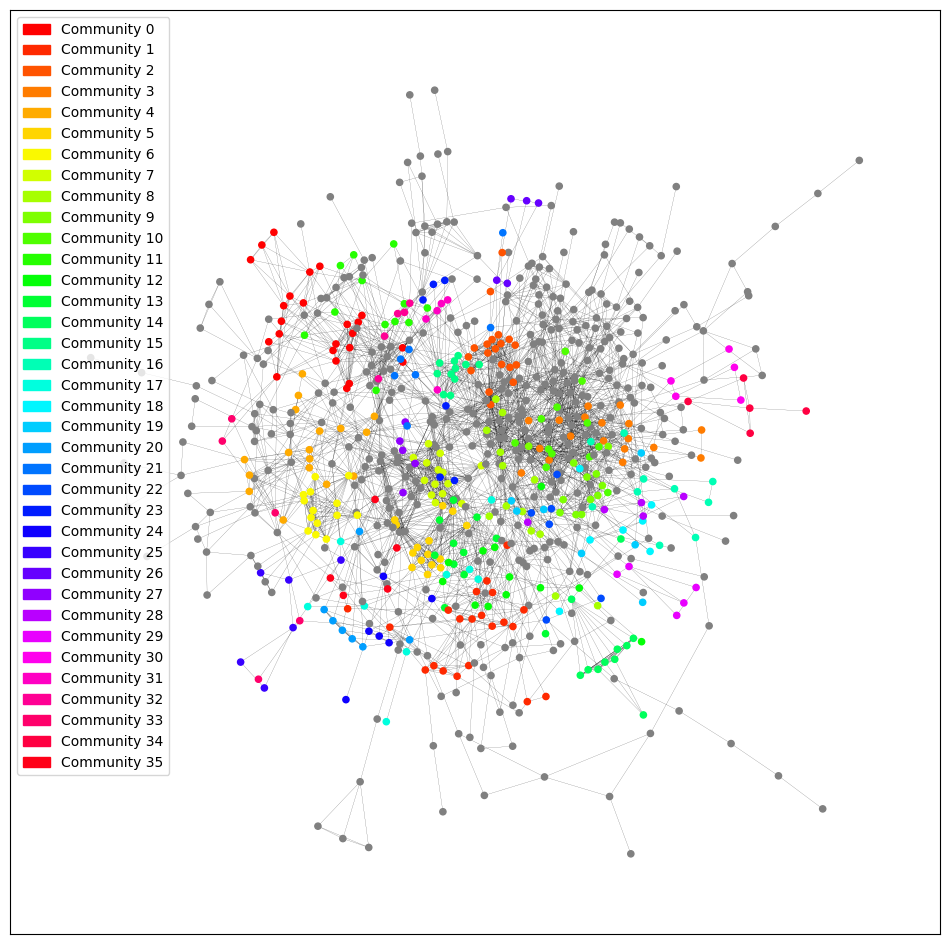

In [4378]:
#get largest subgraph of G_active
largest_cc_active = max(nx.connected_components(G_active), key=len)
subgraph_active = G_active.subgraph(largest_cc_active)

#get largest subgraph of G_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def drawCommunities(G, communities):
    # Create a dictionary of community mappings
    community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}
    print(community_mapping)
    # Generate unique colors for each community
    colors = plt.cm.hsv(np.linspace(0, 1, len(communities)))
    community_colors = dict(zip(range(len(communities)), colors))

    # Create a list of node colors based on their community, if the are not in the list make it grey
    node_colors = [community_colors.get(community_mapping.get(node), 'grey') for node in G.nodes()]
    
    # Draw the graph
    pos = nx.kamada_kawai_layout(G, scale=2)  # Using Kamada-Kawai layout with increased scale
    plt.figure(figsize=(12,12))  # Increase figure size
    nx.draw_networkx(G, pos, with_labels=False, node_size=20, width=0.1, edge_color='black', node_color=node_colors)
    #add a legend for the communities
    # Create a legend
    patch_list = [patches.Patch(color=color, label=f'Community {community_id}') for community_id, color in community_colors.items()]
    plt.legend(handles=patch_list, loc='upper left')



    # Save as PNG
    plt.savefig('graphs/Network_graph_with_community_mapping.png')
    
    # Display the plot
    plt.show()

# Example usage, make sure detectCommunities function is defined and works correctly
communities=detectCommunities(subgraph_active, 'infomap')
print(f"communities: {communities}")
communities_simulated = detectCommunities(subgraph_simulated, 'infomap')

# #get subset where communities are saller than 25
# communities = [community for community in communities if len(community) < 25]
# communities_simulated = [community for community in communities_simulated if len(community) < 25]

drawCommunities(subgraph_active, communities)
drawCommunities(subgraph_simulated, communities_simulated)

In [4448]:
import community as community_louvain
# Detect the top-level communities using the Louvain method
partition = community_louvain.best_partition(subgraph_active, weight='weight')

# Convert the partition to a list of communities
communities = {}
for node, community in partition.items():
    communities.setdefault(community, []).append(node)

# Print the communities
for community, nodes in communities.items():
    print(f"Community {community}: {nodes}")


#count how many communities have more than 4 members
communities = [community for community in communities.values() if len(community) > 4]

# Eliminate communities where the diameter is larger than network diameter/4
largest_cc = max(nx.connected_components(G_active), key=len)
subgraph = G_active.subgraph(largest_cc)
network_diameter = nx.diameter(subgraph)
communities = [community for community in communities if nx.diameter(G_active.subgraph(community)) <= network_diameter / 4]

print(f"Number of communities with more than 4 members: {len(communities)}")

# Draw the communities
drawCommunities(subgraph_active, communities)



Community 0: ['ROMM_Holding_GmbH', 'whiletrue_GmbH', 'Roskopf_Ventures_GmbH_Berlin', 'Alvio_GmbH', 'PK_Projects_GmbH', 'Oyfri_GmbH', 'Michael_Schrezenmaier', 'Mercutio_GmbH_Berlin', 'NP_Projects_GmbH', 'S.W._Projects_GmbH', 'huesmann_Punkt_GmbH', 'OMA_Ventures_GmbH', 'J._B._Projects_GmbH', 'Markus_Winter', 'Felix_Jahn_Beteiligungen_GmbH', 'Pasame_XingFu_UG_(haftungsbeschränkt)_Berlin', 'jvh-ventures_GmbH', 'Blackbird_Internet_UG_(haftungsbeschränkt)', 'Prof._Dr._Gunter_Dueck', 'Dirk_Radzinski', 'Micha_Hernandez_van_Leuffen', 'Janoodle_GmbH', 'asteros_ventures_GmbH', 'Minec_Holding_UG_(haftungsbeschränkt)', 'Inventures_GmbH', 'Cadence_Wealth_Capital_GmbH', 'Markus_Bauer', 'FEP_Frankfurt_Equitypartner_GmbH', 'Gerhard_Müller', 'Pink_Capital_GmbH', 'EBCW_GmbH', 'Osorno_Capital_GmbH', 'Behantivo_UG_(haftungsbeschränkt)', 'THOR_Ventures_Berlin_GmbH', 'HR_Pioneers_Beteiligungs_GmbH', 'Sundowner_Ventures_GmbH']
Community 1: ['Oliver_Diezmann', 'DIRK_BREITBACH', 'Sidus_GmbH', 'Matthias_Urlichs'

Number of communities with more than 4 members: 1
{'FFM_Ventures_UG_(haftungsbeschränkt)': 0, 'EP_Ventures_GmbH': 0, 'JAB_Ventures_GmbH': 0, 'Marcel_Kubli': 0, 'Meles_Ventures_UG_(haftungsbeschränkt)': 0, 'Tengri_Ventures_UG_(haftungsbeschränkt)': 0, 'Richmond_&_Barnes_GmbH_mit_Sitz_in_München': 0, 'Aelius_Ventures_GmbH': 0, 'Karl-Heinz_Flöther': 0, 'transloid_GmbH': 0, 'RM_Beteiligungs-GmbH': 0, 'Maximilian_Wagner_GmbH': 0, 'Rickmann_Ventures_UG_(haftungsbeschränkt)': 0}


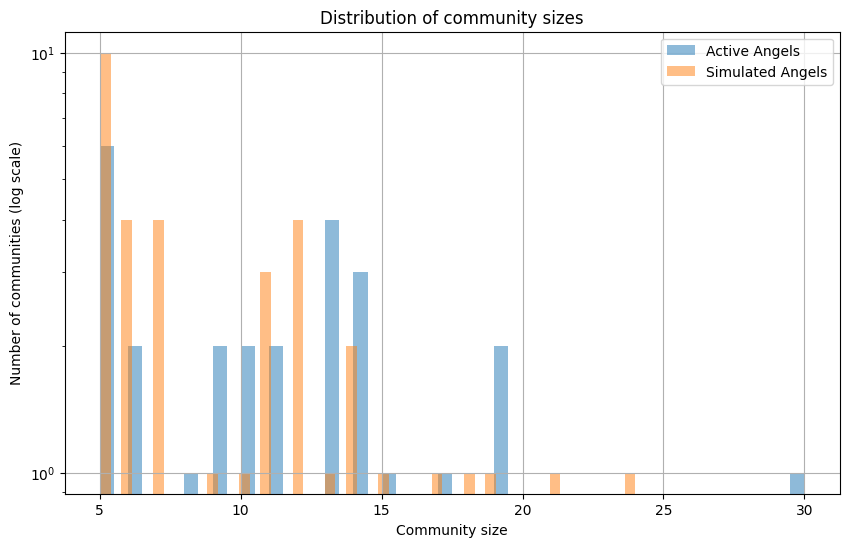

In [4379]:
#plot the distribution of the how often a certain community size occurs
#count how often a certain community size occurs
community_sizes = [len(community) for community in communities]
community_sizes_simulated = [len(community) for community in communities_simulated]


# Plot the distribution of community sizes
plt.figure(figsize=(10, 6))
plt.hist(community_sizes, bins=50, log=True, alpha=0.5, label='Active Angels')
plt.hist(community_sizes_simulated, bins=50, log=True, alpha=0.5, label='Simulated Angels')
plt.title('Distribution of community sizes')
plt.xlabel('Community size')
plt.ylabel('Number of communities (log scale)')
plt.legend()
plt.grid(True)
# Save as PNG
plt.savefig('graphs/Distribution of community sizes.png')
plt.show()


In [4380]:
#for each shareholder map into the df_angels_active the community they belong to
# Create a dictionary of community mappings
community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}

community_mapping_simulated = {node: community_id for community_id, community in enumerate(communities_simulated) for node in community}
# Map the community of each node to the df_angels_active DataFrame

df_angels_active['community'] = df_angels_active['shareholder_name'].map(community_mapping)
#fill nodes who are part of subgraph with -1 as they are not part of any community, fill everything thats still Nan with "not core network"
for node in subgraph_active.nodes():
    if node not in community_mapping:
        community_mapping[node] = -1
df_angels_active['community'] = df_angels_active['shareholder_name'].map(community_mapping)

df_angels_active['community'] = df_angels_active['community'].fillna(100).astype(int)
df_angels_active['community_simulated'] = df_angels_active['shareholder_name'].map(community_mapping_simulated)
df_angels_active['community_simulated'] = df_angels_active['community_simulated'].fillna(-1).astype(int)
df_angels_active

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19805                                 ALLUTI GmbH         9421.0   
19816                                   Beam GmbH         3104.0   
19839                          MM Investment GmbH         6459.0   
19842  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19867                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19805  2024-03-10 17:37:24.528696+00                      2            angel   
19816  2024-03-10 17:37:21.332579+00                      4            angel   
19839  2024-03-10 17:37:22.963246+00                      2            angel   
19842  2024-03-10 17:37:25.834675+00                      2            angel   
19867  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B             9.035000   
51       HRB 157901                     B Berlin             1.520000   
70              NaN                          NaN            21.375000   
88        HRB 17860                      Krefeld            33.333300   
90      FN 411158 w          Firmenbuch von Wien             0.486050   
...             ...                          ...                  ...   
19805        210537                 M\u00fcnchen             2.636859   
19816  HRB 194610 B               Charlottenburg            19.595800   
19839    HRB 216984               Charlottenburg            30.000000   
19842  HRB 151510 B               Charlottenburg             1.226000   
19867   HRB 181720B               Charlottenburg             8.727200   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19805             136.0  {"shareholder_purpose": "Verwaltung eigenen Ve...   
19816             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19839             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19842             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19867             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... munich_simulated hamburg_simulated frankfurt_simulated  \
23     ...                0                 0                   0   
51     ...                0                 0                   0   
70     ...                0                 0                   0   
88     ...                0                 0                   0   
90     ...                0                 0                   0   
...    ...             

In [4381]:
import pandas as pd

# Definition der Funktion zur Berechnung des HHI
def gender_hhi(df):
    # Zählen der Vorkommen jedes Geschlechts
    gender_counts = df['gender'].value_counts()

    
    
    #get only male and female


    gender_counts = gender_counts.loc[gender_counts.index.isin(['male', 'female'])]

    # Quadrieren der gezählten Häufigkeiten
    squared_counts = gender_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

# Erstellen eines DataFrames mit einer Spalte 'gender'
df = pd.DataFrame({
    'gender': ['male', 'female', 'female', 'male', 'non-binary', 'female', 'male']
})

# Berechnen des HHI für den Beispiel-DataFrame
hhi = gender_hhi(df)
print(f'Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: {hhi}')

Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: 0.3673469387755102


In [4382]:
#define function to calculate region HHI for communities
def region_hhi(df):
    
    # Zählen der Vorkommen jeder Region
    region_counts = df['region_mapping'].value_counts()
    #drop rows other
    region_counts = region_counts.drop('other', errors='ignore')
    # Quadrieren der gezählten Häufigkeiten
    squared_counts = region_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

In [4383]:
# columns for community comparison
community_columns = ["community","number_of_members","average_age","sd_eigenvector_centrality","sd_total_participation","sd_number_of_investments","sd_age","sd_industry_hhi","sd_region_hhi","female_ratio","region_hhi_value","average_eigenvector_centrality",'average_number_of_investments']

In [4384]:
df_angels_active['eigenvector_centrality']

23       5.548545e-05
51       1.029470e-04
70                NaN
88       8.539818e-06
90       1.294792e-03
             ...     
19805    8.851919e-06
19816             NaN
19839    1.393237e-06
19842    1.398034e-04
19867    1.297066e-39
Name: eigenvector_centrality, Length: 903, dtype: float64

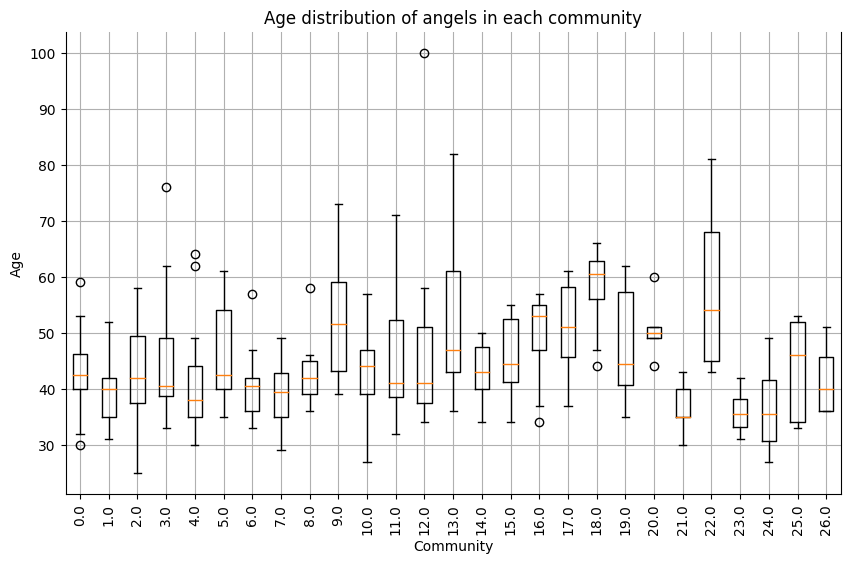

community  number_of_members  average_age  sd_eigenvector_centrality  \
0         0.0               30.0    42.366667               2.372997e-04   
1         1.0               19.0    39.421053               2.602273e-04   
2         2.0               19.0    43.263158               6.924521e-05   
3         3.0               17.0    44.750000               1.553486e-03   
4         4.0               15.0    41.846154               1.100904e-04   
5         5.0               14.0    46.000000               1.847249e-03   
6         6.0               14.0    40.714286               1.021297e-04   
7         7.0               14.0    39.142857               1.212795e-03   
8         8.0               13.0    43.153846               2.139652e-04   
9         9.0               13.0    52.833333               1.489627e-04   
10       10.0               13.0    43.923077               8.838407e-05   
11       11.0               13.0    46.500000               1.210992e-05   
12       12.0               11.0    48.000000               1.190900e-03   
13       13.0               11.0    52.818182               9.928335e-04   
14       14.0               10.0    43.300000               6.934893e-05   
15       15.0               10.0    45.400000               9.375237e-04   
16       16.0                9.0    48.777778               1.684893e-04   
17       17.0                9.0    50.750000               7.160614e-05   
18       18.0                8.0    58.000000               2.013040e-06   
19       19.0                6.0    47.833333               2.874284e-06   
20       20.0                6.0    50.800000               5.472433e-05   
21       21.0                5.0    36.600000               1.503080e-05   
22       22.0                5.0    58.200000               7.144479e-05   
23       23.0                5.0    36.000000               1.443079e-05   
24       24.0                5.0    36.750000               5.883555e-05   
25       25.0                5.0    43.600000               5.530678e-07   
26       26.0                5.0    41.750000               5.103741e-05   

    sd_total_participation  sd_number_of_investments     sd_age  \
0                11.033640                  1.755451   6.233853   
1                 9.394603                  1.781976   5.367762   
2                 8.573399                  2.583121   8.992850   
3                 8.920058                  2.443479  10.914822   
4                12.365729                  0.457738  10.542344   
5                 6.304782                  0.646206   9.446204   
6                 6.164238                  0.468807   6.132242   
7                 8.151073                  1.672335   5.907715   
8                 4.632135                  3.491749   5.550468   
9                 6.434904                  1.441153  11.823192   
10                6.972876                  0.877058   8.450459   
11               11.552597                  0.630425  12.908771   
12                7.415149                  1.375103  18.878559   
13               15.301819                  1.035725  14.176164   
14               27.318065                  0.632456   5.034327   
15                6.476355                  1.251666   7.574812   
16               28.619734                  1.536591   8.318320   
17                6.326028                  0.500000   8.647873   
18                2.141839                  1.457738   8.106435   
19               15.895889                  0.816497  11.196726   
20                1.779755                  1.211060   5.805170   
21                9.867808                  0.447214   5.029911   
22                8.727834                  0.447214  16.115210   
23                3.224854                  0.000000   4.690416   
24               17.942844                  0.447214   9.535023   
25                6.328295                  1.341641   9.607289   
26               33.028855                  0.000000   7.228416   

In [4385]:
#build df_communities_active
df_communities_active = pd.DataFrame(columns=community_columns)
#drip rows with nan from commnities


# Loop through each community
for community_id, community in enumerate(communities):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    
    #Calculate SD of age
    sd_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].std()
    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].mean()
    sd_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].std()
   
    
    # Calculate the average eigenvector centrality of the community
    average_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].mean()
    sd_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].std()
    # Calculate the number of members in the community
    number_of_members = df_angels_active[df_angels_active['community'] == community_id].shape[0]
    temp= df_angels_active[df_angels_active['community'] == community_id]
   
    # Calculate the percentage of men
    if len(temp) > 0:
        female_ratio = len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')])/len(temp)
    else:
        female_ratio = 0
    #Caluculate region HHI
    region_hhi_value = region_hhi(temp)
 
    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community'] == community_id]['industry_HHI'].std()
    
    #Calculate sd of region hhi
    sd_region_hhi = df_angels_active[df_angels_active['community'] == community_id]['region_HHI'].std()
    # Calculate female ratio
    # female_ratio = len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')])/len(community)
    # Add the community to the DataFrame
    df_communities_active.loc[community_id] = [community_id, number_of_members, average_age,sd_eigenvector_centrality, sd_total_participation,sd_number_of_investments ,sd_age,sd_industry_hhi,sd_region_hhi,female_ratio,region_hhi_value,average_eigenvector_centrality,average_number_of_investments]

df_communities_active

#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_active['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_active['community'])
plt.title('Age distribution of angels in each community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community.png')
plt.show()

#calc average_sd_age
average_sd_age_active = df_communities_active['average_age'].mean()
#drop rows with nan
df_communities_active = df_communities_active.dropna(subset=['sd_eigenvector_centrality'])
df_communities_active

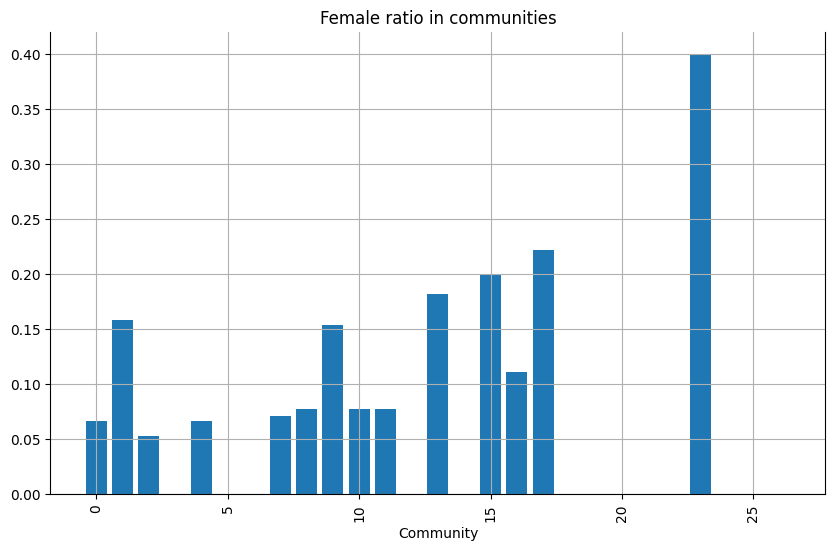

In [4386]:
#plot gender hhi
plt.figure(figsize=(10, 6))
plt.bar(df_communities_active['community'], df_communities_active['female_ratio'])
plt.title('Female ratio in communities')
plt.xlabel('Community')
plt.ylabel
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig
plt.show()


In [4387]:
#return subset of df_angels_active where community is 25
df_angels_active[df_angels_active['community'] == 25]

shareholder_name_old shareholder_id  \
855                                  I!see GmbH         2213.0   
6337                  BMC Asset Management GmbH        21223.0   
8150   Sunrise Ventures UG (haftungsbeschränkt)        20064.0   
8196                          Blom Capital GmbH        22856.0   
12367                             Thomas Müller        10377.0   

                          created_at  number_of_investments shareholder_type  \
855    2024-03-10 17:37:20.561047+00                      5            angel   
6337   2024-03-10 17:37:30.929372+00                      2            angel   
8150   2024-03-10 17:37:30.929372+00                      2            angel   
8196   2024-03-10 17:37:33.369539+00                      2            angel   
12367  2024-03-10 17:37:24.528696+00                      2            angel   

      register_id register_court  total_participation  register_mapping  \
855     HRB 21453          Essen                4.492             507.0   
6337    HRB 93995           Köln               11.420             568.0   
8150     HRB 9988           Hamm                1.350             500.0   
8196    HRB 81720           Köln                9.465             568.0   
12367         NaN            NaN               17.680               NaN   

                                     shareholder_purpose  ...  \
855    {"shareholder_purpose": "Die Beteiligung an di...  ...   
6337   {"shareholder_purpose": "die Erhebung, Analyse...  ...   
8150   {"shareholder_purpose": "Gr\u00fcndung, Erwerb...  ...   
8196   {"shareholder_purpose": "die Verwaltung eigene...  ...   
12367                                                NaN  ...   

      munich_simulated hamburg_simulated frankfurt_simulated  \
855                  0                 0                   0   
6337                 0                 0                   0   
8150                 0                 0                   0   
8196                 0                 0                   0   
12367                2                 0                   0   

      stuttgart_simulated other_simulated cologne_simulated leipzig_simulated  \
855                     0               0                 5                 0   
6337                    0               0                 2                 0   
8150                    0               0                 0                 0   
8196                    0               0                 2                 0   
12367                   0               0                 0                 0   

      industry_HHI_simulated region_HHI_simulated survival_rate  
855                     0.36                  1.0           0.6  
6337                    0.50                  1.0           1.0  
8150                    0.50                  1.0           0.5  
8196                    0.50                  1.0           1.0  
12367                   1.00                  0.5           0.5  

[5 rows x 90 columns]

In [4388]:
#descriptive stats on communities
#create df_community_descriptive
df_community_descriptive = pd.DataFrame(columns=["variable_name","value"])
#add average number of members per community
average_number_of_members = df_communities_active['number_of_members'].mean()
df_community_descriptive.loc[0] = ["average_number_of_members", average_number_of_members]

#add average age per community
average_age = df_communities_active['average_age'].mean()
df_community_descriptive.loc[1] = ["average_age", average_age]

#add average number of investments
average_number_of_investments = df_communities_active['average_number_of_investments'].mean()
df_community_descriptive.loc[2] = ["average_number_of_investments", average_number_of_investments]

df_community_descriptive

variable_name      value
0      average_number_of_members  11.259259
1                    average_age  45.277545
2  average_number_of_investments   2.722400

In [4389]:
#create df_angels_active_simulated
#add_columns for each region_simulated berlin_simulated, munich_simulated, hamburg_simulated, franfurt_simulated, stuttgart_simulated, other_simulated, cologne_simulated, leipzig_simulated
df_angels_active['berlin_simulated'] = 0
df_angels_active['munich_simulated'] = 0
df_angels_active['hamburg_simulated'] = 0
df_angels_active['frankfurt_simulated'] = 0
df_angels_active['stuttgart_simulated'] = 0
df_angels_active['other_simulated'] = 0
df_angels_active['cologne_simulated'] = 0
df_angels_active['leipzig_simulated'] = 0



#count for every shareholder how many startups they are involved in per location
#create a df that counts the number of startups per shareholder per location
df_investment_rel_angel_startup_simulated['count'] = 1
df_shareholder_relations_pivot_simulated = df_investment_rel_angel_startup_simulated.pivot_table(index='angel', columns='region', values='count', aggfunc='sum')
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.fillna(0)
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.reset_index()
df_shareholder_relations_pivot_simulated

#now map the values from df_shareholder_relations_pivot_simulated to df_angels_active

for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    berlin_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['berlin']
    munich_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['munich']
    stuttgart_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['stuttgart']
    leipzig_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['leipzig']
    cologne_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['cologne']
    franfurt_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['frankfurt']
    hamburg_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['hamburg']
    other_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['other']
    # international = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['international']

    if len(berlin_simulated) > 0:
        df_angels_active.at[index, 'berlin_simulated'] = berlin_simulated.values[0]
    if len(munich_simulated) > 0:
        df_angels_active.at[index, 'munich_simulated'] = munich_simulated.values[0]
    if len(stuttgart_simulated) > 0:
        df_angels_active.at[index, 'stuttgart_simulated'] = stuttgart_simulated.values[0]
    if len(leipzig_simulated) > 0:
        df_angels_active.at[index, 'leipzig_simulated'] = leipzig_simulated.values[0]
    if len(cologne_simulated) > 0:
        df_angels_active.at[index, 'cologne_simulated'] = cologne_simulated.values[0]
    if len(franfurt_simulated) > 0:
        df_angels_active.at[index, 'frankfurt_simulated'] = franfurt_simulated.values[0]
    if len(hamburg_simulated) > 0:
        df_angels_active.at[index, 'hamburg_simulated'] = hamburg_simulated.values[0]
    if len(other_simulated) > 0:
        df_angels_active.at[index, 'other_simulated'] = other_simulated.values[0]
    # if len(international) > 0:
    #     df_angels_active.at[index, 'international'] = international.values[0]

df_angels_active


shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19805                                 ALLUTI GmbH         9421.0   
19816                                   Beam GmbH         3104.0   
19839                          MM Investment GmbH         6459.0   
19842  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19867                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19805  2024-03-10 17:37:24.528696+00                      2            angel   
19816  2024-03-10 17:37:21.332579+00                      4            angel   
19839  2024-03-10 17:37:22.963246+00                      2            angel   
19842  2024-03-10 17:37:25.834675+00                      2            angel   
19867  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B             9.035000   
51       HRB 157901                     B Berlin             1.520000   
70              NaN                          NaN            21.375000   
88        HRB 17860                      Krefeld            33.333300   
90      FN 411158 w          Firmenbuch von Wien             0.486050   
...             ...                          ...                  ...   
19805        210537                 M\u00fcnchen             2.636859   
19816  HRB 194610 B               Charlottenburg            19.595800   
19839    HRB 216984               Charlottenburg            30.000000   
19842  HRB 151510 B               Charlottenburg             1.226000   
19867   HRB 181720B               Charlottenburg             8.727200   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19805             136.0  {"shareholder_purpose": "Verwaltung eigenen Ve...   
19816             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19839             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19842             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19867             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... munich_simulated hamburg_simulated frankfurt_simulated  \
23     ...                0                 0                   0   
51     ...                0                 0                   0   
70     ...                0                 0                   0   
88     ...                0                 0                   0   
90     ...                0                 0                   0   
...    ...             

In [4432]:
# Updated list of industries with 'medicine' renamed to 'medicine_biotech'
english_industries = [
    'mobility', 'software', 'food', 'industry', 'staffing', 
    'energy', 'media', 'service', 'construction', 'hardware', 
    'blockchain_crypto', 'gaming', 'medicine_biotech', 'agriculture', 
    'real_estate', 'environmental_technology', 'sports', 'education', 
    'ecommerce', 'finance', 'tourism', 'advertising', 'logistics', 
    'legal_consulting', 'insurance'
]

# Initialize the new columns with 0, using the updated English names
for industry in english_industries:
    df_angels_active[industry] = 0

# Assuming df_shareholder_relations is already defined and has a similar structure
# as shown in your initial code.
# Creating a pivot table to count the startups per shareholder per industry
df_shareholder_relations_pivot = df_investment_rel_angel_startup_simulated.pivot_table(
    index='angel', 
    columns='startup_industry', 
    values='count', 
    aggfunc='sum'
).fillna(0).reset_index()

# Mapping the values from the pivot table to df_angels_active
for index, row in df_angels_active.iterrows():
    shareholder_name_mapped = row['shareholder_name']
    
    # Iterate through each industry to assign the corresponding values
    for industry in english_industries:
        industry_count = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == shareholder_name_mapped].get(industry)
        if industry_count is not None and len(industry_count) > 0:
            df_angels_active.at[index, industry] = industry_count.values[0]
           

# Display the updated df_angels_active DataFrame
df_angels_active

shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19805                                 ALLUTI GmbH         9421.0   
19816                                   Beam GmbH         3104.0   
19839                          MM Investment GmbH         6459.0   
19842  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19867                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19805  2024-03-10 17:37:24.528696+00                      2            angel   
19816  2024-03-10 17:37:21.332579+00                      4            angel   
19839  2024-03-10 17:37:22.963246+00                      2            angel   
19842  2024-03-10 17:37:25.834675+00                      2            angel   
19867  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B             9.035000   
51       HRB 157901                     B Berlin             1.520000   
70              NaN                          NaN            21.375000   
88        HRB 17860                      Krefeld            33.333300   
90      FN 411158 w          Firmenbuch von Wien             0.486050   
...             ...                          ...                  ...   
19805        210537                 M\u00fcnchen             2.636859   
19816  HRB 194610 B               Charlottenburg            19.595800   
19839    HRB 216984               Charlottenburg            30.000000   
19842  HRB 151510 B               Charlottenburg             1.226000   
19867   HRB 181720B               Charlottenburg             8.727200   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19805             136.0  {"shareholder_purpose": "Verwaltung eigenen Ve...   
19816             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19839             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19842             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19867             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... munich_simulated hamburg_simulated frankfurt_simulated  \
23     ...                0                 0                   0   
51     ...                0                 0                   0   
70     ...                0                 0                   0   
88     ...                0                 0                   0   
90     ...                0                 0                   0   
...    ...             

In [4433]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi

#calculate the industry_HHI for each angel based on the industry columns production_trade,technology_digital_services,energy_environment_infrastructure,healthcare,services_consulting
df_angels_active['industry_HHI_simulated'] = df_angels_active[['production_trade','technology_digital_services','energy_environment_infrastructure','healthcare','services_consulting']].apply(calculate_hhi, axis=1)

#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI_simulated'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)

df_angels_active


shareholder_name_old shareholder_id  \
23       Settels Ventures UG (haftungsbeschränkt)         9735.0   
51              GingerCat UG (haftungsbeschränkt)        15457.0   
70                               Benjamin Schwarz          165.0   
88      SH Scheck Holding UG (haftungsbeschränkt)        16760.0   
90                                     8eyes GmbH         6554.0   
...                                           ...            ...   
19805                                 ALLUTI GmbH         9421.0   
19816                                   Beam GmbH         3104.0   
19839                          MM Investment GmbH         6459.0   
19842  F. Friede Ventures UG (haftungsbeschränkt)        11210.0   
19867                 Alpha Beta Beteiligungen UG        11651.0   

                          created_at  number_of_investments shareholder_type  \
23     2024-03-10 17:37:24.528696+00                      2            angel   
51     2024-03-10 17:37:27.447081+00                      2            angel   
70     2024-03-10 17:37:19.751917+00                      2            angel   
88     2024-03-10 17:37:28.253624+00                      2            angel   
90     2024-03-10 17:37:22.963246+00                      2            angel   
...                              ...                    ...              ...   
19805  2024-03-10 17:37:24.528696+00                      2            angel   
19816  2024-03-10 17:37:21.332579+00                      4            angel   
19839  2024-03-10 17:37:22.963246+00                      2            angel   
19842  2024-03-10 17:37:25.834675+00                      2            angel   
19867  2024-03-10 17:37:25.834675+00                      3            angel   

        register_id               register_court  total_participation  \
23              NaN  Charlottenburg HRB 159694 B             9.035000   
51       HRB 157901                     B Berlin             1.520000   
70              NaN                          NaN            21.375000   
88        HRB 17860                      Krefeld            33.333300   
90      FN 411158 w          Firmenbuch von Wien             0.486050   
...             ...                          ...                  ...   
19805        210537                 M\u00fcnchen             2.636859   
19816  HRB 194610 B               Charlottenburg            19.595800   
19839    HRB 216984               Charlottenburg            30.000000   
19842  HRB 151510 B               Charlottenburg             1.226000   
19867   HRB 181720B               Charlottenburg             8.727200   

       register_mapping                                shareholder_purpose  \
23                  NaN                                                NaN   
51                  NaN                                                NaN   
70                  NaN                                                NaN   
88                458.0  {"shareholder_purpose": "Die Verwaltung eigene...   
90                  NaN                      {"shareholder_purpose": null}   
...                 ...                                                ...   
19805             136.0  {"shareholder_purpose": "Verwaltung eigenen Ve...   
19816             217.0  {"shareholder_purpose": "Das Halten, Entwickel...   
19839             217.0  {"shareholder_purpose": "Die Verwaltung eigene...   
19842             217.0  {"shareholder_purpose": "Der Erwerb, die Verwa...   
19867             217.0  {"shareholder_purpose": "Erwerb, Halten, Verwa...   

       ... munich_simulated hamburg_simulated frankfurt_simulated  \
23     ...                0                 0                   0   
51     ...                0                 0                   0   
70     ...                0                 0                   0   
88     ...                0                 0                   0   
90     ...                0                 0                   0   
...    ...             

In [4434]:
# #calculate eigenvector centrality for each angel in simulated graph
# # Create a dictionary of eigenvector centralities
eigenvector_centrality = nx.eigenvector_centrality(G_active)

# # Map the eigenvector centralities to the df_angels_active DataFrame
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(eigenvector_centrality)
# #fill NaN values with 0
# df_angels_active = df_angels_active.fillna(0)
# df_angels_active

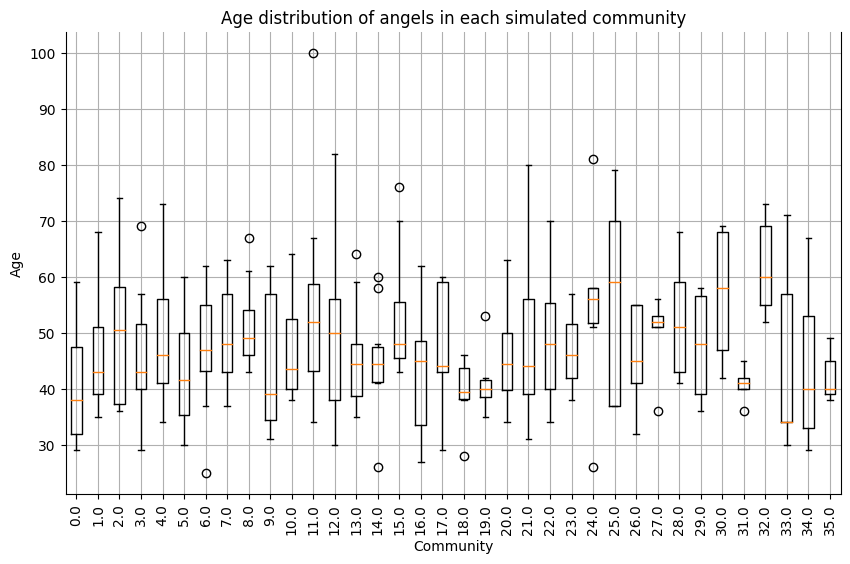

community  number_of_members  average_age  sd_eigenvector_centrality  \
0         0.0               24.0    40.304348               2.727041e-05   
1         1.0               21.0    45.380952               5.934400e-03   
2         2.0               19.0    49.222222               6.410439e-02   
3         3.0               18.0    45.444444               2.772131e-04   
4         4.0               17.0    48.705882               3.393571e-02   
5         5.0               15.0    42.571429               1.514714e-03   
6         6.0               14.0    47.785714               2.492066e-05   
7         7.0               14.0    50.076923               4.597561e-02   
8         8.0               13.0    51.538462               2.320473e-03   
9         9.0               12.0    44.272727               3.144202e-04   
10       10.0               12.0    47.666667               1.146222e-02   
11       11.0               12.0    54.300000               1.338115e-03   
12       12.0               12.0    49.090909               2.744544e-03   
13       13.0               11.0    45.500000               1.522438e-04   
14       14.0               11.0    45.100000               2.396192e-04   
15       15.0               11.0    52.909091               5.338414e-02   
16       16.0               10.0    42.800000               5.857926e-04   
17       17.0                9.0    46.222222               1.352559e-05   
18       18.0                7.0    39.333333               4.034822e-04   
19       19.0                7.0    41.333333               1.074385e-04   
20       20.0                7.0    46.000000               2.612074e-04   
21       21.0                7.0    49.285714               5.872752e-04   
22       22.0                6.0    49.166667               3.132580e-05   
23       23.0                6.0    46.833333               8.770973e-05   
24       24.0                6.0    54.666667               1.340261e-03   
25       25.0                6.0    56.400000               8.692377e-06   
26       26.0                5.0    45.600000               6.896441e-34   
27       27.0                5.0    49.600000               8.783367e-06   
28       28.0                5.0    52.400000               7.647577e-04   
29       29.0                5.0    47.500000               4.989541e-08   
30       30.0                5.0    56.800000               4.918875e-06   
31       31.0                5.0    40.800000               5.992757e-02   
32       32.0                5.0    61.800000               6.760755e-02   
33       33.0                5.0    45.200000               1.621737e-06   
34       34.0                5.0    44.400000               0.000000e+00   
35       35.0                5.0    42.200000               1.888829e-04   

    sd_total_participation  sd_number_of_investments     sd_age  \
0                14.929619                  0.204124   8.379818   
1                13.463881                  0.810643   9.531402   
2                 8.223458                  1.070607  11.507315   
3                17.079339                  2.219933   9.262335   
4                 7.570924                  0.242536  10.616995   
5                11.135253                  0.828079   8.924593   
6                15.702120                  0.000000   9.908649   
7                 3.484693                  0.363137   9.187505   
8                27.054097                  1.423250   6.995420   
9                10.715938                  0.984732  12.223673   
10                9.436882                  1.083625   9.670323   
11                9.047531                  0.577350  19.304864   
12               17.313461                  0.577350  14.848936   
13                4.920758                  0.809040   9.640770   
14                7.156262                  0.646670   9.468662   
15               19.388448                  0.301511  10.949471   
16               14.276444                  1.264911

In [4435]:
#build df_communities_simulated
df_communities_simulated = pd.DataFrame(columns=community_columns)
# Loop through each community
for community_id, community in enumerate(communities_simulated):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    sd_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].std()

    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].mean()

    sd_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].std()

    #Calculate average eigenvector centrality
    average_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality'] != 0)]['eigenvector_centrality'].mean()
    sd_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality'] != 0)]['eigenvector_centrality'].std()

    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['industry_HHI_simulated'].std()

    #calculate regio hhi
    sd_region_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['region_HHI_simulated'].std()
    temp= df_angels_active[df_angels_active['community_simulated'] == community_id]
    
    if len(temp) > 0:
        female_ratio = len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')])/len(temp)
    else:
        female_ratio = 0
    

   


    #Calculate region hhi
    region_hhi_value = region_hhi(temp)
    # Calculate the female_ratio of the community
    # female_ratio = len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] =='female')])/len(community)

    # Calculate the number of members in the community
    number_of_members = len(community)
    # Add the community to the DataFrame
    df_communities_simulated.loc[community_id] = [community_id, number_of_members, average_age, sd_eigenvector_centrality,sd_total_participation,sd_number_of_investments,sd_age,sd_industry_hhi,sd_region_hhi,female_ratio,region_hhi_value,average_eigenvector_centrality,average_number_of_investments]

df_communities_simulated

#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community_simulated'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_simulated['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_simulated['community'])
plt.title('Age distribution of angels in each simulated community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community_simulated.png')
plt.show()

df_communities_simulated


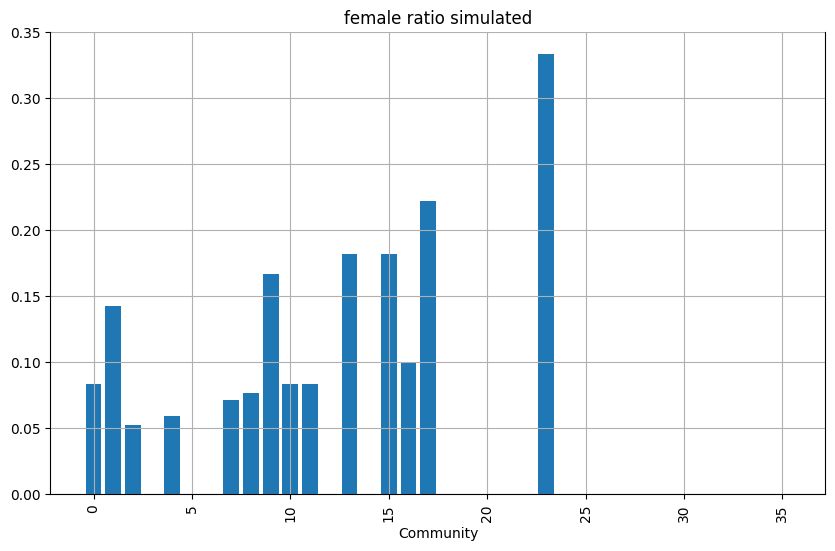

In [4436]:
#plot the female ratio of each community
plt.figure(figsize=(10, 6))
plt.bar(df_communities_simulated['community'], df_communities_simulated['female_ratio'])
plt.title('female ratio simulated')
plt.xlabel('Community')
plt.ylabel
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig
plt.show()


In [4437]:
#descriptive stats on communities
#create df_community_descriptive
df_community_descriptive = pd.DataFrame(columns=["variable_name","value"])
#add average number of members per community
average_number_of_members = df_communities_simulated['number_of_members'].mean()
df_community_descriptive.loc[0] = ["average_number_of_members", average_number_of_members]

#add average age per community
average_age = df_communities_simulated['average_age'].mean()
df_community_descriptive.loc[1] = ["average_age", average_age]

#add average number of investments
average_number_of_investments = df_communities_simulated['average_number_of_investments'].mean()
df_community_descriptive.loc[2] = ["average_number_of_investments", average_number_of_investments]

df_community_descriptive

variable_name      value
0      average_number_of_members   9.916667
1                    average_age  47.728084
2  average_number_of_investments   2.375658

In [4438]:
import pandas as pd
import scipy.stats as stats

# Calculate standard deviation of 'average_age' for active and simulated communities
average_sd_age_active = df_communities_active['average_age'].std()
average_sd_age_simulated = df_communities_simulated['average_age'].std()

# Create DataFrame for comparison of communities, including mean and sd
df_community_comparison = pd.DataFrame(columns=["variable", "t_stat", "p_value", "mean_simulated", "mean_active", "sd_simulated", "sd_active"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable,simulated_data, active_data):
    t_stat, p_value = stats.ttest_ind(active_data, simulated_data, equal_var=False)
    p_value_one_side = p_value / 2
    mean_active = active_data.mean()
    mean_simulated = simulated_data.mean()
    sd_active = active_data.std()
    sd_simulated = simulated_data.std()
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,mean_simulated, mean_active,  sd_simulated,sd_active]

# Perform t-tests on each variable and add to df_community_comparison
add_comparison_row(df_community_comparison, "sd_eigenvector_centrality",  df_communities_simulated['sd_eigenvector_centrality'],df_communities_active['sd_eigenvector_centrality'])


# add_comparison_row(df_community_comparison, "average_number_of_investments", df_communities_active['average_number_of_investments'], df_communities_simulated['average_number_of_investments'])
# add_comparison_row(df_community_comparison, "average_eigenvector_centrality", df_communities_active['average_eigenvector_centrality'], df_communities_simulated['average_eigenvector_centrality'])
add_comparison_row(df_community_comparison, "sd_number_of_investments", df_communities_simulated['sd_number_of_investments'],df_communities_active['sd_number_of_investments'] )
add_comparison_row(df_community_comparison, "sd_total_participation",df_communities_simulated['sd_total_participation'], df_communities_active['sd_total_participation'])

add_comparison_row(df_community_comparison, "sd_industry_hhi",df_communities_simulated['sd_industry_hhi'], df_communities_active['sd_industry_hhi'])

#add comparison for region hhi
add_comparison_row(df_community_comparison, "sd_region_hhi",df_communities_simulated['sd_region_hhi'], df_communities_active['sd_region_hhi'])
# # Assuming 'sd_age' columns exist in your DataFrames
# add_comparison_row(df_community_comparison, "sd_age", df_communities_active['sd_age'], df_communities_simulated['sd_age'])

# #add coparison for region_hhi value
# add_comparison_row(df_community_comparison, "region_hhi_value",df_communities_simulated['region_hhi_value'], df_communities_active['region_hhi_value'])

# add_comparison_row(df_community_comparison, "gender_hhi",df_communities_simulated['gender_hhi'], df_communities_active["gender_hhi"])
# # Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated


add_comparison_row(df_community_comparison, "sd_age", df_communities_simulated['sd_age'], df_communities_active['sd_age'])
# t_stat, p_value_two_tail = stats.ttest_ind(df_communities_active['female_ratio'], df_communities_simulated['female_ratio'], equal_var=False)
# p_value_one_tail = p_value_two_tail / 2
# print(f"One-tailed p-value for female_ratio: {p_value_one_tail}")

# Add the two-tailed test result for 'female_ratio' to the comparison DataFrame
# add_comparison_row(df_community_comparison, "female_ratio", df_communities_active['female_ratio'], df_communities_simulated['female_ratio'])

df_community_comparison
# #perform t-test
# from scipy.stats import ttest_ind
# t_stat, p_value = ttest_ind(df_communities_active['sd_age'], df_communities_simulated['sd_age'])
# print(t_stat, p_value)
# # average_eigenvector_centrality_active = df_communities_active['average_eigenvector_centrality'].std()
# # print(average_eigenvector_centrality_active)

# # average_eigenvector_centrality_simulated = df_communities_simulated['average_eigenvector_centrality'].std()
# # print(average_eigenvector_centrality_simulated)
# #calculate t test between averages average_sd_age_active
# # and average_sd_age_simulated
# # from scipy.stats import ttest_ind
# # t_stat, p_value = ttest_ind(average_eigenvector_centrality_active, average_eigenvector_centrality_simulated, equal_var=False)
# # print(t_stat, p_value)

variable    t_stat   p_value  mean_simulated  mean_active  \
0  sd_eigenvector_centrality -2.754194  0.004632        0.009880     0.000354   
1   sd_number_of_investments  3.099226  0.001765        0.590315     1.138875   
2     sd_total_participation -1.043070  0.150873       12.756401    10.773895   
3            sd_industry_hhi  0.487741  0.313799        0.205436     0.215567   
4              sd_region_hhi  0.148451  0.441272        0.219975     0.222487   
5                     sd_age -2.048902  0.022489       10.890156     8.970938   

   sd_simulated  sd_active  
0      0.020743   0.000536  
1      0.497854   0.812390  
2      6.910266   7.856361  
3      0.083285   0.080292  
4      0.063462   0.068665  
5      3.845305   3.549717

In [4428]:
# Create DataFrame for comparison of communities, including mean and sd
df_community_comparison_mean_vals = pd.DataFrame(columns=["variable", "t_stat", "p_value", "mean_active", "mean_simulated", "sd_active", "sd_simulated"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable,simulated_data, active_data):
    t_stat, p_value = stats.ttest_ind(active_data, simulated_data, equal_var=False)
    p_value_one_side = p_value / 2
    mean_active = active_data.mean()
    mean_simulated = simulated_data.mean()
    sd_active = active_data.std()
    sd_simulated = simulated_data.std()
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,mean_simulated, mean_active,  sd_simulated,sd_active]


#add coparison for region_hhi value
add_comparison_row(df_community_comparison_mean_vals, "region_hhi_value",df_communities_active['region_hhi_value'], df_communities_simulated['region_hhi_value'])


df_community_comparison_mean_vals_female_ratio = pd.DataFrame(columns=["variable", "t_stat", "p_value","mean_simulated", "mean_active", "sd_active", "sd_simulated"])
add_comparison_row(df_community_comparison_mean_vals_female_ratio, "female_ratio", df_communities_simulated['female_ratio'],df_communities_active["female_ratio"])
# Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated

df_community_comparison_mean_vals



variable    t_stat   p_value  mean_active  mean_simulated  \
0  region_hhi_value -1.878064  0.033042     0.367385        0.292958   

   sd_active  sd_simulated  
0   0.165237      0.141896

In [4429]:
df_community_comparison_mean_vals_female_ratio = pd.DataFrame(columns=["variable", "t_stat", "p_value","mean_simulated", "mean_active", "sd_active", "sd_simulated"])
add_comparison_row(df_community_comparison_mean_vals_female_ratio, "female_ratio", df_communities_simulated['female_ratio'],df_communities_active["female_ratio"])
# Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated
df_community_comparison_mean_vals_female_ratio

variable    t_stat  p_value  mean_simulated  mean_active  sd_active  \
0  female_ratio  0.865386  0.19547         0.05107     0.070928   0.080885   

   sd_simulated  
0       0.09649

In [4398]:
# Check if 'startup_name' is unique in df_startups
if df_startups['startup_name'].is_unique:
    # Use 'startup_name' as the index for mapping
    mapping_series = df_startups.set_index('startup_name')['changed_shareholder_structure']
    df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['startup_name'].map(mapping_series)
else:
    print("Error: 'startup_name' is not unique in df_startups.")
    # Handle the non-unique 'startup_name' here, maybe by aggregating or cleaning up

# Print the result
df_investment_rel_angel_startup

#If yes then 1 else 0
df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['changed_shareholder_structure'].apply(lambda x: 1 if x == 'yes' else 0)
#Replace all spaces in shareholder name mapped with _
df_investment_rel_angel_startup['shareholder_name_mapped'] = df_investment_rel_angel_startup['shareholder_name_mapped'].str.replace(' ', '_')

In [4399]:
#add a column survival_rate to df_angels_active
df_angels_active['survival_rate'] = 0
# Calculate the survival rate for each angel
for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    # Calculate the survival rate for the angel
    survival_rate = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'] == angel]['changed_shareholder_structure'].mean()
    
    # Add the survival rate to the DataFrame
    df_angels_active.at[index, 'survival_rate'] = survival_rate



In [4400]:
#for each community calculate the average survival rate
# Create a DataFrame to store the average survival rate for each community
df_survival_rate = pd.DataFrame(columns=["community", "average_survival_rate","members"])
#get unique community value sin df_angels_active["community"]
communities = df_angels_active['community'].unique()
# Loop through each community
for community in communities:
    # Calculate the average survival rate of the community
    average_survival_rate = df_angels_active[df_angels_active['community'] == community]['survival_rate'].mean()
    # Add the community to the DataFrame

    members= len(df_angels_active[df_angels_active['community'] == community])
    df_survival_rate.loc[community] = [community, average_survival_rate,members]
#sort ascending by community
df_survival_rate = df_survival_rate.sort_values(by='community', ascending=True)
df_survival_rate

community  average_survival_rate  members
-1         -1.0               0.733826    302.0
 0          0.0               0.787328     30.0
 1          1.0               1.000000     19.0
 2          2.0               0.865722     19.0
 3          3.0               0.536313     17.0
 4          4.0               0.900000     15.0
 5          5.0               0.815476     14.0
 6          6.0               0.916667     14.0
 7          7.0               0.719558     14.0
 8          8.0               0.894078     13.0
 9          9.0               0.582051     13.0
 10        10.0               0.458974     13.0
 11        11.0               0.538462     13.0
 12        12.0               0.854545     11.0
 13        13.0               0.906061     11.0
 14        14.0               0.900000     10.0
 15        15.0               0.616667     10.0
 16        16.0               0.600000      9.0
 17        17.0               0.907407      9.0
 18        18.0               0.750000      8.0
 19        19.0               0.597222      6.0
 20        20.0               0.944444      6.0
 21        21.0               0.466667      5.0
 22        22.0               0.466667      5.0
 23        23.0               1.000000      5.0
 24        24.0               0.700000      5.0
 25        25.0               0.720000      5.0
 26        26.0               0.900000      5.0
 100      100.0               0.494108    297.0

In [4401]:
#ttest for survival rate between community -1 and all others
# Perform a t-test between community -1 and all other communities
community_minus_one = df_angels_active[df_angels_active['community'] == -1]['survival_rate']
other_communities = df_angels_active[(df_angels_active['community'] != -1)&(df_angels_active['community'] != 100)]['survival_rate']
t_stat, p_value = stats.ttest_ind(community_minus_one, other_communities, equal_var=False)
print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: -1.4145566424615086, p-value: 0.15771436393638985


In [4402]:
#map column community into df_investment_rel_angel_startup
df_investment_rel_angel_startup['community'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_angels_active.set_index('shareholder_name')['community'])

#create a df with columns shareholder_name_mapped, shareholder_type, changed_shareholder_structure, funding_round_type
df_investment_rel_angel_startup_ancova = df_investment_rel_angel_startup[['shareholder_name_mapped', 'shareholder_type', 'changed_shareholder_structure','startup_name', 'funding_round_type','community']]

df_investment_rel_angel_startup_ancova




shareholder_name_mapped shareholder_type  \
55                  WESC_CAPITAL_UG_(haftungsbeschränkt)            angel   
56                               Hanse_Ventures_BSJ_GmbH            angel   
69                         SI_Development_&_Service_GmbH            angel   
85                 MGH_Beratungs-_und_Beteiligungs-_GmbH            angel   
86     Andreas_und_Thomas_Schroeter_Beteiligungsgesel...            angel   
...                                                  ...              ...   
27755                              Philipp_Karsten_Wolde            angel   
27756                            Dr._Dr._Alexander_Weiss            angel   
27762                                    Benjamin_Takats            angel   
27765                                       Dennis_Hauck            angel   
27769                                        Ralph_Lägel            angel   

       changed_shareholder_structure                startup_name  \
55                                 1               one.five GmbH   
56                                 1  Animal Lovers Hamburg GmbH   
69                                 0       TiRo CheckEnergy GmbH   
85                                 0  Mimotype Technologies GmbH   
86                                 0       TiRo CheckEnergy GmbH   
...                              ...                         ...   
27755                              1                Pryntad GmbH   
27756                              1      Hive Technologies GmbH   
27762                              0         Affekt Digital GmbH   
27765                              0         Affekt Digital GmbH   
27769                              1         Apricot Health GmbH   

      funding_round_type  community  
55                   NaN         -1  
56                   NaN         -1  
69                   NaN         -1  
85                   NaN         -1  
86                   NaN         -1  
...                  ...        ...  
27755                NaN         13  
27756                NaN         -1  
27762                NaN        100  
27765                NaN        100  
27769                NaN         -1  

[2303 rows x 6 columns]

In [4403]:
#if community is -1 or 100 then set communityto "no"
df_investment_rel_angel_startup_ancova['community'] = df_investment_rel_angel_startup_ancova['community'].apply(lambda x: "no" if x == -1 or x == 100 else "yes")

# if funding round type is aangel set no else yes
df_investment_rel_angel_startup_ancova['funding_round_type'] = df_investment_rel_angel_startup_ancova['funding_round_type'].apply(lambda x: "no" if x == 'angel' else "yes")

df_investment_rel_angel_startup_ancova
#count yes and no for fundingroundtype and community

#encode yes to 1

#encode yes to 1
df_investment_rel_angel_startup_ancova['community'] = df_investment_rel_angel_startup_ancova['community'].apply(lambda x: 1 if x == 'yes' else 0)
#encode yes to 1
df_investment_rel_angel_startup_ancova['funding_round_type'] = df_investment_rel_angel_startup_ancova['funding_round_type'].apply(lambda x: 1 if x == 'yes' else 0)

#map in year from df_startups
for index, row in df_investment_rel_angel_startup_ancova.iterrows():
    startup = row['startup_name']
    year = df_startups[df_startups['startup_name'] == startup]['year_of_incorporation']
    if len(year) > 0:
        df_investment_rel_angel_startup_ancova.at[index, 'year'] = year.values[0]
    else:
        df_investment_rel_angel_startup_ancova.at[index, 'year'] = 0

df_investment_rel_angel_startup_ancova

shareholder_name_mapped shareholder_type  \
55                  WESC_CAPITAL_UG_(haftungsbeschränkt)            angel   
56                               Hanse_Ventures_BSJ_GmbH            angel   
69                         SI_Development_&_Service_GmbH            angel   
85                 MGH_Beratungs-_und_Beteiligungs-_GmbH            angel   
86     Andreas_und_Thomas_Schroeter_Beteiligungsgesel...            angel   
...                                                  ...              ...   
27755                              Philipp_Karsten_Wolde            angel   
27756                            Dr._Dr._Alexander_Weiss            angel   
27762                                    Benjamin_Takats            angel   
27765                                       Dennis_Hauck            angel   
27769                                        Ralph_Lägel            angel   

       changed_shareholder_structure                startup_name  \
55                                 1               one.five GmbH   
56                                 1  Animal Lovers Hamburg GmbH   
69                                 0       TiRo CheckEnergy GmbH   
85                                 0  Mimotype Technologies GmbH   
86                                 0       TiRo CheckEnergy GmbH   
...                              ...                         ...   
27755                              1                Pryntad GmbH   
27756                              1      Hive Technologies GmbH   
27762                              0         Affekt Digital GmbH   
27765                              0         Affekt Digital GmbH   
27769                              1         Apricot Health GmbH   

       funding_round_type  community    year  
55                      1          0  2020.0  
56                      1          0  2019.0  
69                      1          0  2019.0  
85                      1          0  2021.0  
86                      1          0  2019.0  
...                   ...        ...     ...  
27755                   1          1  2019.0  
27756                   1          0  2020.0  
27762                   1          0  2017.0  
27765                   1          0  2017.0  
27769                   1          0  2020.0  

[2303 rows x 7 columns]

In [4404]:
#Match eigenvector centrality from df_angels_active to df_investment_rel_angel_startup_ancova
for index, row in df_investment_rel_angel_startup_ancova.iterrows():
    angel = row['shareholder_name_mapped']
    eigenvector_centrality = df_angels_active[df_angels_active['shareholder_name'] == angel]['eigenvector_centrality']
    if len(eigenvector_centrality) > 0:
        df_investment_rel_angel_startup_ancova.at[index, 'eigenvector_centrality'] = eigenvector_centrality.values[0]
    else:
        df_investment_rel_angel_startup_ancova.at[index, 'eigenvector_centrality'] = 0

In [4405]:
#categorize the eigenvector centrality into three equally sized bins 0,1,2 representing small middle large and bins being constructed based on the size
df_investment_rel_angel_startup_ancova['eigenvector_centrality'] = pd.qcut(df_investment_rel_angel_startup_ancova['eigenvector_centrality'], 2, labels=[0, 1])

df_investment_rel_angel_startup_ancova

shareholder_name_mapped shareholder_type  \
55                  WESC_CAPITAL_UG_(haftungsbeschränkt)            angel   
56                               Hanse_Ventures_BSJ_GmbH            angel   
69                         SI_Development_&_Service_GmbH            angel   
85                 MGH_Beratungs-_und_Beteiligungs-_GmbH            angel   
86     Andreas_und_Thomas_Schroeter_Beteiligungsgesel...            angel   
...                                                  ...              ...   
27755                              Philipp_Karsten_Wolde            angel   
27756                            Dr._Dr._Alexander_Weiss            angel   
27762                                    Benjamin_Takats            angel   
27765                                       Dennis_Hauck            angel   
27769                                        Ralph_Lägel            angel   

       changed_shareholder_structure                startup_name  \
55                                 1               one.five GmbH   
56                                 1  Animal Lovers Hamburg GmbH   
69                                 0       TiRo CheckEnergy GmbH   
85                                 0  Mimotype Technologies GmbH   
86                                 0       TiRo CheckEnergy GmbH   
...                              ...                         ...   
27755                              1                Pryntad GmbH   
27756                              1      Hive Technologies GmbH   
27762                              0         Affekt Digital GmbH   
27765                              0         Affekt Digital GmbH   
27769                              1         Apricot Health GmbH   

       funding_round_type  community    year eigenvector_centrality  
55                      1          0  2020.0                      1  
56                      1          0  2019.0                      0  
69                      1          0  2019.0                      1  
85                      1          0  2021.0                      1  
86                      1          0  2019.0                      1  
...                   ...        ...     ...                    ...  
27755                   1          1  2019.0                      0  
27756                   1          0  2020.0                      0  
27762                   1          0  2017.0                      0  
27765                   1          0  2017.0                      0  
27769                   1          0  2020.0                      0  

[2303 rows x 8 columns]

In [4406]:
#pull in column number_of_investments from df_angels_active
for index, row in df_investment_rel_angel_startup_ancova.iterrows():
    angel = row['shareholder_name_mapped']
    number_of_investments = df_angels_active[df_angels_active['shareholder_name'] == angel]['number_of_investments']
    if len(number_of_investments) > 0:
        df_investment_rel_angel_startup_ancova.at[index, 'number_of_investments'] = number_of_investments.values[0]
    else:
        df_investment_rel_angel_startup_ancova.at[index, 'number_of_investments'] = 0

In [4407]:
#for each startup calculate the max number of investments of their angels
# add to df_startups
# Create a DataFrame to store the average number of investments for each startup
df_startups['max_number_of_investments'] = 0
# Loop through each startup
for index, row in df_startups.iterrows():
    startup = row['startup_name']
    # Calculate the average number of investments of the startup
    max_number_of_investments = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['startup_name'] == startup]['number_of_investments'].max()
    # Add the startup to the DataFrame
    df_startups.at[index, 'max_number_of_investments'] = max_number_of_investments


In [4408]:
#to df_startups add columns community_round
df_startups['community_round'] = 0
#if community in df_investment_rel_angel_startup_ancova is yes then set community_round to 1
for index, row in df_startups.iterrows():
    startup = row['startup_name']
    community_round = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['startup_name'] == startup]['community'].sum()
    df_startups.at[index, 'community_round'] = community_round

In [4409]:
#get rows in df_startups where community_round is 2
df_startups[df_startups['community_round'] == 2]

#add column angel_sydication to df_startups
df_startups['angel_syndication'] = 0
#if community_round>1 then set angel_syndication to 1
df_startups['angel_syndication'] = df_startups['number_angels'].apply(lambda x: 1 if x > 1 else 0)

#replace all numbers in community_round >1 with 1
df_startups['community_round'] = df_startups['community_round'].apply(lambda x: 1 if x > 1 else x)

#add_column hot_spot which is 1 is startup_region is berlin or munich and 0 if not
df_startups['hot_spot'] = 0
df_startups['hot_spot'] = df_startups['region_mapping'].apply(lambda x: 1 if x == 'berlin' or x == 'munich' else 0)

#average status add column
df_startups['average_status'] = 0
#for every startup get the highest eigenvetor_centrality category of their angels
for index, row in df_startups.iterrows():
    startup = row['startup_name']
    average_status = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['startup_name'] == startup]['eigenvector_centrality'].max()
    df_startups.at[index, 'average_status'] = average_status


In [4410]:
df_startups
#fill nan with 0

startup_id                     created_at                startup_name  \
1          10856  2024-01-17 10:12:59.864646+00        Cosuno Ventures GmbH   
7           3386   2024-01-17 10:12:53.52288+00                 mipart GmbH   
13          5542  2024-01-17 10:12:55.369656+00                blonder GmbH   
17          3900  2024-01-17 10:12:54.134505+00  Guardian Technologies GmbH   
23         12526  2024-01-17 10:13:01.504395+00                Perfood GmbH   
...          ...                            ...                         ...   
8874        3191   2024-01-17 10:12:53.52288+00               FrontNow GmbH   
8880        3380   2024-01-17 10:12:53.52288+00             BeYourHero GmbH   
8881        2490  2024-01-17 10:12:52.534717+00            UMH Systems GmbH   
8883       14101  2024-01-17 10:21:45.090336+00            BringLiesel GmbH   
8890         534  2024-01-17 10:12:50.707796+00              Tilo Tech GmbH   

                                       shareholder_json  \
1     {"shareholders":[{"shareholder_name":"Laubach ...   
7                                                   NaN   
13    {"shareholders":[{"shareholder_name":"Cinto Ca...   
17    {"shareholders":[{"shareholder_name":"Anavrin ...   
23                                                  NaN   
...                                                 ...   
8874  {"shareholders":[{"shareholder_name":"Aurorum ...   
8880  {"shareholders":[{"shareholder_name":"NBK Bete...   
8881  {"shareholders":[{"shareholder_name":"Jeremy T...   
8883                                                NaN   
8890  {"shareholders":[{"shareholder_name":"MajorGro...   

                                               list_mds  number_angels  \
1     {"name":{"0":10856,"1":10856,"2":10856},"akten...              4   
7     {"name":{"0":3386},"total_MDs":{"0":1},"gegens...              3   
13    {"name":{"0":5542},"aktenzeichen":{"0":"HRB 21...              1   
17    {"name":{"0":3900},"total_MDs":{"0":1},"gegens...              1   
23                                                   {}              1   
...                                                 ...            ...   
8874  {"name":{"0":3191,"1":3191},"aktenzeichen":{"0...              3   
8880  {"name":{"0":3380,"1":3380},"total_MDs":{"0":2...              1   
8881  {"name":{"0":2490,"1":2490,"2":2490},"total_MD...              1   
8883  {"name":{"0":14101,"1":14101},"aktenzeichen":{...              1   
8890  {"name":{"0":534,"1":534,"2":534},"aktenzeiche...              1   

      startup_industry                                    startup_purpose  \
1         construction  {"gegenstand": "der Betrieb von Internet-Platt...   
7             industry  {"gegenstand": "Der Betrieb einer On-Demand-Ma...   
13        construction  {"gegenstand": "Die Entwicklung und Vermarktun...   
17        construction  {"gegenstand": "Forschung, Entwicklung, Produk...   
23    medicine_biotech  {"gegenstand": "Gegenstand des Unternehmens is...   
...                ...                                                ...   
8874         ecommerce  {"gegenstand": "Der Erwerb, das Halten, die Be...   
8880              food  {"gegenstand": "Der Import und Export sowie di...   
8881          industry  {"gegenstand": "Gegenstand des Unternehmens is...   
8883         ecommerce  {"gegenstand": "Handel mit Bedarfsprodukten f\...   
8890          software  {"gegenstand": "Entwicklung und Vertrieb von T...   

                             link_shareholder_file_2021  \
1     Cosuno Ventures GmbH_Berlin Charlottenburg_HRB...   
7     mipart GmbH_Weiden i d OPf_HRB 5580/Liste der ...   
13    Datenflug GmbH_Berlin Charlottenburg_HRB 21647...   
17    Guardian Technologies GmbH_Mnchen_HRB 260386/L...   
23    Perfood GmbH_Lbeck_HRB 17098/Liste der Gesells...   
...                                                 ...   
8874  FrontNow GmbH_Berlin Charlottenburg_HRB 225341...   
8880  BeYourHero GmbH_Dsseldorf_HRB 91974/Liste der ...   
888

In [4411]:
#get subset of df_startups year, startup_name, community_round, angel_syndication, funding_round_type
df_startups_subset = df_startups[['year_of_incorporation', 'startup_name', 'community_round', 'angel_syndication', 'funding_round_type','changed_shareholder_structure','hot_spot','average_status','number_shareholders','number_angels','max_number_of_investments']]
#replace yes with 1 no with zero
df_startups_subset['changed_shareholder_structure'] = df_startups_subset['changed_shareholder_structure'].apply(lambda x: 1 if x == 'yes' else 0)
df_startups_subset
#replace institutional_investor with 1 else with zero in funding_round_type
df_startups_subset['funding_round_type'] = df_startups_subset['funding_round_type'].apply(lambda x: 1 if x == 'institutional_investor' else 0)
df_startups_subset
# number_shareholders is one if number_shareholders > 2 else 0
# df_startups_subset['number_angels'] = df_startups_subset['number_angels'].apply(lambda x: 1 if x > 2 else 0)
#fill nan with 0
df_startups_subset = df_startups_subset.fillna(0)

In [4412]:
# duplicate all rows in startup_subset
df_startups_subset = df_startups_subset.append(df_startups_subset)
df_startups_subset

year_of_incorporation                startup_name  community_round  \
1                      2018        Cosuno Ventures GmbH                1   
7                      2020                 mipart GmbH                0   
13                     2020                blonder GmbH                0   
17                     2020  Guardian Technologies GmbH                0   
23                     2017                Perfood GmbH                1   
...                     ...                         ...              ...   
8874                   2021               FrontNow GmbH                0   
8880                   2020             BeYourHero GmbH                0   
8881                   2021            UMH Systems GmbH                0   
8883                   2017            BringLiesel GmbH                1   
8890                   2021              Tilo Tech GmbH                1   

      angel_syndication  funding_round_type  changed_shareholder_structure  \
1                     1                   1                              1   
7                     1                   0                              0   
13                    0                   0                              1   
17                    0                   0                              1   
23                    0                   1                              1   
...                 ...                 ...                            ...   
8874                  1                   0                              1   
8880                  0                   0                              0   
8881                  0                   0                              1   
8883                  0                   0                              1   
8890                  0                   1                              1   

      hot_spot  average_status  number_shareholders  number_angels  \
1            1             1.0                 18.0              4   
7            0             0.0                  3.0              3   
13           1             0.0                  3.0              1   
17           0             0.0                  5.0              1   
23           0             1.0                 17.0              1   
...        ...             ...                  ...            ...   
8874         1             0.0                  5.0              3   
8880         0             0.0                  3.0              1   
8881         0             0.0                  4.0              1   
8883         0             1.0                  3.0              1   
8890         1             1.0                  7.0              1   

      max_number_of_investments  
1                             5  
7                             3  
13                            3  
17                            2  
23                            2  
...                         ...  
8874                          3  
8880                          2  
8881                          2  
8883                          4  
8890                          4  

[2166 rows x 11 columns]

In [4413]:
#safe df_startups_subset to csv
df_startups_subset.to_csv('dataframes/df_startups_subset.csv', index=False)

In [4414]:
#read from csv
df_startups_subset = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/df_startups_subset - df_startups_subset.csv')

In [4415]:
#replace all 4 in changed_shareholderstructure with 1
df_startups_subset['changed_shareholder_structure'] = df_startups_subset['changed_shareholder_structure'].apply(lambda x: 1 if x == 4 else x)

In [4416]:
#perform multiple logistic regression with changed_shareholder_structure as dependent variable and year_of_incorporation, community_round, angel_syndication, funding_round_type as independent variables
import statsmodels.api as sm
# Define the independent variables
X = df_startups_subset[[ 'community_round', 'year_of_incorporation','funding_round_type','hot_spot','number_shareholders']]
# Define the dependent variable
y = df_startups_subset['changed_shareholder_structure']
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()
# Print the model summary
logit_model.summary()


Optimization terminated successfully.
         Current function value: 0.610516
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     changed_shareholder_structure   No. Observations:                 2166
Model:                                     Logit   Df Residuals:                     2160
Method:                                      MLE   Df Model:                            5
Date:                           Mon, 01 Apr 2024   Pseudo R-squ.:                 0.07197
Time:                                   17:10:43   Log-Likelihood:                -1322.4
converged:                                  True   LL-Null:                       -1424.9
Covariance Type:                       nonrobust   LLR p-value:                 2.307e-42
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -87.1914     71.886     -1.213      0.225    -228.085      53.702
community_round           0.6471      0.115      5.639      0.000       0.422       0.872
year_of_incorporation     0.0429      0.036      1.206      0.228      -0.027       0.113
funding_round_type        0.7072      0.106      6.688      0.000       0.500       0.914
hot_spot                  0.1828      0.096      1.901      0.057      -0.006       0.371
number_shareholders       0.0422      0.011      3.887      0.000       0.021       0.063
=========================================================================================
"""

In [4417]:
#check if there are any NaN
df_investment_rel_angel_startup_ancova.isnull().sum()

shareholder_name_mapped            0
shareholder_type                   0
changed_shareholder_structure      0
startup_name                       0
funding_round_type                 0
community                          0
year                               0
eigenvector_centrality           302
number_of_investments              0
dtype: int64

In [4418]:
import statsmodels.api as sm

# Assuming 'df_investment_rel_angel_startup_ancova' has a 'year' column and 'changed_shareholder_structure' is binary
# and 'community' and 'funding_round_type' are your independent variables

# Loop through each year and fit a model
for year in df_investment_rel_angel_startup_ancova['year'].unique():
    print(f"Fitting model for year: {year}")
    
    # Subset the DataFrame for the current year
    df_year = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['year'] == year]
    
    # Add a constant to the independent variables to represent the intercept
    X = sm.add_constant(df_year[['community', 'funding_round_type']])
    
    # Fit logistic regression model
    try:
        logit_model = sm.Logit(df_year['changed_shareholder_structure'], X).fit(disp=0)  # disp=0 suppresses the output during fitting

        # Display the summary
        print(logit_model.summary())
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")
    
    print("\n")  # Add a newline for separation between years

Fitting model for year: 2020.0
                                 Logit Regression Results                                
Dep. Variable:     changed_shareholder_structure   No. Observations:                  497
Model:                                     Logit   Df Residuals:                      495
Method:                                      MLE   Df Model:                            1
Date:                           Mon, 01 Apr 2024   Pseudo R-squ.:                0.002892
Time:                                   17:10:43   Log-Likelihood:                -302.64
converged:                                  True   LL-Null:                       -303.51
Covariance Type:                       nonrobust   LLR p-value:                    0.1852
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
community              0.2647      0.201      1.319      0.187      -0.129 

In [4419]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_angels_active is your DataFrame containing all active angels

# Calculate the average and standard deviation where the age is greater than 1
average_age_overall = df_angels_active[df_angels_active['age'] > 1]['age'].mean()
sd_age_overall = df_angels_active[df_angels_active['age'] > 1]['age'].std()

# Calculate the average and standard deviation of total participation
average_total_participation_overall = df_angels_active['total_participation'].mean()
sd_total_participation_overall = df_angels_active['total_participation'].std()

# Calculate the average and standard deviation of the number of investments
average_number_of_investments_overall = df_angels_active['number_of_investments'].mean()
sd_number_of_investments_overall = df_angels_active['number_of_investments'].std()

# Calculate the average and standard deviation of eigenvector centrality excluding zeros
average_eigenvector_centrality_overall = df_angels_active[df_angels_active['eigenvector_centrality'] != 0]['eigenvector_centrality'].mean()
sd_eigenvector_centrality_overall = df_angels_active[df_angels_active['eigenvector_centrality'] != 0]['eigenvector_centrality'].std()

# Calculate the standard deviation of industry HHI
sd_industry_hhi_overall = df_angels_active['industry_HHI'].std()

# Calculate the standard deviation of region HHI
sd_region_hhi_overall = df_angels_active['region_HHI'].std()

# Assuming the gender_hhi and region_hhi functions are defined and work on the overall DataFrame
gender_hhi_value_overall = gender_hhi(df_angels_active)
region_hhi_value_overall = region_hhi(df_angels_active)



In [4420]:
# Create a DataFrame to hold the aggregated statistics
df_overall_stats = pd.DataFrame(columns=[
    'average_age', 'sd_age', 'average_total_participation',
    'sd_total_participation', 'average_number_of_investments',
    'sd_number_of_investments', 'average_eigenvector_centrality',
    'sd_eigenvector_centrality', 'sd_industry_hhi', 'sd_region_hhi',
    'gender_hhi_value', 'region_hhi_value'
])

# Add the calculated overall stats to the DataFrame
df_overall_stats.loc[0] = [
    average_age_overall, sd_age_overall,
    average_total_participation_overall, sd_total_participation_overall,
    average_number_of_investments_overall, sd_number_of_investments_overall,
    average_eigenvector_centrality_overall, sd_eigenvector_centrality_overall,
    sd_industry_hhi_overall, sd_region_hhi_overall,
    gender_hhi_value_overall, region_hhi_value_overall
]

# Display the DataFrame
df_overall_stats


average_age     sd_age  average_total_participation  \
0    46.389462  10.766793                    12.083531   

   sd_total_participation  average_number_of_investments  \
0               25.678657                       2.550388   

   sd_number_of_investments  average_eigenvector_centrality  \
0                  1.257993                        0.009027   

   sd_eigenvector_centrality  sd_industry_hhi  sd_region_hhi  \
0                    0.03523         0.234732       0.257867   

   gender_hhi_value  region_hhi_value  
0          0.752458          0.118664

In [4421]:
#Perform a one-sided t-test where we compare sd community age to the overall average age

#get sd age from df_communities_active
sd_age_community = df_communities_active['sd_age']
# Perform a one-sided t-test
t_stat, p_value = stats.ttest_1samp(sd_age_community, average_age_overall)
print(f"One-sided t-test for sd_age in communities: t-statistic = {t_stat}, p-value = {p_value/2}")

import pandas as pd
import scipy.stats as stats


# Create DataFrame for comparison of communities, including mean and sd
df_community_network_comparison = pd.DataFrame(columns=["variable", "t_stat", "p_value", "network_value", "mean_active", "sd_active"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable, active_data,network_value):
    t_stat, p_value = stats.ttest_1samp(active_data, network_value)
    p_value_one_side = p_value/2
    mean_active = active_data.mean()

    sd_active = active_data.std()
   
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,network_value, mean_active, sd_active]

# Perform t-tests on each variable and add to df_community_comparison
add_comparison_row(df_community_network_comparison, "sd_eigenvector_centrality",  df_communities_active['sd_eigenvector_centrality'],sd_eigenvector_centrality_overall)


# add_comparison_row(df_community_comparison, "average_number_of_investments", df_communities_active['average_number_of_investments'], df_communities_simulated['average_number_of_investments'])
# # add_comparison_row(df_community_comparison, "average_eigenvector_centrality", df_communities_active['average_eigenvector_centrality'], df_communities_simulated['average_eigenvector_centrality'])
add_comparison_row(df_community_network_comparison, "sd_number_of_investments", df_communities_active['sd_number_of_investments'],sd_number_of_investments_overall )
# add_comparison_row(df_community_comparison, "sd_total_participation",df_communities_simulated['sd_total_participation'], df_communities_active['sd_total_participation'])

add_comparison_row(df_community_network_comparison, "sd_industry_hhi", df_communities_active['sd_industry_hhi'],sd_industry_hhi_overall)

# #add comparison for region hhi
add_comparison_row(df_community_network_comparison, "sd_region_hhi", df_communities_active['sd_region_hhi'],sd_region_hhi_overall)
# # # Assuming 'sd_age' columns exist in your DataFrames
add_comparison_row(df_community_network_comparison, "sd_age", df_communities_active['sd_age'], sd_age_overall)


df_community_network_comparison


One-sided t-test for sd_age in communities: t-statistic = -54.77404013363431, p-value = 1.0813859531944214e-28


variable      t_stat       p_value  network_value  \
0  sd_eigenvector_centrality -337.948066  3.408503e-49       0.035230   
1   sd_number_of_investments   -0.761898  2.264887e-01       1.257993   
2            sd_industry_hhi   -1.240237  1.129821e-01       0.234732   
3              sd_region_hhi   -2.677289  6.342447e-03       0.257867   
4                     sd_age   -2.628811  7.097183e-03      10.766793   

   mean_active  sd_active  
0     0.000354   0.000536  
1     1.138875   0.812390  
2     0.215567   0.080292  
3     0.222487   0.068665  
4     8.970938   3.549717

In [4440]:
# Create DataFrame for comparison of communities, including mean and sd
df_community_network_comparison_mean_vals = pd.DataFrame(columns=["variable", "t_stat", "p_value", "network_value","mean_active",  "sd_active"])

# Helper function to add a row to the DataFrame
# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable, active_data,network_value):
    t_stat, p_value = stats.ttest_1samp(active_data, network_value)
    p_value_one_side = p_value/2
    mean_active = active_data.mean()

    sd_active = active_data.std()
   
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,network_value, mean_active, sd_active]


#calculate fema

#add coparison for region_hhi value
add_comparison_row(df_community_network_comparison_mean_vals, "region_hhi_value",df_communities_active['region_hhi_value'], region_hhi_value_overall)

add_comparison_row(df_community_network_comparison_mean_vals, "female_ratio",df_communities_active['female_ratio'], share_of_female_angels_active)
# Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated
df_community_network_comparison_mean_vals

variable    t_stat       p_value  network_value  mean_active  \
0  region_hhi_value  7.821446  1.346911e-08       0.118664     0.367385   
1      female_ratio -0.022385  4.911560e-01       0.071344     0.070928   

   sd_active  
0   0.165237  
1   0.096490

In [4423]:
# #Girvan Newman based community detection

# import matplotlib.pyplot as plt
# import networkx as nx
# from networkx.algorithms.community.centrality import girvan_newman
# from networkx.algorithms.community import modularity
 

# def get_communities_Girvan_Newman(G_active):
#     comp = girvan_newman(G_active)
    
#     max_modularity = None
#     optimal_partition = None
#     for communities in comp:
#         new_modularity = modularity(G_active, communities)

#         if max_modularity is None or new_modularity > max_modularity:
#             max_modularity = new_modularity
#             optimal_partition = communities

#         if max_modularity is not None and new_modularity < max_modularity:
#             break
#     # node_groups = []
#     # for com in next(communities):
#     #   node_groups.append(list(com))

#     optimal_partition = [c for c in optimal_partition if len(c) > 4]
#     largest_cc = max(nx.connected_components(G_active), key=len)

#     subgraph = G_active.subgraph(largest_cc)
#     network_diameter = nx.diameter(subgraph)
#     # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
#     optimal_partition = [c for c in optimal_partition if nx.diameter(G_active.subgraph(c)) < network_diameter/2]
#     #transform optimal partition to list of lists
#     optimal_partition = [list(c) for c in optimal_partition]
#     return optimal_partition



# communities_girvan_newman = get_communities_Girvan_Newman(G_active)
# communities_girvan_newman_simulated = get_communities_Girvan_Newman(G_simulated)
# print(communities_girvan_newman)
# communities_girvan_newman
# len(communities_girvan_newman)
# len(communities_girvan_newman_simulated)
# #return size of all communities
# community_sizes = [len(community) for community in communities_girvan_newman]
# community_sizes_simulated = [len(community) for community in communities_girvan_newman_simulated]   
# print(community_sizes_simulated)
# print(community_sizes)

In [4424]:
print(len(communities_girvan_newman))


#get number of shareholders in each community
community_sizes = [len(community) for community in communities_girvan_newman]
community_sizes

NameError: name 'communities_girvan_newman' is not defined

In [ ]:
# Load csv angels
df_temp = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels.csv')
#rename column birthdate_x to birthdate
df_temp = df_temp.rename(columns={'birthdate_x':'birthdate'})

#save as csv
df_temp.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels_upload.csv', index=False)

## Analysis of similarity within communities - 5


In [ ]:
#calculate investments per location per angel based on input df_angel and input df_investment_rel_angel_startup
#define funtion
def investments_per_location_per_angel(df_angel, df_investment_rel_angel_startup):
    #get list of all unique angels
    # rename column angel to name
    df_angel = df_angel.rename(columns={'angel':'name'})
    df_investment_rel_angel_startup = df_investment_rel_angel_startup.rename(columns={'angel':'name'})
    angels = df_angel['name'].unique()
    #create list of all locations in df_investment_rel_angel_startup
    locations = df_investment_rel_angel_startup['startup_location'].unique()
    #in front of every location write investments_
    locations_columns = [x for x in locations+ '_investments']
    #create empty df with columns name and one column for each location
    df_investments_per_location_per_angel = pd.DataFrame(columns=['name']+locations_columns)

    #loop through all angels
    for angel in angels:
        #create empty list to store investments per location
        investments_per_location = []
        #loop through all locations
        for location in locations:
            #calculate investments per location
            investments = len(df_investment_rel_angel_startup[(df_investment_rel_angel_startup['startup_location'] == location) & (df_investment_rel_angel_startup['name'] == angel)])
            #append to list
            investments_per_location.append(investments)
        #create df with name and investments per location
        df = pd.DataFrame([[angel]+investments_per_location], columns=['name']+locations_columns)
        #append to df_investments_per_location_per_angel
        df_investments_per_location_per_angel = df_investments_per_location_per_angel.append(df, ignore_index=True)


    return df_investments_per_location_per_angel

#run function
df_investments_per_location_per_angel = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup)
df_investments_per_location_per_angel_simulated = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup_simulated)
df_investments_per_location_per_angel




KeyError: 'name'

In [ ]:
#Generating a df_angels_simulated from df_angels active angels only

df_angels_simulated = df_angels[df_angels['status'] == 'active']
#rename name to angel
df_angels_simulated = df_angels_simulated.rename(columns={"name": "angel"})
#calculate number of investments from df_investment_rel_angel_startup_simulated
#calculate number of investments per angel
number_of_investments_per_angel = df_investment_rel_angel_startup_simulated.groupby(['angel']).size().reset_index(name='number_of_investments')

#drop column number_of_investments from df_angels_simulated
df_angels_simulated = df_angels_simulated.drop(columns=['number_of_investments'])
#overwrite number of investments in df_angels_simulated with number_of_investments_per_angel
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_angel, left_on='angel', right_on='angel', how='left')

#Calculate number of investments for all locations and add to df_angels_simulated
#Drop all investments columns from df_angels_simulated
#get all locations from df_investment_rel_angel_startup_simulated
locations_unique = df_investment_rel_angel_startup_simulated['startup_location'].unique()
#add _investments to all locations
locations_investments = [x for x in locations_unique+ '_investments']
df_angels_simulated = df_angels_simulated.drop(columns=locations_investments)
#calculate number of investments per location
number_of_investments_per_location = investments_per_location_per_angel(df_angels_simulated,df_investment_rel_angel_startup_simulated)
#merge with df_angels_simulated
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_location, left_on='angel', right_on='name', how='left')


df_angels_simulated

angel  gender   location  \
0                                    PK Projects GmbH    male    Cologne   
1   Bayern Kapital Innovationsfonds EFRE GmbH & Co...  female    Cologne   
2                                          Alvio GmbH    male     Munich   
3                                 Rivus Ventures GmbH  female    Cologne   
4                                       Mercutio GmbH    male    Cologne   
5   AKVaganza Unternehmergesellschaft (haftungsbes...  female   Landshut   
6                                   ROMM Holding GmbH    male    Hamburg   
7                               Roskopf Ventures GmbH    male     Munich   
8                                WENVEST Capital GmbH  female    Hamburg   
9            Atlantic Food Labs Vintage GmbH & Co. KG  female    Hamburg   
10                                  SEK Ventures GmbH  female  Stuttgart   
11                                     Wax Venture UG    male   Landshut   
12                                 ROBEL Holding GmbH  female     Berlin   
13                  Dr. Alfred Heinrich Georg Spieker    male     Berlin   
14                                Main Incubator GmbH  female   Landshut   
15                                    another.vc GmbH  female     Berlin   
16                 Companisto Trust Service XVII GmbH  female  Stuttgart   
17                                    HW Capital GmbH  female  Stuttgart   
18                           Aurum Impact Invest GmbH  female  Stuttgart   
19                         ARES CAPITAL ADVISERS GmbH  female  Stuttgart   
20         Alexander Ludwig Friedrich Christian Fuchs    male  Stuttgart   
21                                Herr Gopi Kannappan    male  Stuttgart   
22                        Herr Vijay Pravin Maharajan  female  Stuttgart   
23                                    SixVenture GmbH    male  Stuttgart   
24                   Software Defined Automation Inc.    male  Stuttgart   
25           High-Tech Griinderfonds IV GmbH & Co. KG  female     Berlin   
26                         Vesta Venture Holding GmbH  female    Hamburg   
27                                Manoa Ventures GmbH  female    Cologne   
28                                      La Plata GmbH  female     Munich   
29                    Vsquared Ventures GmbH & Co. KG    male    Cologne   
30           eNugget Ventures UG (haftungsbeschrankt)    male    Cologne   
31                            Herr Ashok Varadharajan    male     Munich   
32              Entrepreneur First Operations Limited  female     Munich   
33                           AENU Fund SCA SICAV-RAIF    male     Berlin   
34                                         Kupke GmbH    male    Hamburg   
35                  Sebastian Schuon Investments GmbH    male    Cologne   
36                                  DSR Ventures GmbH  female   Landshut   
37        Herr Ajay Prashanth Narasaraju Gajendraraju    male     Berlin   
38                        Herr Saravanan Jaichandaran  female  Stuttgart   
39                                          Lino GmbH  female    Hamburg   
40                                 Picus Capital GmbH    male     Berlin   
41                 Possible Ventures II GmbH & Co. KG    male  Stuttgart   
42         Meinhardt Ventures UG (haftungsbeschrankt)    male    Cologne   
43                                  Charles Songhurst    male  Stuttgart   
44                        Simon Capital GmbH & Co. KG  female  Stuttgart   
45         Atlantic Food Labs Vintage I GmbH & Co. KG  female    Hamburg   

    total_participation date_of_birth    label  \
0              0.052364    1983-05-22    Angel   
1              0.020300    1951-03-11       VC   
2              0.039406    1957-04-06    Angel   
3              0.040825    1978-07-20    Angel   
4              0.072229    1979-06-05  founder   
5              0.116015    1992-12-19  founder   
6              0.135157    1984-10-24       VC   
7              0.052308    1971-01-26    Angel   
8              0.093130  

In [ ]:
#prepping the data

#add a column to df angels that contains the community of each angel
df_angels['community_membership'] = None

#in df angels replace all spaces in name column with _
df_angels['name'] = df_angels['name'].str.replace(' ', '_')
communities = communities_girvan_newman
print(communities)
print(df_angels.iloc[1]['name'])
# Ensure the column exists
if 'community_membership' not in df_angels.columns:
    df_angels['community_membership'] = None

# For each angel, see if they are in a community and if so add the community number to the df
for i in range(len(df_angels)):
    for j in range(len(communities)):
        try:
            if df_angels.iloc[i]['name'] in communities[j]:
                comm_memb = "comm_"+str(j+1)
                df_angels.at[i,'community_membership'] = comm_memb
        except KeyError:
            print(f"KeyError: 'name' not found in df_angels at index {i}")
        except Exception as e:
            print(f"An error occurred: {e}")

#for everyone with entry None in community_membership column, add them to a community called "no_community"
df_angels['community_membership'] = df_angels['community_membership'].fillna('no_community')

#show active angels
df_angels[df_angels['status'] == 'active']


[['Alvio_GmbH', 'Mercutio_GmbH', 'Sebastian_Schuon_Investments_GmbH', 'Lino_GmbH', 'Manoa_Ventures_GmbH', 'La_Plata_GmbH', 'PK_Projects_GmbH', 'Possible_Ventures_II_GmbH_&_Co._KG', 'ROMM_Holding_GmbH', 'Roskopf_Ventures_GmbH', 'Picus_Capital_GmbH', 'Wax_Venture_UG', 'DSR_Ventures_GmbH'], ['Herr_Gopi_Kannappan', 'Herr_Ajay_Prashanth_Narasaraju_Gajendraraju', 'Herr_Vijay_Pravin_Maharajan', 'Herr_Saravanan_Jaichandaran', 'Herr_Ashok_Varadharajan'], ['Vesta_Venture_Holding_GmbH', 'Kupke_GmbH', 'ARES_CAPITAL_ADVISERS_GmbH', 'Aurum_Impact_Invest_GmbH', 'Meinhardt_Ventures_UG_(haftungsbeschrankt)', 'AENU_Fund_SCA_SICAV-RAIF'], ['Rivus_Ventures_GmbH', 'HW_Capital_GmbH', 'Main_Incubator_GmbH', 'Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG', 'Charles_Songhurst', 'WENVEST_Capital_GmbH', 'Simon_Capital_GmbH_&_Co._KG']]
Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co._KG


name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    hhi = sum([share**2 for share in market_shares])

    return hhi

# Example usage:
market_shares = [30, 30, 20, 20]  # Market shares in percent
hhi = calculate_hhi(market_shares)
print(f"The HHI is {hhi}")

The HHI is 2600


In [ ]:
df_angels

name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
df_angels_test = df_angels[df_angels['status'] == 'active']
 #get subset of angels in comm_1

def get_geographical_HHI(df_angels_comm_1):
    #get all communities
    communities = df_angels_comm_1['community_membership'].unique()
    #create df with columns community and HHI

    df_community_HHI = pd.DataFrame(columns=("community","geographical_HHI"))
    print(df_community_HHI)

    #go thorugh communities, create subsets
    input = df_angels_comm_1
    for community in communities:

        #get subset of angels in comm_1
  
        temp2 = input[input['community_membership'] == community]
        # add row for community to df_community_HHI

        #count how many angels there are per location
        temp = temp2.groupby(['location']).size().reset_index(name='count')
        
        #calculate share per location and make whole number sform it
        temp['share'] = temp['count']/temp['count'].sum()*100
       
        #get shares only as list
        shares = temp['share'].tolist()
        #calculate HHI
        hhi = calculate_hhi(shares)
   
        #save HHI community pair in df
        df_community_HHI.loc[len(df_community_HHI)] = [community, hhi]
        
        #add community to df\

    return df_community_HHI
        
test = get_geographical_HHI(df_angels_test)
test

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community  geographical_HHI
0        comm_1       2071.005917
1  no_community       2088.888889
2        comm_4       4285.714286
3        comm_3       2777.777778
4        comm_2       5200.000000

In [ ]:
#create df with all communities and the additional columns average age, average industry HHI
#for everyone with entry None in community_membership column, add them to a community called "no_community"

def get_community_statistics(df_angels):
    # Create a new DataFrame where each row represents a community
    df_communities = pd.DataFrame(columns=("community","average_age","average_eigenvector_centrality_across_angels","average_number_of_investments_per_angel_in_community"))
    df_communities['community'] = df_angels['community_membership'].unique()

    #calculate average age of angels in each community and add to df_communities with variable name "average_age"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_age'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['age'].mean()

    #calculate average industry HHI of angels in each community and add to df_communities with variable name "average_industry_HHI"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_industry_HHI'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['industry_HHI_angel'].mean()

    #calculate average eigenvector centrality of angels in each community and add to df_communities with variable name "average_eigenvector_centrality_across_angels"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_eigenvector_centrality_across_angels'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['eigenvector_centrality'].mean()

    #Calculate average number of investments in each community and add to df_communities with variable name "average_number_of_investments_per_angel_in_community"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_number_of_investments_per_angel_in_community'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['number_of_investments'].mean()

    #add number of angels in each community
    for i in range(len(df_communities)):
        df_communities.at[i,'number_of_angels_in_community'] = len(df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']])
    #Calculate geographic HHI for each community
    # determine the number of angels per location in each community
    df_geographic_HHI = get_geographical_HHI(df_angels)
    #add geographic HHI to df_communities

    df_communities = df_communities.merge(df_geographic_HHI, left_on='community', right_on='community', how='left')
    

    return df_communities

#Calculate geographic HHI for each community


df_communities_statistics = get_community_statistics(df_angels)
df_communities_statistics

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community average_age average_eigenvector_centrality_across_angels  \
0        comm_1    44.62824                                     0.571394   
1  no_community   45.969132                                     0.474168   
2        comm_4   50.104501                                     0.460581   
3        comm_3   59.582192                                     0.663625   
4        comm_2   46.848767                                     0.333581   

  average_number_of_investments_per_angel_in_community  average_industry_HHI  \
0                                           2.153846            39743.589744   
1                                           2.066667            38574.074074   
2                                                2.0            31071.428571   
3                                                2.0            59583.333333   
4                                                2.0            47500.000000   

   number_of_angels_in_community  geographical_HHI  
0                           13.0       2071.005917  
1                           15.0       2088.888889  
2                            7.0       4285.714286  
3                            6.0       2777.777778  
4                            5.0       5200.000000